# The business of The Seventh Art: predicting movies revenue.
*Supervised Learning: Regression (part of IBM Machine Learning Profession Certificate) - Course Project.*

> *Oh how Shakespeare would have loved cinema!*  
**― Derek Jarman**, Dancing Ledge.

<img src="https://manualgeek.com.br/wp-content/uploads/2018/01/especial-3.jpg" />

## Table of contents
1. [Introduction](#introduction)  
  1.1. [Scope of the project](#scope)  
  1.2. [Data Understanding](#understanding)  
2. [Data Exploration](#exploration)  
  2.1. [Data Cleaning](#cleaning)  
  2.2. [EDA - Exploratory Data Analysis](#eda)  
  2.3. [Feature Selection and Variable Transformations](#featureengineering)  
3. [Model Development](#modeldevelopment)  
  3.1. [Linear Regression Model](#linearregression)  
  3.2. [Polynomial Transformation](#polynomialtransformation)  
  3.3. [Linear Regression with Regularization](#regularization)  
5. [Results](#results)
4. [Discussion](#discussion)
5. [Conclusion](#conclusion)

## 1. Introduction <a name="introduction"></a>

### 1.1. Scope of the project <a name="scope"></a>

In this project I'll analyze a dataset about movies to better understand what features have the most impact on the box office revenue.  
I'll develop a Linear Regression model with main focus on **Interpretation**. For this purpose, I'll use only features which are available at the time of attempting a prediction. A feature might have a strong explanatory value over the target, but if it's not available when making a prediction, then it cannot be used.  
**The goal of this project is highlighting, for business analysis purposes, what usable features are most impactful when it comes to generating movie's box office revenue, rather than making target predictions.**  

**Target market** of the project are **Movie Production Companies** interested in knowing what is the relationship between exploitable features (for instance: Budget), and the target, Revenue, and also what is the actual impact of the available variables when it comes to generating Revenue.  
In order to deliver a model able to explain the impact of the available variables over the target, I'll use an **analytic, machine-learning driven approach, to build a predictive Regression Model, not only capable of making predictions, but also of classifying/selecting features in order of importance.**  

For the scope of this analysis, I'll use datasets from Kaggle.com, containing 2 files of popular movies across the globe.  
Source of data: <a href="https://www.kaggle.com/ritayandhara/tmdb-dataset">The Movie Database (TMDb)</a>.

### 1.2. Data Understanding <a name="understanding"></a>

In [1]:
# Let's have a look at the datasets
import pandas as pd
moviedb_1 = pd.read_csv(r'.\archive\TMDB_7000_Top_Rated_Movies.csv')
moviedb_1.head(3)

TMDb_Id    IMDb_Id                        Title  \
0    19404  tt0112870  Dilwale Dulhania Le Jayenge   
1      278  tt0111161     The Shawshank Redemption   
2      238  tt0068646                The Godfather   

                 Original_Title  \
0  दिलवाले दुल्हनिया ले जायेंगे   
1      The Shawshank Redemption   
2                 The Godfather   

                                            Overview  \
0  Raj is a rich, carefree, happy-go-lucky second...   
1  Framed in the 1940s for the double murder of h...   
2  Spanning the years 1945 to 1955, a chronicle o...   

                     Genres  \
0  Comedy | Drama | Romance   
1             Crime | Drama   
2             Crime | Drama   

                                                Cast  \
0  Shah Rukh Khan | Kajol | Amrish Puri | Anupam ...   
1  Tim Robbins | Morgan Freeman | Bob Gunton | Cl...   
2  Marlon Brando | Al Pacino | James Caan | Richa...   

                                                Crew  \
0  Farah Khan | Yash Chopra | Aditya Chopra | Adi...   
1  Thomas Newman | Thomas Newman | Roger Deakins ...   
2  Francis Ford Coppola | Francis Ford Coppola | ...   

                 Collection Release_Date  ...            Languages_Spoken  \
0                    Single   1995-10-20  ...                      हिन्दी   
1                    Single   1994-09-23  ...                     English   
2  The Godfather Collection   1972-03-14  ...  English | Italiano | Latin   

  Runtime                                            Tagline  Popularity  \
0   190.0                Come Fall In love, All Over Again..      22.968   
1   142.0  Fear can hold you prisoner. Hope can set you f...      57.663   
2   175.0                         An offer you can't refuse.      38.681   

  Rating_average  Rating_Count            Production_Companies  \
0            8.8          2230                  Yash Raj Films   
1            8.7         15535       Castle Rock Entertainment   
2            8.7         11774  Paramount | Alfran Productions   

          Country_of_Origin    Budget    Revenue  
0                     India  13200000  100000000  
1  United States of America  25000000   28341469  
2  United States of America   6000000  245066411  

[3 rows x 22 columns]

In [2]:
moviedb_1.tail(3)

TMDb_Id    IMDb_Id                 Title        Original_Title  \
7098     5491  tt0185183     Battlefield Earth     Battlefield Earth   
7099    11059  tt0317676     House of the Dead     House of the Dead   
7100    14164  tt1098327  Dragonball Evolution  Dragonball Evolution   

                                               Overview  \
7098  In the year 3000, man is no match for the Psyc...   
7099  Set on an island off the coast, a techno rave ...   
7100  The young warrior Son Goku sets out on a quest...   

                                                 Genres  \
7098                     Action | Science Fiction | War   
7099                         Action | Horror | Thriller   
7100  Action | Adventure | Fantasy | Science Fiction...   

                                                   Cast  \
7098  John Travolta | Barry Pepper | Forest Whitaker...   
7099  Jonathan Cherry | Tyron Leitso | Clint Howard ...   
7100  Justin Chatwin | Chow Yun-Fat | Joon Park | Ja...   

                                                   Crew  \
7098  Lynn Stalmaster | Giles Nuttgens | Roger Chris...   
7099  Dan Sales | Uwe Boll | Uwe Boll | Mathias Neum...   
7100  John Papsidera | Bruton Jones | Brian Tyler | ...   

                        Collection Release_Date  ...        Languages_Spoken  \
7098                        Single   2000-05-10  ...      English | Français   
7099  House of the Dead Collection   2003-04-11  ...                 English   
7100                        Single   2009-03-12  ...  English | 日本語 | हिन्दी   

     Runtime                    Tagline  Popularity Rating_average  \
7098   118.0       Take Back The Planet       9.749            2.9   
7099    90.0  You won't last the night.       8.388            2.9   
7100    85.0  The legend comes to life.      11.502            2.6   

      Rating_Count                               Production_Companies  \
7098           462  Morgan Creek Productions | Franchise Pictures ...   
7099           207  Herold Productions | Boll Kino Beteiligungs Gm...   
7100          1153  World Film Magic | Dune Entertainment | Star O...   

                                Country_of_Origin     Budget   Revenue  
7098                     United States of America   44000000  21400000  
7099  Canada | Germany | United States of America    7000000  13818181  
7100                     United States of America  100000000  57497699  

[3 rows x 22 columns]

In [3]:
moviedb_1.shape

(7101, 22)

___

In [4]:
moviedb_2 = pd.read_csv(r'.\archive\TMDB_10000_Popular_Movies.csv')
moviedb_2.head(3)

TMDb_Id    IMDb_Id              Title     Original_Title  \
0   419704  tt2935510           Ad Astra           Ad Astra   
1   338762  tt1634106          Bloodshot          Bloodshot   
2    38700  tt1502397  Bad Boys for Life  Bad Boys for Life   

                                            Overview  \
0  The near future, a time when both hope and har...   
1  After he and his wife are murdered, marine Ray...   
2  Marcus and Mike are forced to confront new thr...   

                      Genres  \
0    Drama | Science Fiction   
1   Action | Science Fiction   
2  Action | Crime | Thriller   

                                                Cast  \
0  Brad Pitt | Tommy Lee Jones | Ruth Negga | Joh...   
1  Vin Diesel | Eiza González | Sam Heughan | Tob...   
2  Will Smith | Martin Lawrence | Paola Nuñez | V...   

                                                Crew           Collection  \
0  Brad Pitt | Arnon Milchan | Gary Rydstrom | Ga...               Single   
1  John Papsidera | Matthew Vaughn | Jim May | Ne...               Single   
2  Jerry Bruckheimer | Mike Stenson | Chad Oman |...  Bad Boys Collection   

  Release_Date  ...   Languages_Spoken Runtime  \
0   2019-09-17  ...    English | Norsk   123.0   
1   2020-03-05  ...            English   110.0   
2   2020-01-15  ...  Español | English   124.0   

                                          Tagline  Popularity Rating_average  \
0  The answers we seek are just outside our reach     463.487            5.9   
1               Being a superhero is in his blood     235.701            7.2   
2                    Ride together. Die together.     255.068            7.1   

   Rating_Count                               Production_Companies  \
0          2863  New Regency Productions | Keep Your Head | Mad...   
1          1384  Sony Pictures | Cross Creek Pictures | Mimran ...   
2          2596  Columbia Pictures | Platinum Dunes | 2.0 Enter...   

                           Country_of_Origin      Budget      Revenue  
0  Brazil | China | United States of America  87500000.0  127175922.0  
1           China | United States of America  42000000.0   24573617.0  
2          France | United States of America         0.0  191150000.0  

[3 rows x 22 columns]

In [5]:
moviedb_2.tail(3)

TMDb_Id    IMDb_Id           Title  Original_Title  \
9997    19592  tt0377749      Dead Birds      Dead Birds   
9998     9727  tt0415778        End Game        End Game   
9999   323370  tt3603808  The Diabolical  The Diabolical   

                                               Overview  \
9997  A group of Confederate soldiers hole up on an ...   
9998  Alex Thomas was the man in charge of protectin...   
9999  When a single mother and her two young childre...   

                                   Genres  \
9997          Horror | Thriller | Western   
9998                    Action | Thriller   
9999  Horror | Science Fiction | Thriller   

                                                   Cast  \
9997  Henry Thomas | Patrick Fugit | Nicki Aycox | M...   
9998  Cuba Gooding Jr. | Angie Harmon | James Woods ...   
9999  Ali Larter | Arjun Gupta | Max Rose | Chloe Pe...   

                                                   Crew Collection  \
9997  Ash R. Shah | Leslie Keel | Steve Yedlin | Sha...     Single   
9998  Boaz Davidson | Avi Lerner | Brett Ratner | Tr...     Single   
9999  Alistair Legrand | Alistair Legrand | Luke Harvis     Single   

     Release_Date  ... Languages_Spoken Runtime  \
9997   2005-04-22  ...          English    91.0   
9998   2006-03-22  ...          English    93.0   
9999   2015-03-16  ...          English    86.0   

                                        Tagline  Popularity Rating_average  \
9997         There are worse things than dying.      11.211            5.5   
9998  The Assassination Was Only The Beginning.       6.561            5.4   
9999                          Evil is timeless.       7.716            4.8   

      Rating_Count                               Production_Companies  \
9997           135         Silver Nitrate Pictures | Dead Birds Films   
9998            45  Nu Image | Two Sticks Productions | Martini Fi...   
9999           121                                       Campfire LLC   

                                Country_of_Origin     Budget Revenue  
9997                     United States of America  1500000.0     0.0  
9998  Canada | Germany | United States of America  5000000.0     0.0  
9999                     United States of America        0.0     0.0  

[3 rows x 22 columns]

In [6]:
moviedb_2.shape

(10000, 22)

In [7]:
if moviedb_2.shape[1] == moviedb_1.shape[1]:
    print('The datasets have the same number of attributes.')

The datasets have the same number of attributes.


We have verified that the datasets have the same number of attributes. Let's check whether the attributes are the same in both databases.

In [8]:
if moviedb_1.columns.to_list() == moviedb_2.columns.to_list():
    print('Datasets have the same attributes.')

Datasets have the same attributes.


___

Let's concatenate the datasets.

In [9]:
moviedb = pd.concat([moviedb_1, moviedb_2], axis=0)
moviedb.reset_index(drop=True, inplace=True)
moviedb.head()

TMDb_Id    IMDb_Id                        Title  \
0    19404  tt0112870  Dilwale Dulhania Le Jayenge   
1      278  tt0111161     The Shawshank Redemption   
2      238  tt0068646                The Godfather   
3      424  tt0108052             Schindler's List   
4      240  tt0071562       The Godfather: Part II   

                 Original_Title  \
0  दिलवाले दुल्हनिया ले जायेंगे   
1      The Shawshank Redemption   
2                 The Godfather   
3              Schindler's List   
4        The Godfather: Part II   

                                            Overview  \
0  Raj is a rich, carefree, happy-go-lucky second...   
1  Framed in the 1940s for the double murder of h...   
2  Spanning the years 1945 to 1955, a chronicle o...   
3  The true story of how businessman Oskar Schind...   
4  In the continuing saga of the Corleone crime f...   

                     Genres  \
0  Comedy | Drama | Romance   
1             Crime | Drama   
2             Crime | Drama   
3     Drama | History | War   
4             Crime | Drama   

                                                Cast  \
0  Shah Rukh Khan | Kajol | Amrish Puri | Anupam ...   
1  Tim Robbins | Morgan Freeman | Bob Gunton | Cl...   
2  Marlon Brando | Al Pacino | James Caan | Richa...   
3  Liam Neeson | Ben Kingsley | Ralph Fiennes | C...   
4  Al Pacino | Robert Duvall | Diane Keaton | Rob...   

                                                Crew  \
0  Farah Khan | Yash Chopra | Aditya Chopra | Adi...   
1  Thomas Newman | Thomas Newman | Roger Deakins ...   
2  Francis Ford Coppola | Francis Ford Coppola | ...   
3  John Williams | Steven Spielberg | Steven Spie...   
4  Walter Murch | Walter Murch | Francis Ford Cop...   

                 Collection Release_Date  ...  \
0                    Single   1995-10-20  ...   
1                    Single   1994-09-23  ...   
2  The Godfather Collection   1972-03-14  ...   
3                    Single   1993-11-30  ...   
4  The Godfather Collection   1974-12-20  ...   

                        Languages_Spoken Runtime  \
0                                 हिन्दी   190.0   
1                                English   142.0   
2             English | Italiano | Latin   175.0   
3  Deutsch | Polski | עִבְרִית | English   195.0   
4   English | Italiano | Latin | Español   202.0   

                                             Tagline  Popularity  \
0                Come Fall In love, All Over Again..      22.968   
1  Fear can hold you prisoner. Hope can set you f...      57.663   
2                         An offer you can't refuse.      38.681   
3    Whoever saves one life, saves the world entire.      28.718   
4  I don't feel I have to wipe everybody out, Tom...      28.027   

  Rating_average  Rating_Count                       Production_Companies  \
0            8.8          2230                             Yash Raj Films   
1            8.7         15535                  Castle Rock Entertainment   
2            8.7         11774             Paramount | Alfran Productions   
3            8.6          9373  Universal Pictures | Amblin Entertainment   
4            8.5          6922            Paramount | The Coppola Company   

          Country_of_Origin      Budget      Revenue  
0                     India  13200000.0  100000000.0  
1  United States of America  25000000.0   28341469.0  
2  United States of America   6000000.0  245066411.0  
3  United States of America  22000000.0  321365567.0  
4  United States of America  13000000.0  102600000.0  

[5 rows x 22 columns]

In [10]:
# Let's have a look at the last 5 rows
moviedb.tail()

TMDb_Id    IMDb_Id                 Title        Original_Title  \
17096   603937        NaN           Bliss Point           Bliss Point   
17097    22752  tt0034091  The Reluctant Dragon  The Reluctant Dragon   
17098    19592  tt0377749            Dead Birds            Dead Birds   
17099     9727  tt0415778              End Game              End Game   
17100   323370  tt3603808        The Diabolical        The Diabolical   

                                                Overview  \
17096  Two boys row silently through a Dutch water la...   
17097  Humorist Robert Benchley attempts to find Walt...   
17098  A group of Confederate soldiers hole up on an ...   
17099  Alex Thomas was the man in charge of protectin...   
17100  When a single mother and her two young childre...   

                                              Genres  \
17096                                          Drama   
17097  Animation | Comedy | Fantasy | Music | Family   
17098                    Horror | Thriller | Western   
17099                              Action | Thriller   
17100            Horror | Science Fiction | Thriller   

                                                    Cast  \
17096                       Aris Maverick | Jesse Charif   
17097  Robert Benchley | Frances Gifford | Buddy Pepp...   
17098  Henry Thomas | Patrick Fugit | Nicki Aycox | M...   
17099  Cuba Gooding Jr. | Angie Harmon | James Woods ...   
17100  Ali Larter | Arjun Gupta | Max Rose | Chloe Pe...   

                                                    Crew Collection  \
17096  Robin Vogel | Robin Vogel | Robin Vogel | Luis...     Single   
17097  Walt Disney | Ted Sears | Hamilton Luske | Wol...     Single   
17098  Ash R. Shah | Leslie Keel | Steve Yedlin | Sha...     Single   
17099  Boaz Davidson | Avi Lerner | Brett Ratner | Tr...     Single   
17100  Alistair Legrand | Alistair Legrand | Luke Harvis     Single   

      Release_Date  ... Languages_Spoken Runtime  \
17096   2017-11-16  ...              NaN     9.0   
17097   1941-06-19  ...          English    74.0   
17098   2005-04-22  ...          English    91.0   
17099   2006-03-22  ...          English    93.0   
17100   2015-03-16  ...          English    86.0   

                                               Tagline  Popularity  \
17096                                              NaN       8.228   
17097  The big feature show with a thousand surprises!       8.058   
17098               There are worse things than dying.      11.211   
17099        The Assassination Was Only The Beginning.       6.561   
17100                                Evil is timeless.       7.716   

      Rating_average  Rating_Count  \
17096            0.0             0   
17097            6.6            64   
17098            5.5           135   
17099            5.4            45   
17100            4.8           121   

                                    Production_Companies  \
17096                                                NaN   
17097          RKO Radio Pictures | Walt Disney Pictures   
17098         Silver Nitrate Pictures | Dead Birds Films   
17099  Nu Image | Two Sticks Productions | Martini Fi...   
17100                                       Campfire LLC   

                                 Country_of_Origin     Budget Revenue  
17096                                          NaN        0.0     0.0  
17097                     United States of America      600.0     0.0  
17098                     United States of America  1500000.0     0.0  
17099  Canada | Germany | United States of America  5000000.0     0.0  
17100                     United States of America        0.0     0.0  

[5 rows x 22 columns]

In [11]:
print('The movie dataset contains {} observations with {} attributes.'.format(moviedb.shape[0], moviedb.shape[1]))

The movie dataset contains 17101 observations with 22 attributes.


In [12]:
# Let's check the data types
moviedb.dtypes

TMDb_Id                   int64
IMDb_Id                  object
Title                    object
Original_Title           object
Overview                 object
Genres                   object
Cast                     object
Crew                     object
Collection               object
Release_Date             object
Release_Status           object
Original_Language        object
Languages_Spoken         object
Runtime                 float64
Tagline                  object
Popularity              float64
Rating_average          float64
Rating_Count              int64
Production_Companies     object
Country_of_Origin        object
Budget                  float64
Revenue                 float64
dtype: object

In [13]:
# let's count number of attributes per data type
moviedb.dtypes.value_counts()

object     15
float64     5
int64       2
dtype: int64

In [14]:
moviedb.describe(include='object')

IMDb_Id                 Title Original_Title       Overview  Genres  \
count       17029                 17101          17101          17060   17030   
unique      10578                 10307          10375          10600    1534   
top     tt1098327  Beauty and the Beast        Dracula  Plot unknown.  Comedy   
freq            3                     8              7              5    1122   

                                Cast  \
count                          17043   
unique                         10589   
top     Peter Sallis | Peter Hawkins   
freq                               4   

                                                     Crew Collection  \
count                                               17088      17100   
unique                                              10613       1049   
top     Fernando González Molina | Federico Moccia | R...     Single   
freq                                                    4      12985   

       Release_Date Release_Status Original_Language Languages_Spoken  \
count         17098          17100             17101            17014   
unique         6183              5                52             1026   
top      2020-04-09       Released                en          English   
freq             35          16983             14182            10321   

                       Tagline Production_Companies         Country_of_Origin  
count                    13429                16719                     16968  
unique                    7814                 8567                       915  
top     Based on a true story.            Paramount  United States of America  
freq                        11                  199                      9451

In [15]:
moviedb.describe()

TMDb_Id      Runtime    Popularity  Rating_average  Rating_Count  \
count   17101.000000  17085.00000  17101.000000    17101.000000  17101.000000   
mean   136837.555465    104.11355     13.877517        6.404772   1194.983802   
std    183222.826062     24.93955     10.906469        1.177644   2122.388756   
min         2.000000      0.00000      0.600000        0.000000      0.000000   
25%      9746.000000     92.00000      9.878000        5.900000    223.000000   
50%     22821.000000    102.00000     11.807000        6.500000    447.000000   
75%    265195.000000    116.00000     14.664000        7.100000   1136.000000   
max    688131.000000    400.00000    463.487000       10.000000  25159.000000   

             Budget       Revenue  
count  1.710000e+04  1.710000e+04  
mean   2.174450e+07  6.494007e+07  
std    3.763662e+07  1.546488e+08  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    5.451000e+06  7.535331e+06  
75%    2.700000e+07  6.047774e+07  
max    3.870000e+08  2.797801e+09

In [16]:
# Let's define a function to count the number of categories in the object-type attributes
def category_count(attribute):
    if moviedb[attribute].dtypes == 'object':
        print('{} - Number of categories: {}.'.format(attribute, moviedb[attribute].nunique(dropna=True)))
    else:
        print('Attribute is not object type')
        

for column in moviedb.select_dtypes('object').columns.to_list():
    category_count(column)

IMDb_Id - Number of categories: 10578.
Title - Number of categories: 10307.
Original_Title - Number of categories: 10375.
Overview - Number of categories: 10600.
Genres - Number of categories: 1534.
Cast - Number of categories: 10589.
Crew - Number of categories: 10613.
Collection - Number of categories: 1049.
Release_Date - Number of categories: 6183.
Release_Status - Number of categories: 5.
Original_Language - Number of categories: 52.
Languages_Spoken - Number of categories: 1026.
Tagline - Number of categories: 7814.
Production_Companies - Number of categories: 8567.
Country_of_Origin - Number of categories: 915.


In [17]:
# Let's define a function to check the range in the numeric-type attributes
def attribute_range(attribute):
    if moviedb[attribute].dtypes == 'float':
        print('{} range: {} - {}.'.format(attribute, moviedb[attribute].min(), moviedb[attribute].max()))
    elif moviedb[attribute].dtypes == 'int64':
        print('{} range: {} - {}.'.format(attribute, moviedb[attribute].min(), moviedb[attribute].max()))
    else:
        print('Attribute is not numeric type')
        

for column in moviedb.select_dtypes('number').columns.to_list():
    attribute_range(column)

TMDb_Id range: 2 - 688131.
Runtime range: 0.0 - 400.0.
Popularity range: 0.6 - 463.48699999999997.
Rating_average range: 0.0 - 10.0.
Rating_Count range: 0 - 25159.
Budget range: 0.0 - 387000000.0.
Revenue range: 0.0 - 2797800564.0.


In [18]:
moviedb.columns

Index(['TMDb_Id', 'IMDb_Id', 'Title', 'Original_Title', 'Overview', 'Genres',
       'Cast', 'Crew', 'Collection', 'Release_Date', 'Release_Status',
       'Original_Language', 'Languages_Spoken', 'Runtime', 'Tagline',
       'Popularity', 'Rating_average', 'Rating_Count', 'Production_Companies',
       'Country_of_Origin', 'Budget', 'Revenue'],
      dtype='object')

The movie dataset contains **17,101 observations with 22 attributes: 15 object-types and 7 numeric-types, 5 floats and 2 integers.**  

Attributes, data types, and other considerations about the dataset are as follows:
1. TMDb_Id - Unique movie id as stored in TMDb's Database. Data type: integer. Range: 2 - 688131. **Not Relevant.**
2. IMDb_Id - Unique movie id as stored in IMDb's Database (Internet Movie Database). Data type: object. 10,578 categories. **Not Relevant.**
3. Title - English Title of the Movie. Data type: object. 10,307 categories. **Not Relevant.**
4. Original_Title - Title of the Movie in the Original Language. Data type: object. 10,375 categories. **Not Relevant.**
5. Overview - A summary of the Movie. Data type: object. 10,600 categories. **Not Relevant.**
6. Genres - Genres the movie belongs to. Data type: object. 1,534 categories. **Feature is selected for further analysis.**
7. Cast - The Cast of the Movie. Data type: object. 10,589 categories. **Feature is selected for further analysis.**
8. Crew - The Crew of the Movie. Data type: object. 10,613 categories. **Feature is selected for further analysis.**
9. Collection - The Series the movie is part of or related to. If the movie does not belong to any series it is mentioned as "Single". Data type: object. 1,049 categories. **Feature is selected for further analysis.**
10. Release_Date - The day the Movie was released. Data type: object. 6,183 categories. **Feature is selected for further analysis.**
11. Release_Status - Is the Movie released. Data type: object. 5 categories. **Feature is selected for further analysis.**
12. Original_Language - The Original Language the Movie was made in. Data type: object. 52 categories. **Feature is selected for further analysis.**
13. Languages_Spoken - Languages Spoken in the Movie. Data type: object. 1,026 categories. **Feature is selected for further analysis.**
14. Runtime - Total runtime of the movie in minutes. Data type: float. Range: 0.0 - 400.0. **Feature is selected for further analysis.**
15. Tagline - Tagline of the movie. Data type: object. 7,814 categories. **Not Relevant.**
16. Popularity - Popularity of the Movie. Data type: float. Range: 0.6 - 463.48699999999997. **Feature not available at the time of attempting a prediction.** 
17. Rating_average - Average rating of the Movie. Data type: float. Range: 0.0 - 10.0. **Feature not available at the time of attempting a prediction.**
18. Rating_Count - Number of ratings the movie has received. Data type: integer. Range: 0 - 25,159. **Feature not available at the time of attempting a prediction.**
19. Production_Companies - The Companies that made the Movie. Data type: object. 8,567 categories. **Feature is selected for further analysis.**
20. Country_of_Origin - The country the Movie was made in. Data type: object. 915 categories. **Feature is selected for further analysis.**
21. Budget - Total Budget of the Movie. Data type: float. Range: 0.0 - 387,000,000.0. **Feature is selected for further analysis.**
22. Revenue - Net amount that the Movie grossed for. Data type: float. Range: 0.0 - 2,797,800,564.0. **Target.**

## 2. Data Exploration <a name="exploration"></a>

In [19]:
# let's create a copy of the dataset for back up reasons
moviedb_backup = moviedb.copy()
print('Back up copy created')

Back up copy created


In [20]:
# Let's import some useful libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
print('Needed libraries imported.')

Needed libraries imported.


### 2.1. Data Cleaning <a name=cleaning></a> 

#### 2.1.1. Duplicates

In [21]:
# Let's look for duplicates
moviedb[moviedb.duplicated(keep=False) == True].sort_values(by='TMDb_Id')

TMDb_Id     IMDb_Id         Title Original_Title  \
5410         5   tt0113101    Four Rooms     Four Rooms   
12268        5   tt0113101    Four Rooms     Four Rooms   
106         11   tt0076759     Star Wars      Star Wars   
7165        11   tt0076759     Star Wars      Star Wars   
457         12   tt0266543  Finding Nemo   Finding Nemo   
...        ...         ...           ...            ...   
9025    658760   tt9806322    Isi & Ossi     Isi & Ossi   
4153    668195  tt10937434        Ultras         Ultras   
7598    668195  tt10937434        Ultras         Ultras   
4289    674944   tt9345754  The Occupant          Hogar   
7307    674944   tt9345754  The Occupant          Hogar   

                                                Overview  \
5410   It's Ted the Bellhop's first night on the job....   
12268  It's Ted the Bellhop's first night on the job....   
106    Princess Leia is captured and held hostage by ...   
7165   Princess Leia is captured and held hostage by ...   
457    Nemo, an adventurous young clownfish, is unexp...   
...                                                  ...   
9025   Isi and Ossi couldn't be any more different: S...   
4153   An aging soccer fanatic faces down the reality...   
7598   An aging soccer fanatic faces down the reality...   
4289   An unemployed executive is forced to sell his ...   
7307   An unemployed executive is forced to sell his ...   

                                     Genres  \
5410                         Comedy | Crime   
12268                        Comedy | Crime   
106    Action | Adventure | Science Fiction   
7165   Action | Adventure | Science Fiction   
457                      Animation | Family   
...                                     ...   
9025                       Comedy | Romance   
4153                                  Drama   
7598                                  Drama   
4289                       Drama | Thriller   
7307                       Drama | Thriller   

                                                    Cast  \
5410   Tim Roth | Sammi Davis | Amanda de Cadenet | V...   
12268  Tim Roth | Sammi Davis | Amanda de Cadenet | V...   
106    Mark Hamill | Harrison Ford | Carrie Fisher | ...   
7165   Mark Hamill | Harrison Ford | Carrie Fisher | ...   
457    Albert Brooks | Ellen DeGeneres | Alexander Go...   
...                                                  ...   
9025   Lisa Vicari | Dennis Mojen | Lisa Hagmeister |...   
4153   Aniello Arena | Ciro Nacca | Simone Borrelli |...   
7598   Aniello Arena | Ciro Nacca | Simone Borrelli |...   
4289   Javier Gutiérrez | Mario Casas | Bruna Cusí | ...   
7307   Javier Gutiérrez | Mario Casas | Bruna Cusí | ...   

                                                    Crew  \
5410   Allison Anders | Allison Anders | Alexandre Ro...   
12268  Allison Anders | Allison Anders | Alexandre Ro...   
106    George Lucas | George Lucas | George Lucas | G...   
7165   George Lucas | George Lucas | George Lucas | G...   
457    Andrew Stanton | Andrew Stanton | Andrew Stant...   
...                                                  ...   
9025   Stefan Arndt | Steffen Graubaum | Tim Pannen |...   
4153                    Peppe Fiore | Francesco Lettieri   
7598                    Peppe Fiore | Francesco Lettieri   
4289   Àlex Pastor | Àlex Pastor | David Pastor | Dav...   
7307   Àlex Pastor | Àlex Pastor | David Pastor | Dav...   

                 Collection Release_Date  ... Languages_Spoken Runtime  \
5410                 Single   1995-12-09  ...          English    98.0   
12268                Single   1995-12-09  ...          English    98.0   
106    Star Wars Collection   1977-05-25  ...          English   121.0   
7165   Star Wars Collection   1977-05-25  ...          English   121.0   
457                  Single   2003-05-30  ...          English   100.0   
...                     ...          ...  ...              ...     ...   
9025                 Single   2020-02-14  ...       

In [22]:
sum(moviedb.duplicated())

6215

The database has 6,215 duplicates. Let's erase them.

In [23]:
moviedb = moviedb[moviedb.duplicated(keep='first') == False]
moviedb.head()

TMDb_Id    IMDb_Id                        Title  \
0    19404  tt0112870  Dilwale Dulhania Le Jayenge   
1      278  tt0111161     The Shawshank Redemption   
2      238  tt0068646                The Godfather   
3      424  tt0108052             Schindler's List   
4      240  tt0071562       The Godfather: Part II   

                 Original_Title  \
0  दिलवाले दुल्हनिया ले जायेंगे   
1      The Shawshank Redemption   
2                 The Godfather   
3              Schindler's List   
4        The Godfather: Part II   

                                            Overview  \
0  Raj is a rich, carefree, happy-go-lucky second...   
1  Framed in the 1940s for the double murder of h...   
2  Spanning the years 1945 to 1955, a chronicle o...   
3  The true story of how businessman Oskar Schind...   
4  In the continuing saga of the Corleone crime f...   

                     Genres  \
0  Comedy | Drama | Romance   
1             Crime | Drama   
2             Crime | Drama   
3     Drama | History | War   
4             Crime | Drama   

                                                Cast  \
0  Shah Rukh Khan | Kajol | Amrish Puri | Anupam ...   
1  Tim Robbins | Morgan Freeman | Bob Gunton | Cl...   
2  Marlon Brando | Al Pacino | James Caan | Richa...   
3  Liam Neeson | Ben Kingsley | Ralph Fiennes | C...   
4  Al Pacino | Robert Duvall | Diane Keaton | Rob...   

                                                Crew  \
0  Farah Khan | Yash Chopra | Aditya Chopra | Adi...   
1  Thomas Newman | Thomas Newman | Roger Deakins ...   
2  Francis Ford Coppola | Francis Ford Coppola | ...   
3  John Williams | Steven Spielberg | Steven Spie...   
4  Walter Murch | Walter Murch | Francis Ford Cop...   

                 Collection Release_Date  ...  \
0                    Single   1995-10-20  ...   
1                    Single   1994-09-23  ...   
2  The Godfather Collection   1972-03-14  ...   
3                    Single   1993-11-30  ...   
4  The Godfather Collection   1974-12-20  ...   

                        Languages_Spoken Runtime  \
0                                 हिन्दी   190.0   
1                                English   142.0   
2             English | Italiano | Latin   175.0   
3  Deutsch | Polski | עִבְרִית | English   195.0   
4   English | Italiano | Latin | Español   202.0   

                                             Tagline  Popularity  \
0                Come Fall In love, All Over Again..      22.968   
1  Fear can hold you prisoner. Hope can set you f...      57.663   
2                         An offer you can't refuse.      38.681   
3    Whoever saves one life, saves the world entire.      28.718   
4  I don't feel I have to wipe everybody out, Tom...      28.027   

  Rating_average  Rating_Count                       Production_Companies  \
0            8.8          2230                             Yash Raj Films   
1            8.7         15535                  Castle Rock Entertainment   
2            8.7         11774             Paramount | Alfran Productions   
3            8.6          9373  Universal Pictures | Amblin Entertainment   
4            8.5          6922            Paramount | The Coppola Company   

          Country_of_Origin      Budget      Revenue  
0                     India  13200000.0  100000000.0  
1  United States of America  25000000.0   28341469.0  
2  United States of America   6000000.0  245066411.0  
3  United States of America  22000000.0  321365567.0  
4  United States of America  13000000.0  102600000.0  

[5 rows x 22 columns]

In [24]:
moviedb.shape

(10886, 22)

The database has, now, **10.886 observations**. Let's check for duplicates in the attributes:
* TMDb_Id
* IMDb_Id
* Title
* Original_Title 

In [25]:
moviedb[moviedb['TMDb_Id'].duplicated(keep=False) == True].sort_values(by='TMDb_Id')

TMDb_Id     IMDb_Id                              Title  \
7443       18   tt0119116                  The Fifth Element   
1065       18   tt0119116                  The Fifth Element   
7764       63   tt0114746                     Twelve Monkeys   
807        63   tt0114746                     Twelve Monkeys   
3029       95   tt0120591                         Armageddon   
...       ...         ...                                ...   
7142   522627   tt8367814                      The Gentlemen   
9526   534259   tt8266310               Blinded by the Light   
1941   534259   tt8266310               Blinded by the Light   
8695   620683  tt10611372  My Mom is a Character 3: The Film   
9      620683  tt10611372            My Mom is a Character 3   

                       Original_Title  \
7443                The Fifth Element   
1065                The Fifth Element   
7764                   Twelve Monkeys   
807                    Twelve Monkeys   
3029                       Armageddon   
...                               ...   
7142                    The Gentlemen   
9526             Blinded by the Light   
1941             Blinded by the Light   
8695  Minha Mãe é Uma Peça 3: O Filme   
9     Minha Mãe é Uma Peça 3: O Filme   

                                               Overview  \
7443  In 2257, a taxi driver is unintentionally give...   
1065  In 2257, a taxi driver is unintentionally give...   
7764  In the year 2035, convict James Cole reluctant...   
807   In the year 2035, convict James Cole reluctant...   
3029  When an asteroid threatens to collide with Ear...   
...                                                 ...   
7142  American expat Mickey Pearson has built a high...   
9526  In 1987, during the austere days of Thatcher’s...   
1941  In 1987, during the austere days of Thatcher’s...   
8695  Dona Herminia will have to rediscover and rein...   
9     Dona Hermínia will have to rediscover and rein...   

                                                 Genres  \
7443  Action | Adventure | Fantasy | Science Fiction...   
1065  Adventure | Fantasy | Action | Thriller | Scie...   
7764               Science Fiction | Thriller | Mystery   
807                Mystery | Science Fiction | Thriller   
3029    Action | Thriller | Science Fiction | Adventure   
...                                                 ...   
7142                            Action | Comedy | Crime   
9526                                     Drama | Comedy   
1941                                     Comedy | Drama   
8695                                             Comedy   
9                                                Comedy   

                                                   Cast  \
7443  Bruce Willis | Gary Oldman | Ian Holm | Milla ...   
1065  Bruce Willis | Gary Oldman | Ian Holm | Milla ...   
7764  Bruce Willis | Madeleine Stowe | Brad Pitt | C...   
807   Bruce Willis | Madeleine Stowe | Brad Pitt | C...   
3029  Bruce Willis | Billy Bob Thornton | Ben Afflec...   
...                                                 ...   
7142  Matthew McConaughey | Charlie Hunnam | Henry G...   
9526  Viveik Kalra | Nell Williams | Hayley Atwell |...   
1941  Viveik Kalra | Nell Williams | Hayley Atwell |...   
8695  Paulo Gustavo | Rodrigo Pandolfo | Mariana Xav...   
9     Paulo Gustavo | Rodrigo Pandolfo | Mariana Xav...   

                                                   Crew  \
7443  Luc Besson | Luc Besson | Luc Besson | Patrice...   
1065  Luc Besson | Luc Besson | Luc Besson | Patrice...   
7764  Julie Weiss | Terry Gilliam | Janet Peoples | ...   
807   Julie Weiss | Terry Gilliam | Janet Peoples | ...   
3029  Crys Forsyth-Smith | Jerry Bruckheimer | Fred ...   
...                                                 ...   
7142  Lucinda Syson | Guy Ritchie | Guy Ritchie | Gu...   
9526  Susie Figgis | Bruce Springsteen | A. R. Rahma...   
1941  Susie Figgis | Bruce Springsteen | A. R. Rahma...   
8695  Mônica Costa | Iafa B

In [26]:
sum(moviedb['TMDb_Id'].duplicated())

237

We still have 237 movies with the same TMDb_Id; there may be some small differences in any of the attributes, but the observations are definitely duplicates. Let's discard them.

In [27]:
moviedb = moviedb[moviedb['TMDb_Id'].duplicated() == False]
moviedb.shape

(10649, 22)

In [28]:
moviedb[moviedb['IMDb_Id'].duplicated(keep=False) == True]['IMDb_Id'].unique()

array([nan], dtype=object)

There are no duplicates (exept for the null values) in the IMDb_Id attribute.

In [29]:
moviedb[moviedb['Title'].duplicated(keep=False) == True].sort_values(by='Title')

TMDb_Id    IMDb_Id                      Title  \
1919      5176  tt0381849               3:10 to Yuma   
14930    14168  tt0050086               3:10 to Yuma   
1534       377  tt0087800  A Nightmare on Elm Street   
6314     23437  tt1179056  A Nightmare on Elm Street   
14960     3111  tt0047522             A Star Is Born   
...        ...        ...                        ...   
13170     9459  tt0066580                  Woodstock   
16746    25095  tt0104181          Wuthering Heights   
16755     9364  tt1181614          Wuthering Heights   
2864    185567  tt2249221                       Zulu   
1072     14433  tt0058777                       Zulu   

                  Original_Title  \
1919                3:10 to Yuma   
14930               3:10 to Yuma   
1534   A Nightmare on Elm Street   
6314   A Nightmare on Elm Street   
14960             A Star Is Born   
...                          ...   
13170                  Woodstock   
16746          Wuthering Heights   
16755          Wuthering Heights   
2864                        Zulu   
1072                        Zulu   

                                                Overview  \
1919   In Arizona in the late 1800s, infamous outlaw ...   
14930  Dave Evans, a small time farmer, is hired to e...   
1534   Teenagers in a small town are dropping like fl...   
6314   The film that brings back horror icon Freddy K...   
14960  A movie star helps a young singer/actress find...   
...                                                  ...   
13170  An intimate look at the Woodstock Music & Art ...   
16746  Young orphan Heathcliff is adopted by the weal...   
16755  A poor boy of unknown origins is rescued from ...   
2864   As a child, Ali Neuman narrowly escaped being ...   
1072   In 1879, during the Zulu wars, man-of-the-peop...   

                               Genres  \
1919                          Western   
14930                 Drama | Western   
1534                           Horror   
6314      Horror | Mystery | Thriller   
14960         Drama | Music | Romance   
...                               ...   
13170   Documentary | History | Music   
16746                 Drama | Romance   
16755                 Drama | Romance   
2864         Crime | Drama | Thriller   
1072   Action | Drama | History | War   

                                                    Cast  \
1919   Russell Crowe | Christian Bale | Logan Lerman ...   
14930  Glenn Ford | Van Heflin | Felicia Farr | Leora...   
1534   John Saxon | Ronee Blakley | Heather Langenkam...   
6314   Rooney Mara | Jackie Earle Haley | Kyle Gallne...   
14960  Judy Garland | James Mason | Jack Carson | Cha...   
...                                                  ...   
13170  Richie Havens | Joan Baez | Roger Daltrey | Jo...   
16746  Juliette Binoche | Ralph Fiennes | Jeremy Nort...   
16755  Kaya Scodelario | James Northcote | Amy Wren |...   
2864   Orlando Bloom | Forest Whitaker | Conrad Kemp ...   
1072   Stanley Baker | Jack Hawkins | Ulla Jacobsson ...   

                                                    Crew  \
1919   James Mangold | Cathy Konrad | Phedon Papamich...   
14930  Elmore Leonard | Robert Priestley | John Speak...   
1534   Wes Craven | Wes Craven | Robert Shaye | John ...   
6314   Michael Bay | Glen Scantlebury | Michael Payne...   
14960  Sam Leavitt | Jack L. Warner | Folmar Blangste...   
...                                                  ...   
13170  Martin Scorsese | Martin Scorsese | Thelma Sch...   
16746  Mary Selway | James Acheson | Simon Bosanquet ...   
16755  Tessa Ross | Kevin Loader | Robert Bernstein |...   
2864   Alexandre Desplat | Peter Clarke | Stan Collet...   
1072   John Barry | Joseph E. Levine | John Jympson |...   

                                 Collection Release_Date  ...  \
1919                                 Single   2007-09-06  ...   
14930                                Single   1957-08-07  ...   
1534   A Nightmare on Elm Street Collection   1984

In [30]:
moviedb[moviedb['Original_Title'].duplicated(keep=False) == True].sort_values(by='Original_Title')

TMDb_Id    IMDb_Id                      Title  \
14930    14168  tt0050086               3:10 to Yuma   
1919      5176  tt0381849               3:10 to Yuma   
1534       377  tt0087800  A Nightmare on Elm Street   
6314     23437  tt1179056  A Nightmare on Elm Street   
991     332562  tt1517451             A Star Is Born   
...        ...        ...                        ...   
16746    25095  tt0104181          Wuthering Heights   
2864    185567  tt2249221                       Zulu   
1072     14433  tt0058777                       Zulu   
14207   208763  tt1224378           Forbidden Empire   
16073    57230  tt0062453                        Viy   

                  Original_Title  \
14930               3:10 to Yuma   
1919                3:10 to Yuma   
1534   A Nightmare on Elm Street   
6314   A Nightmare on Elm Street   
991               A Star Is Born   
...                          ...   
16746          Wuthering Heights   
2864                        Zulu   
1072                        Zulu   
14207                        Вий   
16073                        Вий   

                                                Overview  \
14930  Dave Evans, a small time farmer, is hired to e...   
1919   In Arizona in the late 1800s, infamous outlaw ...   
1534   Teenagers in a small town are dropping like fl...   
6314   The film that brings back horror icon Freddy K...   
991    Seasoned musician Jackson Maine discovers — an...   
...                                                  ...   
16746  Young orphan Heathcliff is adopted by the weal...   
2864   As a child, Ali Neuman narrowly escaped being ...   
1072   In 1879, during the Zulu wars, man-of-the-peop...   
14207  Early 18th century. Cartographer Jonathan Gree...   
16073  A young priest is ordered to preside over the ...   

                                                  Genres  \
14930                                    Drama | Western   
1919                                             Western   
1534                                              Horror   
6314                         Horror | Mystery | Thriller   
991                              Drama | Music | Romance   
...                                                  ...   
16746                                    Drama | Romance   
2864                            Crime | Drama | Thriller   
1072                      Action | Drama | History | War   
14207  Adventure | Fantasy | Horror | Mystery | Scien...   
16073                           Drama | Fantasy | Horror   

                                                    Cast  \
14930  Glenn Ford | Van Heflin | Felicia Farr | Leora...   
1919   Russell Crowe | Christian Bale | Logan Lerman ...   
1534   John Saxon | Ronee Blakley | Heather Langenkam...   
6314   Rooney Mara | Jackie Earle Haley | Kyle Gallne...   
991    Bradley Cooper | Lady Gaga | Sam Elliott | And...   
...                                                  ...   
16746  Juliette Binoche | Ralph Fiennes | Jeremy Nort...   
2864   Orlando Bloom | Forest Whitaker | Conrad Kemp ...   
1072   Stanley Baker | Jack Hawkins | Ulla Jacobsson ...   
14207  Jason Flemyng | Aleksey Chadov | Agniya Ditkov...   
16073  Leonid Kuravlyov | Natalya Varley | Aleksey Gl...   

                                                    Crew  \
14930  Elmore Leonard | Robert Priestley | John Speak...   
1919   James Mangold | Cathy Konrad | Phedon Papamich...   
1534   Wes Craven | Wes Craven | Robert Shaye | John ...   
6314   Michael Bay | Glen Scantlebury | Michael Payne...   
991    Eric Roth | Matthew Libatique | Jay Cassidy | ...   
...                                                  ...   
16746  Mary Selway | James Acheson | Simon Bosanquet ...   
2864   Alexandre Desplat | Peter Clarke | Stan Collet...   
1072   John Barry | Joseph E. Levine | John Jympson |...   
14207  Vladimír Smutný | Oleg Stepchenko | Oleg Stepc...   
16073  Georgiy Kropachyov | Georgiy Kropachyov | Kons...   

                 

Some of the observations share the same Title, or Original_Title, but they are not duplicates.

In [31]:
moviedb.shape

(10649, 22)

**After removing the duplicates, the dataset has now 10,649 observations.** Much probably the concatenated datasets had lots of observations in common.

In [32]:
# Let's discard the non relevant attributes
moviedb.drop(['TMDb_Id', 'IMDb_Id', 'Original_Title', 'Overview', 'Tagline', 'Popularity', 'Rating_average', 'Rating_Count'],\
             axis=1, inplace=True)
moviedb.shape

(10649, 14)

**After dropping some non relevant-attributes, the dataset has now 14 attributes (13 features, and the target).**

#### 2.1.2. Missing Data

In [33]:
# Let's a have a look at the descriptive statistics for numeric-type data
moviedb.describe()

Runtime        Budget       Revenue
count  10634.000000  1.064800e+04  1.064800e+04
mean     102.584258  1.834690e+07  5.371899e+07
std       26.549647  3.508205e+07  1.420160e+08
min        0.000000  0.000000e+00  0.000000e+00
25%       91.000000  0.000000e+00  0.000000e+00
50%      101.000000  2.433500e+06  1.502982e+06
75%      115.000000  2.100000e+07  4.237419e+07
max      400.000000  3.870000e+08  2.797801e+09

We have some observations with **values equal to 0** for all the numeric-type columns: Revenue, Runtime, Budget.

In [34]:
# Let's define a function to count how many observations have a value equal to 0 for the relevant attribute
def null_counter(attribute):
    null = moviedb[moviedb[attribute] == 0][attribute].count()
    print('{} - Number of null values: {}.'.format(attribute, null))
    
null_counter('Revenue')
null_counter('Runtime')
null_counter('Budget')

Revenue - Number of null values: 4676.
Runtime - Number of null values: 189.
Budget - Number of null values: 4651.


The attributes Revenue, our Target Variable, and Budget, which is amongst the most relevant features, have quite a big number of null values (that is values equal to 0). Considering the importance of both variables, I don't really feel comfortable applying any kind of value transformation in this case. Therefore, I'll convert the missing data into Nan values, and I'll discard them. I'll do the same thing for observations with a Runtime of 0-min.

In [35]:
# Convert the values = 0 to missing data
moviedb['Revenue'].replace(to_replace=moviedb['Revenue'].min(), value=np.nan, inplace = True)
moviedb['Budget'].replace(to_replace=moviedb['Budget'].min(), value=np.nan, inplace = True)
moviedb['Runtime'].replace(to_replace=moviedb['Runtime'].min(), value=np.nan, inplace = True)

print('Values equal to 0 converted to Null Values.')

Values equal to 0 converted to Null Values.


In [36]:
# Let's check for missing data in all attributes
missing_data = moviedb.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts(normalize=True))
    print('')

Title
False    1.0
Name: Title, dtype: float64

Genres
False    0.993521
True     0.006479
Name: Genres, dtype: float64

Cast
False    0.995023
True     0.004977
Name: Cast, dtype: float64

Crew
False    0.998779
True     0.001221
Name: Crew, dtype: float64

Collection
False    0.999906
True     0.000094
Name: Collection, dtype: float64

Release_Date
False    0.999718
True     0.000282
Name: Release_Date, dtype: float64

Release_Status
False    0.999906
True     0.000094
Name: Release_Status, dtype: float64

Original_Language
False    1.0
Name: Original_Language, dtype: float64

Languages_Spoken
False    0.992112
True     0.007888
Name: Languages_Spoken, dtype: float64

Runtime
False    0.980843
True     0.019157
Name: Runtime, dtype: float64

Production_Companies
False    0.967884
True     0.032116
Name: Production_Companies, dtype: float64

Country_of_Origin
False    0.98798
True     0.01202
Name: Country_of_Origin, dtype: float64

Budget
False    0.563151
True     0.436849
Name: Bud

Let's drop all the missing values. 

In [37]:
moviedb.dropna(axis=0, inplace=True)
moviedb.shape

(4893, 14)

After dropping the Null Values, the dataset has **4,893 observations.**

#### 2.1.3. Outlier Analysis

In [38]:
# Let's visualize some descriptive statistics
moviedb.describe()

Runtime        Budget       Revenue
count  4893.000000  4.893000e+03  4.893000e+03
mean    110.491314  3.678283e+07  1.129193e+08
std      20.772061  4.348901e+07  1.924424e+08
min      26.000000  1.000000e+00  5.000000e+00
25%      96.000000  8.500000e+06  1.461873e+07
50%     107.000000  2.200000e+07  4.589221e+07
75%     121.000000  4.900000e+07  1.248273e+08
max     248.000000  3.800000e+08  2.797801e+09

The attributes Budget and Revenue have very low values, which seem to be mistakes:
* The Revenue lowest value is 5 usd, which seems to be such an incredible poor result even for a very low-performing movie.
* The Budget lowest value is 1 usd; again, we don't need to be experienced movie producers to realize that this cannot be possible.

Let's check how many observations we have, in each of the 2 attributes, under certain thresholds.

In [39]:
def count_anomalies(attribute, threshold):
    num = len(moviedb[moviedb[attribute] <= threshold])
    print('Number of movies with {} value lower or equal to {} usd: {}'.format(attribute, threshold, num))
          
count_anomalies('Budget', 100)
count_anomalies('Budget', 1000)
count_anomalies('Budget', 10000)
count_anomalies('Budget', 100000)

Number of movies with Budget value lower or equal to 100 usd: 18
Number of movies with Budget value lower or equal to 1000 usd: 19
Number of movies with Budget value lower or equal to 10000 usd: 21
Number of movies with Budget value lower or equal to 100000 usd: 47


The number of movies made with a budget lower than 100,000 USD are just 47 (less than 1% of total dataset). In the movie history, there have been movies made with a budget lower than this: The Blair Witch Project had a budget of around 60,000 usd, Following (by Christopher Nolan) was made on a budget of 6,000 usd, Paranormal Activity had a budget of 15,000 usd, Clerks was written and directed by Kevin Smith for about 27,000 usd... (for more information on low-budget movies, check this link: <a href=https://en.wikipedia.org/wiki/Low-budget_film#cite_note-29>low-budget film</a>).

Considering the above information, **I am going to drop the movies in the dataset which have a budget lower or equal to 1,000 usd.**

In [40]:
moviedb.drop(moviedb[moviedb['Budget'] <= 1000].index, axis=0, inplace=True)
moviedb.shape

(4874, 14)

In [41]:
# Let's chek the Revenue anomalies
count_anomalies('Revenue', 100)
count_anomalies('Revenue', 1000)
count_anomalies('Revenue', 10000)
count_anomalies('Revenue', 100000)

Number of movies with Revenue value lower or equal to 100 usd: 3
Number of movies with Revenue value lower or equal to 1000 usd: 3
Number of movies with Revenue value lower or equal to 10000 usd: 18
Number of movies with Revenue value lower or equal to 100000 usd: 75


In [42]:
moviedb[moviedb['Revenue'] <= 1000]

Title                                       Genres  \
4608   Chasing Liberty                             Comedy | Romance   
6500      Dreamcatcher  Drama | Horror | Science Fiction | Thriller   
14863        Nashville                       Drama | Music | Comedy   

                                                    Cast  \
4608   Mandy Moore | Stark Sands | Tony Jayawardena |...   
6500   Morgan Freeman | Thomas Jane | Jason Lee | Dam...   
14863  David Arkin | Barbara Baxley | Ned Beatty | Ka...   

                                                    Crew Collection  \
4608   Lisa Beach | Sarah Katzman | Priscilla John | ...     Single   
6500   Ronna Kress | William Goldman | James Newton H...     Single   
14863  Jerry Weintraub | Gary Busey | Sidney Levin | ...     Single   

      Release_Date Release_Status Original_Language  \
4608    2004-01-09       Released                en   
6500    2003-03-21       Released                en   
14863   1975-06-11       Released                en   

                                        Languages_Spoken  Runtime  \
4608   English | Français | עִבְרִית | Italiano | Esp...    111.0   
6500                                             English    136.0   
14863                                            English    160.0   

                                    Production_Companies  \
4608   Micro Fusion 2003-2 | Alcon Entertainment | Tr...   
6500   Kasdan Pictures | Village Roadshow Pictures | ...   
14863                      Paramount | ABC Entertainment   

                               Country_of_Origin      Budget  Revenue  
4608   United Kingdom | United States of America  23000000.0     12.0  
6500                    United States of America  68000000.0     75.0  
14863                   United States of America   2200000.0     10.0

Again, there have been cases of movies who grossed less than 10,000 usd (even less than 1,000 in few cases), but the 3 observations in the dataset who grossed less than 100 usd seem to be mistakes, beyond any possible doubt.  
**I am going to discard the movies in dataset which grossed less than 100 usd.**

In [43]:
moviedb.drop(moviedb[moviedb['Revenue'] <= 100].index, axis=0, inplace=True)
moviedb.shape

(4871, 14)

The movie dataset has now **4,871 data points.**

In [44]:
moviedb.describe()

Runtime        Budget       Revenue
count  4871.000000  4.871000e+03  4.871000e+03
mean    110.507699  3.692982e+07  1.134262e+08
std      20.749783  4.352072e+07  1.927283e+08
min      26.000000  6.000000e+03  1.800000e+03
25%      96.000000  8.860000e+06  1.480764e+07
50%     107.000000  2.200000e+07  4.620143e+07
75%     121.000000  4.915000e+07  1.254133e+08
max     248.000000  3.800000e+08  2.797801e+09

In [45]:
moviedb[moviedb['Revenue'] == moviedb['Revenue'].min()]

Title           Genres  \
7066  The Room  Drama | Romance   

                                                   Cast  \
7066  Tommy Wiseau | Juliette Danielle | Greg Sester...   

                                                   Crew Collection  \
7066  Tommy Wiseau | Tommy Wiseau | Tommy Wiseau | T...     Single   

     Release_Date Release_Status Original_Language Languages_Spoken  Runtime  \
7066   2003-06-27       Released                en          English     99.0   

                              Production_Companies         Country_of_Origin  \
7066  Chloe Productions | TPW Films | Wiseau-Films  United States of America   

         Budget  Revenue  
7066  6000000.0   1800.0

In [46]:
moviedb[moviedb['Budget'] == moviedb['Budget'].min()]

Title                    Genres  \
1640  Following  Crime | Drama | Thriller   

                                                   Cast  \
1640  Jeremy Theobald | Alex Haw | Lucy Russell | Jo...   

                                                   Crew Collection  \
1640  Christopher Nolan | Christopher Nolan | Christ...     Single   

     Release_Date Release_Status Original_Language Languages_Spoken  Runtime  \
1640   1999-04-02       Released                en          English     70.0   

           Production_Companies Country_of_Origin  Budget  Revenue  
1640  Next Wave Films | Syncopy    United Kingdom  6000.0  48482.0

The lowest-grossing movie, in the dataset, is now The Room, and the lowest-budget movie is Following, by Christopher Nolan. Both pieces of information are correct (see <a href=https://en.wikipedia.org/wiki/The_Room>this link</a> and <a href=https://en.wikipedia.org/wiki/Following>this link</a>), so everything seems to be correct now. 

___

 ##### Revenue

Let's check for outliers in our **Target Variable**, that is the **Movie Revenue**.

Text(240000000, 1.3, '1 billion threshold: the highest concentration of outliers is below 1 billion USD Revenue.')

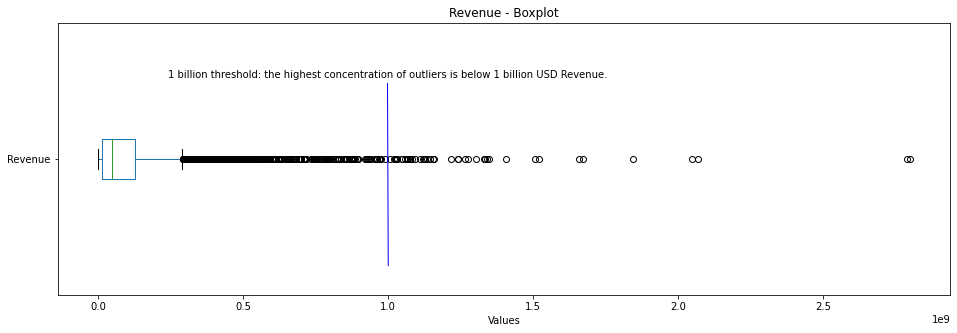

In [47]:
# Let's define a function to plot Boxplots
def boxplot(attribute):
    moviedb[attribute].plot(kind='box', vert=False, figsize=(16,5))
    plt.title('{} - Boxplot'.format(attribute))
    plt.xlabel('Values')

# Let's plot a boxplot of the Target
boxplot('Revenue')
plt.annotate('1 billion threshold: the highest concentration of outliers is below 1 billion USD Revenue.',
            xy = (1000000000,0.6),
            xytext = (240000000,1.3),
            xycoords='data',
            arrowprops = dict(arrowstyle='-', connectionstyle='arc3', color='blue', lw=1))

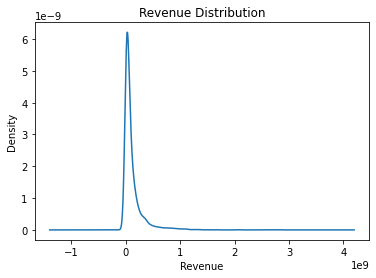

In [48]:
# Let's define a function to plot variable distributions
def plot_distribution(attribute):
    moviedb[attribute].plot(kind='density')
    plt.title('{} Distribution'.format(attribute))
    plt.xlabel(attribute)

# Let's check Target distribution
plot_distribution('Revenue')

In [49]:
# Let's create a function in order to return a statement about whether the variable distribution is skewed
def var_skew(attribute):
    skew = moviedb[attribute].skew()
    print('{} distribution skewness: {}'.format(attribute, skew))
    if skew > 0.75:
        print('Variable distribution is right-skewed')
    elif skew < -0.75:
        print('Variable distribution is left-skewed')
    else:
        print('Variable distribution is approximately Normal')

# Let's check for the Target skeweness
var_skew('Revenue')

Revenue distribution skewness: 4.4178502418763435
Variable distribution is right-skewed


The target distribution is very right-skewed, with several outliers beyond the max limit. Let's pinpoint the outliers.

In [50]:
# Let's define a function to find the variable outliers
def outlier_finder(attribute):
    outliers = []
    q25,q75 = np.percentile(moviedb[attribute], [25,75])
    iqr = q75-q25
    min_lim = q25 - 1.5*iqr
    max_lim = q75 + 1.5*iqr
    for x in moviedb[attribute]:
        if x < min_lim:
            outliers.append(x)
        elif x > max_lim:
            outliers.append(x)
    
    print('{} - Attribute Range: {} - {}'.format(attribute, moviedb[attribute].min(), moviedb[attribute].max()))
    print('{} - Attribute Non-Outlier Region: {} - {}'.format(attribute, min_lim, max_lim))
    print('{} - Number of Outliers: {}'.format(attribute, len(outliers)))
    print('{} - Percentage of Outliers: {}%'.format(attribute, round(len(outliers)/len(moviedb[attribute])*100, 2)))
    
# Let's find the Revenue outliers
outlier_finder('Revenue')

Revenue - Attribute Range: 1800.0 - 2797800564.0
Revenue - Attribute Non-Outlier Region: -151100878.25 - 291321839.75
Revenue - Number of Outliers: 486
Revenue - Percentage of Outliers: 9.98%


In [51]:
print('Number of extreme outliers (> 1 billion USD Revenue):', len(moviedb[moviedb['Revenue'] > 1000000000]))
print('Percentage of extreme outliers (over total number of outliers):', len(moviedb[moviedb['Revenue'] > 1000000000])/486*100)
print('Percentage of extreme outliers (over total dataset):',\
      len(moviedb[moviedb['Revenue'] > 1000000000])/moviedb.shape[0]*100)

Number of extreme outliers (> 1 billion USD Revenue): 44
Percentage of extreme outliers (over total number of outliers): 9.053497942386832
Percentage of extreme outliers (over total dataset): 0.9033052761239991


In [52]:
moviedb[moviedb['Revenue'] > 1000000000]

Title  \
15    The Lord of the Rings: The Return of the King   
16                                  The Dark Knight   
70                                Avengers: Endgame   
79                           Avengers: Infinity War   
97                                            Joker   
178    Harry Potter and the Deathly Hallows: Part 2   
419                                         Titanic   
508                                     Toy Story 3   
541                                        Zootopia   
562                           The Dark Knight Rises   
665                                    The Avengers   
764                                     Toy Story 4   
846                       Spider-Man: Far from Home   
923                                   Incredibles 2   
1046                   Rogue One: A Star Wars Story   
1125                                         Avatar   
1246                     Captain America: Civil War   
1250                   Star Wars: The Force Awakens   
1258                                  Black Panther   
1444                        Avengers: Age of Ultron   
1514                                         Frozen   
1541                                      Furious 7   
1572              The Hobbit: An Unexpected Journey   
1604     Pirates of the Caribbean: Dead Man's Chest   
1832                                      Frozen II   
1852                                  The Lion King   
1889                                        Skyfall   
2120                                        Aladdin   
2144                                   Finding Dory   
2340                       Star Wars: The Last Jedi   
2367                                 Captain Marvel   
2411                           Beauty and the Beast   
2488                                     Iron Man 3   
2547                        The Fate of the Furious   
2677                                        Aquaman   
3326                                 Jurassic World   
3468                            Alice in Wonderland   
3675               Star Wars: The Rise of Skywalker   
3731                 Jurassic World: Fallen Kingdom   
3874    Pirates of the Caribbean: On Stranger Tides   
4169                                Despicable Me 3   
4176                                        Minions   
5022                 Transformers: Dark of the Moon   
5752                Transformers: Age of Extinction   

                                                 Genres  \
15                         Action | Adventure | Fantasy   
16                    Action | Crime | Drama | Thriller   
70                 Action | Adventure | Science Fiction   
79                 Action | Adventure | Science Fiction   
97                             Crime | Drama | Thriller   
178                                 Adventure | Fantasy   
419                                     Drama | Romance   
508                         Animation | Comedy | Family   
541             Adventure | Animation | Comedy | Family   
562                   Action | Crime | Drama | Thriller   
665                Action | Adventure | Science Fiction   
764   Adventure | Animation | Comedy | Fantasy | Family   
846                Action | Adventure | Science Fiction   
923             Action | Adventure | Animation | Family   
1046               Action | Adventure | Science Fiction   
1125     Action | Adventure | Fantasy | Science Fiction   
1246               Action | Adventure | Science Fiction   
1250     Action | Adventure | Fantasy | Science Fiction   
1258     Action | Adventure | Fantasy | Science Fiction   
1444               Action | Adventure | Science Fiction   
1514                     Adventure | Animation | Family   
1541                                  Action | Thriller   
1572                       Action | Adventure | Fantasy   
1604                       Action | Adventure | Fantasy   
1832                     Adventure | Animation | Family   
1852                                

* **Target variable, Revenue, is not normally distributed**: it's actually very right skewed: all outliers are beyond the max limit of the no-outlier region (ca 290 mil).
* The number of outliers is quite substantial: 486. Almost 10% of observations grossed more than 290 million.
* 90% of outliers are below the 1 billion threshold.
* The number of observations above the 1 billion threshold is not substantial: 44 (less than 1% of total dataset).
* The extreme outliers belong to very successful movie franchise (The Lord of Rings, The Dark Night, The Avengers, Harry Potter, Pirates of Caribbean, Star Wars...) or, in few cases, they are very successful stand-alone movies: Joker, Finding Dory, Titanic...
* **The Revenue outliers don't seem to be mistakes or data aberrations, but a normal part of the data distribution, due to its natural variation.**
* In Linear Regression, the Target Variable doesn't need to be normally distributed, although a Normal distribution of the Target might be helpful (since the errors must be normally distributed). I'll **Box-Cox transform the target to see whether the  variable distribution becomes more Normal.**

 ##### Budget

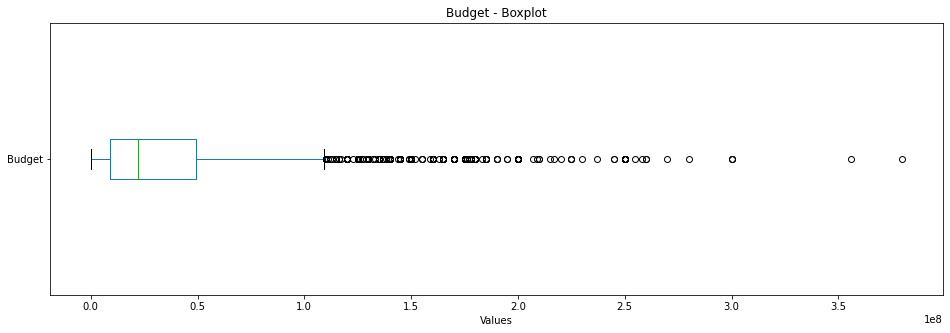

In [53]:
boxplot('Budget')

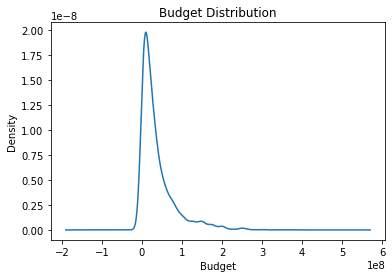

In [54]:
plot_distribution('Budget')

In [55]:
var_skew('Budget')

Budget distribution skewness: 2.3287730204032253
Variable distribution is right-skewed


In [56]:
outlier_finder('Budget')

Budget - Attribute Range: 6000.0 - 380000000.0
Budget - Attribute Non-Outlier Region: -51575000.0 - 109585000.0
Budget - Number of Outliers: 357
Budget - Percentage of Outliers: 7.33%


In [57]:
moviedb[moviedb['Budget'] > 109585000.0]

Title                                       Genres  \
16             The Dark Knight            Action | Crime | Drama | Thriller   
62                   Inception         Action | Adventure | Science Fiction   
70           Avengers: Endgame         Action | Adventure | Science Fiction   
76                Interstellar          Adventure | Drama | Science Fiction   
79      Avengers: Infinity War         Action | Adventure | Science Fiction   
...                        ...                                          ...   
6956        The Last Airbender        Action | Adventure | Fantasy | Family   
7014            Fantastic Four         Action | Adventure | Science Fiction   
7021   Speed 2: Cruise Control                Action | Adventure | Thriller   
7038            Batman & Robin  Action | Comedy | Fantasy | Science Fiction   
12778                The Alamo                      History | Western | War   

                                                    Cast  \
16     Christian Bale | Michael Caine | Heath Ledger ...   
62     Leonardo DiCaprio | Joseph Gordon-Levitt | Ell...   
70     Robert Downey Jr. | Chris Evans | Mark Ruffalo...   
76     Matthew McConaughey | Jessica Chastain | Anne ...   
79     Robert Downey Jr. | Chris Hemsworth | Chris Ev...   
...                                                  ...   
6956   Noah Ringer | Nicola Peltz | Jackson Rathbone ...   
7014   Miles Teller | Kate Mara | Michael B. Jordan |...   
7021   Sandra Bullock | Jason Patric | Willem Dafoe |...   
7038   Arnold Schwarzenegger | George Clooney | Chris...   
12778  Dennis Quaid | Billy Bob Thornton | Jason Patr...   

                                                    Crew  \
16     Lucinda Syson | Hans Zimmer | Charles Roven | ...   
62     Hans Zimmer | Christopher Nolan | Christopher ...   
70     Alan Silvestri | David Farmer | Sarah Finn | C...   
76     Hans Zimmer | Christopher Nolan | Christopher ...   
79     Alan Silvestri | David Farmer | Tom Johnson | ...   
...                                                  ...   
6956   James Newton Howard | Andrew Lesnie | Conrad B...   
7014   Robert Kulzer | Ronna Kress | Stephen E. Rivki...   
7021   Jack Green | Bub Asman | Cindy Carr | Jan de B...   
7038   Lance Brown | Mali Finn | Bob Kane | Andrew Ad...   
12778  Ronna Kress | Carter Burwell | Carter Burwell ...   

                       Collection Release_Date Release_Status  \
16     The Dark Knight Collection   2008-07-16       Released   
62                         Single   2010-07-15       Released   
70        The Avengers Collection   2019-04-24       Released   
76                         Single   2014-11-05       Released   
79        The Avengers Collection   2018-04-25       Released   
...                           ...          ...            ...   
6956                       Single   2010-06-30       Released   
7014                       Single   2015-08-05       Released   
7021             Speed Collection   1997-06-13       Released   
7038            Batman Collection   1997-06-20       Released   
12778                      Single   2004-04-07       Released   

      Original_Language     Languages_Spoken  Runtime  \
16                   en        English | 普通话    152.0   
62                   en        English | 日本語    148.0   
70                   en     English | 日本語 |     181.0   
76                   en              English    169.0   
79                   en           English |     149.0   
...                 ...                  ...      ...   
6956                 en              English    103.0   
7014                 en              English    100.0   
7021                 en  English | Português    121.0   
7038                 en              English    125.0   
12778                en    English | Español    137.0   

                                    Production_Companies  \
16     DC Comics | Legendary Entertainment | Syncopy ...   
62     Legendary Entertainment | Syncopy | Warne

* The feature Budget distribution is, again, quite right skewed: all outliers are beyond the max limit of the no-outlier region (ca 110 mil).
* The number of outliers is quite substantial: 357 (7.3% of total dataset).
* This attribute's outliers are famous movie which, probably, required some extra efforts from a production budget perspective: Inception, The Dark Knight, Avengers, Interstellar, Fantastic Four, Batman & Robin...
* **The Budget outliers don't seem to be mistakes or data aberrations, but a normal part of the data distribution, due to its natural variation.**

 ##### Runtime

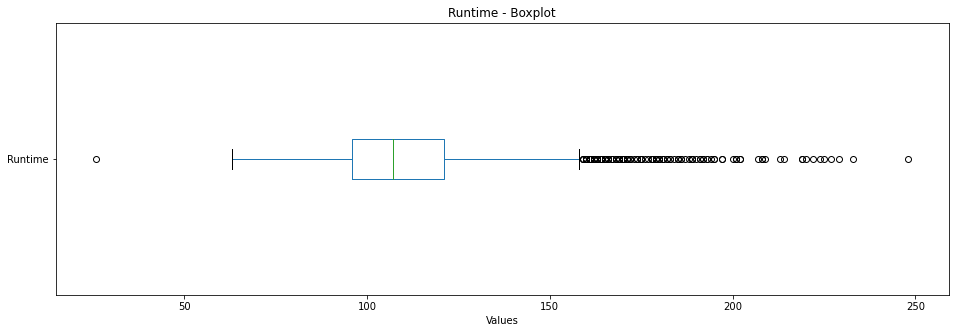

In [58]:
boxplot('Runtime')

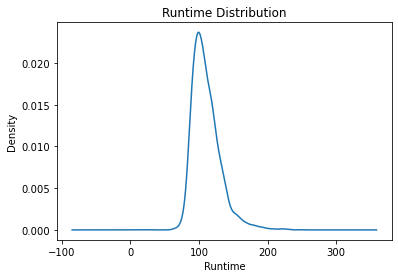

In [59]:
plot_distribution('Runtime')

In [60]:
var_skew('Runtime')

Runtime distribution skewness: 1.4286914039037855
Variable distribution is right-skewed


In [61]:
outlier_finder('Runtime')

Runtime - Attribute Range: 26.0 - 248.0
Runtime - Attribute Non-Outlier Region: 58.5 - 158.5
Runtime - Number of Outliers: 147
Runtime - Percentage of Outliers: 3.02%


* Runtime data distribution is right skewed.
* We have 1 outlier below the Min limit: a 26 minute-long movie.
* All other outliers are beyond the Max limit, that is 159 minutes (a little bit more than 2 and 40 mins).
* 97% of movies are in the range between 1 hour (58.5 min) and 2 and 40 mins (158.5 min).
* Outliers account for 3% of the data (147 observations).

Let's have a look at the Runtime outliers.

In [62]:
# Outliers below the Min lim
moviedb[moviedb['Runtime'] <= 58.5]

Title              Genres  \
782  Mickey's Christmas Carol  Family | Animation   

                                                  Cast  \
782  Alan Young | Wayne Allwine | Clarence Nash | H...   

                                                  Crew Collection  \
782  Charles Dickens | Alan Young | Burny Mattinson...     Single   

    Release_Date Release_Status Original_Language Languages_Spoken  Runtime  \
782   1983-10-19       Released                en          English     26.0   

                               Production_Companies         Country_of_Origin  \
782  Walt Disney Pictures | Walt Disney Productions  United States of America   

        Budget     Revenue  
782  3000000.0  21000000.0

In [63]:
# Outliers above the Max lim
moviedb[moviedb['Runtime'] >= 158.5].sort_values(by='Runtime', ascending=False)

Title  \
2208                                           Cleopatra   
331                                   Gone with the Wind   
13                           Once Upon a Time in America   
282                                   Lawrence of Arabia   
13170                                          Woodstock   
...                                                  ...   
2113   The Assassination of Jesse James by the Coward...   
236                                              Amadeus   
351                                    Bajrangi Bhaijaan   
1179                                      Eyes Wide Shut   
16849                                                 12   

                                  Genres  \
2208           Drama | History | Romance   
331                Drama | Romance | War   
13                         Drama | Crime   
282    Adventure | Drama | History | War   
13170      Documentary | History | Music   
...                                  ...   
2113            Action | Drama | Western   
236              Drama | History | Music   
351              Action | Comedy | Drama   
1179          Drama | Mystery | Thriller   
16849            Crime | Drama | Mystery   

                                                    Cast  \
2208   Elizabeth Taylor | Richard Burton | Rex Harris...   
331    Vivien Leigh | Clark Gable | Olivia de Havilla...   
13     Robert De Niro | James Woods | Elizabeth McGov...   
282    Peter O'Toole | Alec Guinness | Anthony Quinn ...   
13170  Richie Havens | Joan Baez | Roger Daltrey | Jo...   
...                                                  ...   
2113   Brad Pitt | Casey Affleck | Sam Rockwell | Sam...   
236    F. Murray Abraham | Tom Hulce | Elizabeth Berr...   
351    Salman Khan | Kareena Kapoor Khan | Harshaali ...   
1179   Tom Cruise | Nicole Kidman | Madison Eginton |...   
16849  Sergei Makovetsky | Nikita Mikhalkov | Sergey ...   

                                                    Crew Collection  \
2208   Murray Spivack | Alex North | Giovanni Nataluc...     Single   
331    Ernest Haller | David O. Selznick | Lyle R. Wh...     Single   
13     Arnon Milchan | Ennio Morricone | Ennio Morric...     Single   
282    Ray Lovejoy | Winston Ryder | Maurice Jarre | ...     Single   
13170  Martin Scorsese | Martin Scorsese | Thelma Sch...     Single   
...                                                  ...        ...   
2113   Roger Deakins | David Valdes | Brad Pitt | Rid...     Single   
236    Bonnie Timmermann | Maggie Cartier | Saul Zaen...     Single   
351    Salman Khan | Manish Malhotra | Pritam Chakrab...     Single   
1179   Denise Chamian | Stanley Kubrick | Stanley Kub...     Single   
16849  Vincent Arnardi | André Rigaut | André Rigaut ...     Single   

      Release_Date Release_Status Original_Language  \
2208    1963-06-12       Released                en   
331     1939-12-15       Released                en   
13      1984-05-23       Released                en   
282     1962-12-10       Released                en   
13170   1970-03-26       Released                en   
...            ...            ...               ...   
2113    2007-09-07       Released                en   
236     1984-09-06       Released                en   
351     2015-07-17       Released                hi   
1179    1999-07-16       Released                en   
16849   2007-06-06       Released                ru   

                           Languages_Spoken  Runtime  \
2208                                English    248.0   
331                                 English    233.0   
13            Français | English | Italiano    229.0   
282              العربية | English | Türkçe    227.0   
13170                               English    225.0   
...                                     ...      ...   
2113                                English    160.0   
236    Italiano | Deutsch | Latin | English    160.0   
351                           हिन्दी | اردو    159.0   
1179  

**Runtime outliers don't seem to be mistakes or data aberrations, but a normal part of the data distribution, due to its natural variation.**

#### 2.1.4. Categorical Data

In [64]:
# Let's show some descriptive stats about object-type attributes
moviedb.describe(include=np.object)

Title Genres                                               Cast  \
count        4871   4871                                               4871   
unique       4766    883                                               4871   
top     King Kong  Drama  David Oyelowo | Tom Wilkinson | Carmen Ejogo |...   
freq            3    277                                                  1   

                                                     Crew Collection  \
count                                                4871       4871   
unique                                               4871        674   
top     Conrad Buff IV | John McPherson | David Foster...     Single   
freq                                                    1       3584   

       Release_Date Release_Status Original_Language Languages_Spoken  \
count          4871           4871              4871             4871   
unique         3603              1                32              623   
top      2014-12-25       Released                en          English   
freq              6           4871              4488             3139   

       Production_Companies         Country_of_Origin  
count                  4871                      4871  
unique                 4144                       491  
top               Paramount  United States of America  
freq                     73                      3068

Release_Status has only 1 value for all observations: "Released". I'll drop the attribute.

In [65]:
moviedb.drop(['Release_Status'], axis=1, inplace=True)
moviedb.shape

(4871, 13)

___

Some columns (like Cast and Crew) are JSON lists of ‘values’, that is they have a stored list (stored as a single value) for a single observation. Let's look into these attributes, and check for the number of unique values in all stored lists per column.

In [66]:
# Let's create a function 
def uni_cat(attribute):
    # Take the attribute, split the categories using '|' as separator, and create a new dataframe
    attribute_df = moviedb[attribute].str.split('|', expand=True)
    
    # Eliminate the trailing white spaces
    for col in attribute_df.columns:
        attribute_df[col] = attribute_df[col].str.strip()
    
    # Create a set for the unique categories
    global attribute_list 
    attribute_list = set()
        
    # Add in the set the unique categories for each column of the created "attribute" dataframe
    for col in attribute_df.columns:
        for value in pd.get_dummies(attribute_df[col]).columns.tolist():
            attribute_list.add(value)
        
    # Output the results
    print('{} - Unique categories: {}'.format(attribute, attribute_list))
    print('')
    print('{} - Number of unique categories: {}'.format(attribute, len(attribute_list)))
    
uni_cat('Genres')

Genres - Unique categories: {'Horror', 'Animation', 'Fantasy', 'Music', 'History', 'Family', 'Comedy', 'Western', 'Romance', 'Drama', 'Adventure', 'War', 'Documentary', 'Crime', 'Thriller', 'Mystery', 'TV Movie', 'Science Fiction', 'Action'}

Genres - Number of unique categories: 19


In [67]:
uni_cat('Cast')

Cast - Unique categories: {'Ray Charleson', 'Michael Gordon', 'Paul Wight', 'Leland Orser', 'Elle Downs', 'Jon-Jon Lockwood', 'Lee Dong-Yong', 'Istvan Vajas', 'Sven Wollter', 'Martin Gordon', 'James Middleton', 'Colleen Dewhurst', 'Jenifer Landor', 'Toby Kebbell', 'Tobit Raphael', 'Frank Gallegos', 'Frank McGrath', 'Alex McKenna', 'E.Y. Coley', 'Malcolm-Jamal Warner', 'Jay Simon', 'Diana Emuge', 'Michael Cameron', 'Merryn Owen', 'Benoît Jacquot', 'Diamilex Alexander', 'Sam Lloyd', 'Shad Moss', 'Park Bench', 'A. Frank Ruffo', 'Zeta Graff', 'Bronco McLoughlin', 'Robert Adair', 'Jackie Davis', 'Norma Varden', 'Justin Ebenhack', 'Tegan Jones', 'Theo Kypri', 'Manuel Dondé', 'Thirl Haston', 'Hailie Brennand', 'Sahlima', 'Deanna Reed-Foster', 'Tom Tate', 'Haley Hudson', 'Maria Simon', 'Andrew W. Nolan', 'Ryan Anderson', 'Oscar Jennings', 'Jere Burns', 'David Agranov', 'Louis Di Bianco', 'Karl Willetts', 'Alan Arkin', 'Megan Raich', 'Gage Tarrant', 'Johnny Myers', 'Taylor Cate', 'Jordana Beatt

In [68]:
uni_cat('Crew')

Crew - Unique categories: {'Rob Pritts', 'Robert Fernandez', 'Tom Hampton', 'Ray Huffine', 'Caroline Greville-Morris', 'Berkely Mather', 'Faith Jones', 'Peter B. Ellis', 'L. Michael Eddy', 'Kevin Rucker', 'Alex Acuna', 'Jeffrey Soros', 'Doug Cooper', 'Olga Avrahova', 'Eric Jordan', 'Marco De Rossi', 'Joseph Hayden', 'Andrew McArthur', 'James Middleton', 'Hope Shaw', 'Brian Formo', 'Himanshu Nanda', 'Richard Mendez', 'John Fedynich', 'Tyler Matson', 'Dave Bouskill', 'Julien Leveugle', 'Fréderic Hardy', 'Tony Tromp', 'Marie Elena', 'Kevin Meehan', 'Harriet B. Helberg', 'Scott Bourne', 'Gerald Feil', 'Tyler Mitchell', 'Jimi Johnson', 'Stephanie Dölker', 'Andy Waterman', 'Michael Frederickson', 'Katrina Parsons', 'James Hardy', 'Gary F. Kieldrup', 'Gail Katz', 'J.P. Barrow', 'Jim Magdaleno', 'Bronco McLoughlin', 'Sylvain Girouard', 'Robert Strait', 'Demetrius Leal', 'Tegan Jones', 'Noëlle Triaureau', 'Danny Greco', "Lawrence 'Stompie' Moraks", 'Jason Reed', 'Theo Kypri', 'Simon Franks', 'M

In [69]:
uni_cat('Languages_Spoken')

Languages_Spoken - Unique categories: {'', 'Norsk', 'Hrvatski', 'Tiếng Việt', '한국어/조선말', 'ਪੰਜਾਬੀ', 'Malti', 'Nederlands', 'suomi', 'עִבְרִית', 'Latin', 'Español', 'English', 'Gaeilge', 'беларуская мова', 'Dansk', 'Afrikaans', 'svenska', 'తెలుగు', 'ภาษาไทย', 'Český', '普通话', 'Pусский', 'العربية', 'Português', 'Français', 'Català', '广州话 / 廣州話', 'Türkçe', '日本語', 'No Language', 'Srpski', 'euskera', 'Somali', 'Polski', 'فارسی', 'বাংলা', 'български език', 'Esperanto', 'اردو', 'پښتو', 'Slovenčina', 'हिन्दी', 'Lietuvių', 'Kiswahili', 'Română', 'Galego', 'shqip', 'සිංහල', 'Bahasa melayu', 'தமிழ்', 'Cymraeg', 'ελληνικά', 'Bosanski', 'Eesti', 'Magyar', 'Deutsch', 'Íslenska', 'Italiano', 'Український', 'Bahasa indonesia', 'isiZulu'}

Languages_Spoken - Number of unique categories: 62


In [70]:
uni_cat('Production_Companies')

Production_Companies - Unique categories: {'FourBoys Entertainment', 'Henceforth', 'Pan Arts', 'Imhotep Productions', 'Pigeon Creek Films', 'The Ladd Company', 'Yukon Film Incentive Program', 'FilmWorks', 'Pandora Cinema', 'Shogakukan Production', 'Lammas Park', 'Castafiore Films', 'Seven Arts Pictures', 'CineTel Films', 'Senator International', 'Low Spark Films', 'Mosaic Media Group', 'A+E Studios', 'Delphi Films', 'Thunderbird Entertainment', 'Drafthouse Films', 'Trap-Two-Zero Productions', 'Nervous Tick', 'If Only Production Services Ltd.', 'C3 Entertainment, Inc.', 'Scout Productions', 'Indiana Production Company', 'Distant Horizon', 'Talking Heads', 'Lemon Sky Productions', 'Motion Picture BETA Produktionsgesellschaft', 'Solipsist Film', 'Helios-Filmproduktion', 'Bristol Bay Productions', 'Screen Australia', 'Blue Gardenia Productions', 'Reliance Big Entertainment', 'Studio Babelsberg', 'Aviron Pictures', 'Chungeorahm Film', 'SPAD Films', 'Artist International', 'Apipoulaï', '2S F

In [71]:
uni_cat('Country_of_Origin')

Country_of_Origin - Unique categories: {'Spain', 'Venezuela', 'Morocco', 'Uganda', 'Serbia and Montenegro', 'Tunisia', 'Iran', 'Thailand', 'Japan', 'New Zealand', 'Chile', 'Botswana', 'Belarus', 'Czech Republic', 'Luxembourg', 'Peru', 'Bahamas', 'Portugal', 'Belgium', 'Bulgaria', 'Liechtenstein', 'Iceland', 'Singapore', 'Uruguay', 'Colombia', 'Angola', 'Serbia', 'China', 'Netherlands', 'Slovenia', 'Israel', 'Paraguay', 'India', 'Argentina', 'Denmark', 'Philippines', 'Malta', 'Germany', 'United Arab Emirates', 'Dominican Republic', 'Switzerland', 'Brazil', 'South Korea', 'Kazakhstan', 'United Kingdom', 'Taiwan', 'Sweden', 'Norway', 'Algeria', 'Rwanda', 'Poland', 'Greece', 'Hungary', 'Mexico', 'United States of America', 'Monaco', 'Ghana', 'Slovakia', 'Ireland', 'Australia', 'Pakistan', 'Cambodia', 'Ukraine', 'Russia', 'Austria', 'Hong Kong', 'Romania', 'Fiji', 'Qatar', 'Croatia', 'Finland', 'Indonesia', 'South Africa', 'Lebanon', 'Puerto Rico', 'Turkey', 'Lithuania', 'Italy', 'France', 

Some attributes have a very high number of unique categories:
* Genres: 19 categories.
* Cast: 81,034 categories.
* Crew: 104,338 categories. It's probably unlikely that the audience picks a movie because of a particular crew member, although a particular director can definitely have an impact on the box office: directors such as Woody Allen, Steven Spielberg, Martin Scorsese, just to name a few, have definitely a consistent number of fans, who won't miss their next movie. Furthermore, even other crew members can play a role: a certain executive producer, for instance, might have developed strong skills for producing box office successes, even though he's unknown to the public. Therefore, I consider Crew as an appropriate feature.
* Languages_Spoken: 62 categories.
* Production_Companies: 5,120 categories. Generally, I wouldn't consider a Production Company as a relevant feature for the audience on whether deciding to watch a movie or not, but this could actually be the case for very famous production companies such as Disney or Pixar, for instance. Therefore, I consider Production_Companies as a usueful feature.
* Country_of_Origin: 81 categories.

Considering hardware and software limitations, I'll include in this analysis only the most frequent categories. More details about the select categories in the [Feature Selection and Variable Transformations](#featureengineering) section.

___

Let's change collection values into True and False

In [72]:
moviedb.loc[moviedb[moviedb['Collection'] != 'Single'].index, 'Collection'] = True
moviedb.loc[moviedb[moviedb['Collection'] == 'Single'].index, 'Collection'] = False
moviedb['Collection'].value_counts()

False    3584
True     1287
Name: Collection, dtype: int64

In [73]:
moviedb['Collection'].value_counts(normalize=True)

False    0.735783
True     0.264217
Name: Collection, dtype: float64

74% (3,584) of observations are stand-alone movies.  
26% (1,287) of observations are movies that belong to some kind of collection (Star Wars, The Lord of the Rings, The Godfather...).

___

Let's create new columns with Quarter, Month, Weekday, and whether a movie was released over the weekend (Friday-Sunday), from the attribute Release_Date, and let's analyze the frequency distribution.

In [74]:
# Let's convert Release_date object-type to datetime-type
moviedb['Release_Date'] = pd.to_datetime(moviedb['Release_Date'])

moviedb['Month'] = pd.DatetimeIndex(moviedb['Release_Date']).month
moviedb['Quarter'] = moviedb['Release_Date'].dt.quarter
moviedb['Weekday'] = moviedb['Release_Date'].dt.dayofweek
moviedb['Weekend'] = moviedb['Weekday'].apply(lambda x:1 if(x>3) else 0)
moviedb.head()

Title                    Genres  \
0  Dilwale Dulhania Le Jayenge  Comedy | Drama | Romance   
1     The Shawshank Redemption             Crime | Drama   
2                The Godfather             Crime | Drama   
3             Schindler's List     Drama | History | War   
4       The Godfather: Part II             Crime | Drama   

                                                Cast  \
0  Shah Rukh Khan | Kajol | Amrish Puri | Anupam ...   
1  Tim Robbins | Morgan Freeman | Bob Gunton | Cl...   
2  Marlon Brando | Al Pacino | James Caan | Richa...   
3  Liam Neeson | Ben Kingsley | Ralph Fiennes | C...   
4  Al Pacino | Robert Duvall | Diane Keaton | Rob...   

                                                Crew Collection Release_Date  \
0  Farah Khan | Yash Chopra | Aditya Chopra | Adi...      False   1995-10-20   
1  Thomas Newman | Thomas Newman | Roger Deakins ...      False   1994-09-23   
2  Francis Ford Coppola | Francis Ford Coppola | ...       True   1972-03-14   
3  John Williams | Steven Spielberg | Steven Spie...      False   1993-11-30   
4  Walter Murch | Walter Murch | Francis Ford Cop...       True   1974-12-20   

  Original_Language                       Languages_Spoken  Runtime  \
0                hi                                 हिन्दी    190.0   
1                en                                English    142.0   
2                en             English | Italiano | Latin    175.0   
3                en  Deutsch | Polski | עִבְרִית | English    195.0   
4                en   English | Italiano | Latin | Español    202.0   

                        Production_Companies         Country_of_Origin  \
0                             Yash Raj Films                     India   
1                  Castle Rock Entertainment  United States of America   
2             Paramount | Alfran Productions  United States of America   
3  Universal Pictures | Amblin Entertainment  United States of America   
4            Paramount | The Coppola Company  United States of America   

       Budget      Revenue  Month  Quarter  Weekday  Weekend  
0  13200000.0  100000000.0     10        4        4        1  
1  25000000.0   28341469.0      9        3        4        1  
2   6000000.0  245066411.0      3        1        1        0  
3  22000000.0  321365567.0     11        4        1        0  
4  13000000.0  102600000.0     12        4        4        1

In [75]:
moviedb.tail()

Title  \
17015  The End of the Affair   
17019            Killing Zoe   
17026     Invaders from Mars   
17029      Jumping the Broom   
17031                Smashed   

                                                  Genres  \
17015                                              Drama   
17019                  Action | Crime | Drama | Thriller   
17026  Adventure | Horror | Mystery | Science Fiction...   
17029                                             Comedy   
17031                                     Comedy | Drama   

                                                    Cast  \
17015  Ralph Fiennes | Stephen Rea | Julianne Moore |...   
17019  Eric Stoltz | Julie Delpy | Jean-Hugues Anglad...   
17026  Hunter Carson | Karen Black | Timothy Bottoms ...   
17029  Paula Patton | Julie Bowen | Meagan Good | Mik...   
17031  Mary Elizabeth Winstead | Aaron Paul | Octavia...   

                                                    Crew Collection  \
17015  Roger Pratt | Susie Figgis | Stephen Woolley |...      False   
17019  Quentin Tarantino | David Wasco | Roger Avary ...      False   
17026  Dan O'Bannon | Leslie Dilley | Dana Lyman | Da...      False   
17029  Tracey Edmonds | Arlene Gibbs | Elizabeth Hunt...      False   
17031  Avy Kaufman | Kim Coleman | Andrea Sperling | ...      False   

      Release_Date Original_Language    Languages_Spoken  Runtime  \
17015   1999-12-03                en             English    102.0   
17019   1993-10-01                en  English | Français     96.0   
17026   1986-01-01                en             English    100.0   
17029   2011-05-06                en             English    112.0   
17031   2012-09-12                en             English     85.0   

                                    Production_Companies  \
17015                                  Columbia Pictures   
17019                                 Live Entertainment   
17026            Cannon Group | Golan-Globus Productions   
17029  Sony Pictures | TriStar Pictures | Stage 6 Fil...   
17031                         Super Crispy Entertainment   

                               Country_of_Origin      Budget     Revenue  \
17015  United States of America | United Kingdom  23000000.0  10827816.0   
17019          France | United States of America   1500000.0    418961.0   
17026                   United States of America  12000000.0   4884663.0   
17029                   United States of America   6600000.0  37710610.0   
17031                   United States of America    500000.0    376597.0   

       Month  Quarter  Weekday  Weekend  
17015     12        4        4        1  
17019     10        4        4        1  
17026      1        1        2        0  
17029      5        2        4        1  
17031      9        3        2        0

Let's check Month Frequency Distribution.

Text(0.5, 1.0, 'Month - Frequency Distribution')

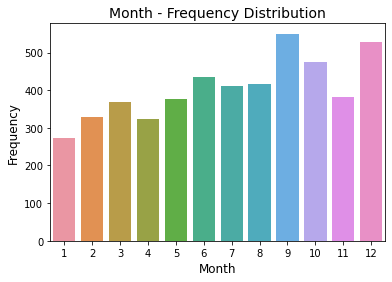

In [76]:
month = pd.DataFrame(moviedb.groupby(['Month'])['Title'].count().reset_index())
month.rename(columns={'Title':'Frequency'}, inplace=True)

sns.barplot(x='Month', y='Frequency', data = month)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Month - Frequency Distribution', fontsize=14)

No mistakes, aberrations, or problems are found in the attribute Month.  
Let's change the month number with the name.

In [77]:
moviedb.loc[moviedb[moviedb['Month'] == 1].index, 'Month'] = 'January'
moviedb.loc[moviedb[moviedb['Month'] == 2].index, 'Month'] = 'February'
moviedb.loc[moviedb[moviedb['Month'] == 3].index, 'Month'] = 'March'
moviedb.loc[moviedb[moviedb['Month'] == 4].index, 'Month'] = 'April'
moviedb.loc[moviedb[moviedb['Month'] == 5].index, 'Month'] = 'May'
moviedb.loc[moviedb[moviedb['Month'] == 6].index, 'Month'] = 'June'
moviedb.loc[moviedb[moviedb['Month'] == 7].index, 'Month'] = 'July'
moviedb.loc[moviedb[moviedb['Month'] == 8].index, 'Month'] = 'August'
moviedb.loc[moviedb[moviedb['Month'] == 9].index, 'Month'] = 'September'
moviedb.loc[moviedb[moviedb['Month'] == 10].index, 'Month'] = 'October'
moviedb.loc[moviedb[moviedb['Month'] == 11].index, 'Month'] = 'November'
moviedb.loc[moviedb[moviedb['Month'] == 12].index, 'Month'] = 'December'

moviedb.head()

Title                    Genres  \
0  Dilwale Dulhania Le Jayenge  Comedy | Drama | Romance   
1     The Shawshank Redemption             Crime | Drama   
2                The Godfather             Crime | Drama   
3             Schindler's List     Drama | History | War   
4       The Godfather: Part II             Crime | Drama   

                                                Cast  \
0  Shah Rukh Khan | Kajol | Amrish Puri | Anupam ...   
1  Tim Robbins | Morgan Freeman | Bob Gunton | Cl...   
2  Marlon Brando | Al Pacino | James Caan | Richa...   
3  Liam Neeson | Ben Kingsley | Ralph Fiennes | C...   
4  Al Pacino | Robert Duvall | Diane Keaton | Rob...   

                                                Crew Collection Release_Date  \
0  Farah Khan | Yash Chopra | Aditya Chopra | Adi...      False   1995-10-20   
1  Thomas Newman | Thomas Newman | Roger Deakins ...      False   1994-09-23   
2  Francis Ford Coppola | Francis Ford Coppola | ...       True   1972-03-14   
3  John Williams | Steven Spielberg | Steven Spie...      False   1993-11-30   
4  Walter Murch | Walter Murch | Francis Ford Cop...       True   1974-12-20   

  Original_Language                       Languages_Spoken  Runtime  \
0                hi                                 हिन्दी    190.0   
1                en                                English    142.0   
2                en             English | Italiano | Latin    175.0   
3                en  Deutsch | Polski | עִבְרִית | English    195.0   
4                en   English | Italiano | Latin | Español    202.0   

                        Production_Companies         Country_of_Origin  \
0                             Yash Raj Films                     India   
1                  Castle Rock Entertainment  United States of America   
2             Paramount | Alfran Productions  United States of America   
3  Universal Pictures | Amblin Entertainment  United States of America   
4            Paramount | The Coppola Company  United States of America   

       Budget      Revenue      Month  Quarter  Weekday  Weekend  
0  13200000.0  100000000.0    October        4        4        1  
1  25000000.0   28341469.0  September        3        4        1  
2   6000000.0  245066411.0      March        1        1        0  
3  22000000.0  321365567.0   November        4        1        0  
4  13000000.0  102600000.0   December        4        4        1

In [78]:
moviedb.tail()

Title  \
17015  The End of the Affair   
17019            Killing Zoe   
17026     Invaders from Mars   
17029      Jumping the Broom   
17031                Smashed   

                                                  Genres  \
17015                                              Drama   
17019                  Action | Crime | Drama | Thriller   
17026  Adventure | Horror | Mystery | Science Fiction...   
17029                                             Comedy   
17031                                     Comedy | Drama   

                                                    Cast  \
17015  Ralph Fiennes | Stephen Rea | Julianne Moore |...   
17019  Eric Stoltz | Julie Delpy | Jean-Hugues Anglad...   
17026  Hunter Carson | Karen Black | Timothy Bottoms ...   
17029  Paula Patton | Julie Bowen | Meagan Good | Mik...   
17031  Mary Elizabeth Winstead | Aaron Paul | Octavia...   

                                                    Crew Collection  \
17015  Roger Pratt | Susie Figgis | Stephen Woolley |...      False   
17019  Quentin Tarantino | David Wasco | Roger Avary ...      False   
17026  Dan O'Bannon | Leslie Dilley | Dana Lyman | Da...      False   
17029  Tracey Edmonds | Arlene Gibbs | Elizabeth Hunt...      False   
17031  Avy Kaufman | Kim Coleman | Andrea Sperling | ...      False   

      Release_Date Original_Language    Languages_Spoken  Runtime  \
17015   1999-12-03                en             English    102.0   
17019   1993-10-01                en  English | Français     96.0   
17026   1986-01-01                en             English    100.0   
17029   2011-05-06                en             English    112.0   
17031   2012-09-12                en             English     85.0   

                                    Production_Companies  \
17015                                  Columbia Pictures   
17019                                 Live Entertainment   
17026            Cannon Group | Golan-Globus Productions   
17029  Sony Pictures | TriStar Pictures | Stage 6 Fil...   
17031                         Super Crispy Entertainment   

                               Country_of_Origin      Budget     Revenue  \
17015  United States of America | United Kingdom  23000000.0  10827816.0   
17019          France | United States of America   1500000.0    418961.0   
17026                   United States of America  12000000.0   4884663.0   
17029                   United States of America   6600000.0  37710610.0   
17031                   United States of America    500000.0    376597.0   

           Month  Quarter  Weekday  Weekend  
17015   December        4        4        1  
17019    October        4        4        1  
17026    January        1        2        0  
17029        May        2        4        1  
17031  September        3        2        0

Let's check Quarter Frequency Distribution.

Text(0.5, 1.0, 'Quarter - Frequency Distribution')

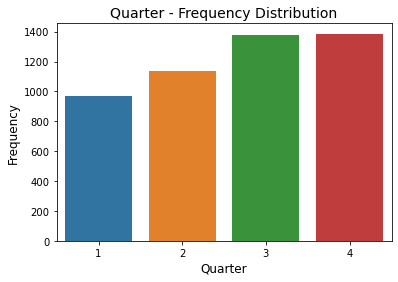

In [79]:
quarter = pd.DataFrame(moviedb.groupby(['Quarter'])['Title'].count().reset_index())
quarter.rename(columns={'Title':'Frequency'}, inplace=True)

sns.barplot(x='Quarter', y='Frequency', data = quarter)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Quarter - Frequency Distribution', fontsize=14)

No mistakes, aberrations, or problems are found in the attribute Quarter.

Let's check Weekday Frequency Distribution.

Text(0.5, 1.0, 'Weekday - Frequency Distribution')

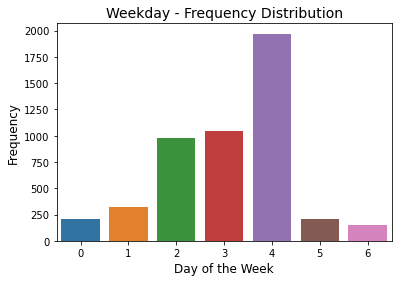

In [80]:
weekday = pd.DataFrame(moviedb.groupby(['Weekday'])['Title'].count().reset_index())
weekday.rename(columns={'Title':'Frequency'}, inplace=True)

sns.barplot(x='Weekday', y='Frequency', data = weekday)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Weekday - Frequency Distribution', fontsize=14)

In [81]:
# check the frequency in % of the days of week
moviedb['Weekday'].value_counts(normalize=True)

4    0.404434
3    0.214124
2    0.201191
1    0.065695
5    0.042291
0    0.042086
6    0.030179
Name: Weekday, dtype: float64

Weekday distribution is quite imbalanced, with 40% of movies been released on Friday. Besides an imbalanced distribution, no mistakes, aberrations, or problems are found in the attribute.  
Let's change the weekday number with the name.

In [82]:
moviedb.loc[moviedb[moviedb['Weekday'] == 0].index, 'Weekday'] = 'Monday'
moviedb.loc[moviedb[moviedb['Weekday'] == 1].index, 'Weekday'] = 'Tuesday'
moviedb.loc[moviedb[moviedb['Weekday'] == 2].index, 'Weekday'] = 'Wednesday'
moviedb.loc[moviedb[moviedb['Weekday'] == 3].index, 'Weekday'] = 'Thursday'
moviedb.loc[moviedb[moviedb['Weekday'] == 4].index, 'Weekday'] = 'Friday'
moviedb.loc[moviedb[moviedb['Weekday'] == 5].index, 'Weekday'] = 'Saturday'
moviedb.loc[moviedb[moviedb['Weekday'] == 6].index, 'Weekday'] = 'Sunday'

moviedb.head()

Title                    Genres  \
0  Dilwale Dulhania Le Jayenge  Comedy | Drama | Romance   
1     The Shawshank Redemption             Crime | Drama   
2                The Godfather             Crime | Drama   
3             Schindler's List     Drama | History | War   
4       The Godfather: Part II             Crime | Drama   

                                                Cast  \
0  Shah Rukh Khan | Kajol | Amrish Puri | Anupam ...   
1  Tim Robbins | Morgan Freeman | Bob Gunton | Cl...   
2  Marlon Brando | Al Pacino | James Caan | Richa...   
3  Liam Neeson | Ben Kingsley | Ralph Fiennes | C...   
4  Al Pacino | Robert Duvall | Diane Keaton | Rob...   

                                                Crew Collection Release_Date  \
0  Farah Khan | Yash Chopra | Aditya Chopra | Adi...      False   1995-10-20   
1  Thomas Newman | Thomas Newman | Roger Deakins ...      False   1994-09-23   
2  Francis Ford Coppola | Francis Ford Coppola | ...       True   1972-03-14   
3  John Williams | Steven Spielberg | Steven Spie...      False   1993-11-30   
4  Walter Murch | Walter Murch | Francis Ford Cop...       True   1974-12-20   

  Original_Language                       Languages_Spoken  Runtime  \
0                hi                                 हिन्दी    190.0   
1                en                                English    142.0   
2                en             English | Italiano | Latin    175.0   
3                en  Deutsch | Polski | עִבְרִית | English    195.0   
4                en   English | Italiano | Latin | Español    202.0   

                        Production_Companies         Country_of_Origin  \
0                             Yash Raj Films                     India   
1                  Castle Rock Entertainment  United States of America   
2             Paramount | Alfran Productions  United States of America   
3  Universal Pictures | Amblin Entertainment  United States of America   
4            Paramount | The Coppola Company  United States of America   

       Budget      Revenue      Month  Quarter  Weekday  Weekend  
0  13200000.0  100000000.0    October        4   Friday        1  
1  25000000.0   28341469.0  September        3   Friday        1  
2   6000000.0  245066411.0      March        1  Tuesday        0  
3  22000000.0  321365567.0   November        4  Tuesday        0  
4  13000000.0  102600000.0   December        4   Friday        1

In [83]:
moviedb.tail()

Title  \
17015  The End of the Affair   
17019            Killing Zoe   
17026     Invaders from Mars   
17029      Jumping the Broom   
17031                Smashed   

                                                  Genres  \
17015                                              Drama   
17019                  Action | Crime | Drama | Thriller   
17026  Adventure | Horror | Mystery | Science Fiction...   
17029                                             Comedy   
17031                                     Comedy | Drama   

                                                    Cast  \
17015  Ralph Fiennes | Stephen Rea | Julianne Moore |...   
17019  Eric Stoltz | Julie Delpy | Jean-Hugues Anglad...   
17026  Hunter Carson | Karen Black | Timothy Bottoms ...   
17029  Paula Patton | Julie Bowen | Meagan Good | Mik...   
17031  Mary Elizabeth Winstead | Aaron Paul | Octavia...   

                                                    Crew Collection  \
17015  Roger Pratt | Susie Figgis | Stephen Woolley |...      False   
17019  Quentin Tarantino | David Wasco | Roger Avary ...      False   
17026  Dan O'Bannon | Leslie Dilley | Dana Lyman | Da...      False   
17029  Tracey Edmonds | Arlene Gibbs | Elizabeth Hunt...      False   
17031  Avy Kaufman | Kim Coleman | Andrea Sperling | ...      False   

      Release_Date Original_Language    Languages_Spoken  Runtime  \
17015   1999-12-03                en             English    102.0   
17019   1993-10-01                en  English | Français     96.0   
17026   1986-01-01                en             English    100.0   
17029   2011-05-06                en             English    112.0   
17031   2012-09-12                en             English     85.0   

                                    Production_Companies  \
17015                                  Columbia Pictures   
17019                                 Live Entertainment   
17026            Cannon Group | Golan-Globus Productions   
17029  Sony Pictures | TriStar Pictures | Stage 6 Fil...   
17031                         Super Crispy Entertainment   

                               Country_of_Origin      Budget     Revenue  \
17015  United States of America | United Kingdom  23000000.0  10827816.0   
17019          France | United States of America   1500000.0    418961.0   
17026                   United States of America  12000000.0   4884663.0   
17029                   United States of America   6600000.0  37710610.0   
17031                   United States of America    500000.0    376597.0   

           Month  Quarter    Weekday  Weekend  
17015   December        4     Friday        1  
17019    October        4     Friday        1  
17026    January        1  Wednesday        0  
17029        May        2     Friday        1  
17031  September        3  Wednesday        0

Let's check Weekend categories Frequency Distribution.

Text(0.5, 1.0, 'Weekend - Frequency Distribution')

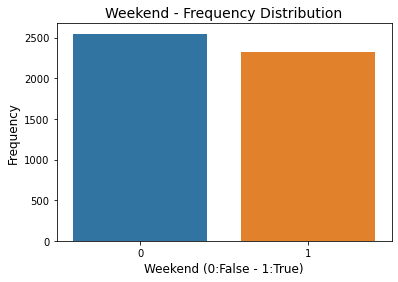

In [84]:
weekend = pd.DataFrame(moviedb.groupby(['Weekend'])['Title'].count().reset_index())
weekend.rename(columns={'Title':'Frequency'}, inplace=True)

sns.barplot(x='Weekend', y='Frequency', data = weekend)
plt.xlabel('Weekend (0:False - 1:True)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Weekend - Frequency Distribution', fontsize=14)

In [85]:
# check the frequency in % of the days of week
moviedb['Weekend'].value_counts(normalize=True)

0    0.523096
1    0.476904
Name: Weekend, dtype: float64

No mistakes, aberrations, or problems are found in the attribute.

We can now drop the attribute Relesase_Date.

In [86]:
moviedb.drop(['Release_Date'], axis=1, inplace=True)
moviedb.shape

(4871, 16)

___

In [87]:
moviedb['Original_Language'].value_counts(normalize=True).head()

en    0.921371
fr    0.017656
es    0.009649
hi    0.009033
ja    0.006980
Name: Original_Language, dtype: float64

In [88]:
moviedb['Original_Language'].value_counts(normalize=False).head()

en    4488
fr      86
es      47
hi      44
ja      34
Name: Original_Language, dtype: int64

English (en) is the original language for 4,488 (92%) movies in the dataset. I'll transform the attribute as "Original_Language: English", with True and False as values.

In [89]:
# change the name of the column
moviedb.rename(columns={'Original_Language':"English_Language"}, inplace=True)

# change the values
moviedb.loc[moviedb[moviedb['English_Language'] != 'en'].index, 'English_Language'] = False
moviedb.loc[moviedb[moviedb['English_Language'] == 'en'].index, 'English_Language'] = True

Let's change the order of the columns to move Revenue to the end, and have a look at cleaned dataset.

In [90]:
moviedb.columns

Index(['Title', 'Genres', 'Cast', 'Crew', 'Collection', 'English_Language',
       'Languages_Spoken', 'Runtime', 'Production_Companies',
       'Country_of_Origin', 'Budget', 'Revenue', 'Month', 'Quarter', 'Weekday',
       'Weekend'],
      dtype='object')

In [91]:
column_names = ['Title', 'Genres', 'Cast', 'Crew', 'Collection', 'English_Language', 'Languages_Spoken', 'Runtime',\
                'Production_Companies', 'Country_of_Origin', 'Budget', 'Month', 'Quarter', 'Weekday', 'Weekend', 'Revenue']
moviedb = moviedb.reindex(columns=column_names)
moviedb.reset_index(drop=True, inplace=True)

moviedb.head()

Title                    Genres  \
0  Dilwale Dulhania Le Jayenge  Comedy | Drama | Romance   
1     The Shawshank Redemption             Crime | Drama   
2                The Godfather             Crime | Drama   
3             Schindler's List     Drama | History | War   
4       The Godfather: Part II             Crime | Drama   

                                                Cast  \
0  Shah Rukh Khan | Kajol | Amrish Puri | Anupam ...   
1  Tim Robbins | Morgan Freeman | Bob Gunton | Cl...   
2  Marlon Brando | Al Pacino | James Caan | Richa...   
3  Liam Neeson | Ben Kingsley | Ralph Fiennes | C...   
4  Al Pacino | Robert Duvall | Diane Keaton | Rob...   

                                                Crew Collection  \
0  Farah Khan | Yash Chopra | Aditya Chopra | Adi...      False   
1  Thomas Newman | Thomas Newman | Roger Deakins ...      False   
2  Francis Ford Coppola | Francis Ford Coppola | ...       True   
3  John Williams | Steven Spielberg | Steven Spie...      False   
4  Walter Murch | Walter Murch | Francis Ford Cop...       True   

  English_Language                       Languages_Spoken  Runtime  \
0            False                                 हिन्दी    190.0   
1             True                                English    142.0   
2             True             English | Italiano | Latin    175.0   
3             True  Deutsch | Polski | עִבְרִית | English    195.0   
4             True   English | Italiano | Latin | Español    202.0   

                        Production_Companies         Country_of_Origin  \
0                             Yash Raj Films                     India   
1                  Castle Rock Entertainment  United States of America   
2             Paramount | Alfran Productions  United States of America   
3  Universal Pictures | Amblin Entertainment  United States of America   
4            Paramount | The Coppola Company  United States of America   

       Budget      Month  Quarter  Weekday  Weekend      Revenue  
0  13200000.0    October        4   Friday        1  100000000.0  
1  25000000.0  September        3   Friday        1   28341469.0  
2   6000000.0      March        1  Tuesday        0  245066411.0  
3  22000000.0   November        4  Tuesday        0  321365567.0  
4  13000000.0   December        4   Friday        1  102600000.0

In [92]:
moviedb.tail()

Title  \
4866  The End of the Affair   
4867            Killing Zoe   
4868     Invaders from Mars   
4869      Jumping the Broom   
4870                Smashed   

                                                 Genres  \
4866                                              Drama   
4867                  Action | Crime | Drama | Thriller   
4868  Adventure | Horror | Mystery | Science Fiction...   
4869                                             Comedy   
4870                                     Comedy | Drama   

                                                   Cast  \
4866  Ralph Fiennes | Stephen Rea | Julianne Moore |...   
4867  Eric Stoltz | Julie Delpy | Jean-Hugues Anglad...   
4868  Hunter Carson | Karen Black | Timothy Bottoms ...   
4869  Paula Patton | Julie Bowen | Meagan Good | Mik...   
4870  Mary Elizabeth Winstead | Aaron Paul | Octavia...   

                                                   Crew Collection  \
4866  Roger Pratt | Susie Figgis | Stephen Woolley |...      False   
4867  Quentin Tarantino | David Wasco | Roger Avary ...      False   
4868  Dan O'Bannon | Leslie Dilley | Dana Lyman | Da...      False   
4869  Tracey Edmonds | Arlene Gibbs | Elizabeth Hunt...      False   
4870  Avy Kaufman | Kim Coleman | Andrea Sperling | ...      False   

     English_Language    Languages_Spoken  Runtime  \
4866             True             English    102.0   
4867             True  English | Français     96.0   
4868             True             English    100.0   
4869             True             English    112.0   
4870             True             English     85.0   

                                   Production_Companies  \
4866                                  Columbia Pictures   
4867                                 Live Entertainment   
4868            Cannon Group | Golan-Globus Productions   
4869  Sony Pictures | TriStar Pictures | Stage 6 Fil...   
4870                         Super Crispy Entertainment   

                              Country_of_Origin      Budget      Month  \
4866  United States of America | United Kingdom  23000000.0   December   
4867          France | United States of America   1500000.0    October   
4868                   United States of America  12000000.0    January   
4869                   United States of America   6600000.0        May   
4870                   United States of America    500000.0  September   

      Quarter    Weekday  Weekend     Revenue  
4866        4     Friday        1  10827816.0  
4867        4     Friday        1    418961.0  
4868        1  Wednesday        0   4884663.0  
4869        2     Friday        1  37710610.0  
4870        3  Wednesday        0    376597.0

### 2.2. EDA - Exploratory Data Analysis <a name=eda></a> 

In [93]:
from scipy import stats
from scipy.stats import boxcox
from scipy.stats.mstats import normaltest
print('Needed libraries imported.')

Needed libraries imported.


Let's check for numeric-type variable correlation.

Pair Scatter plots of numeric-type variables


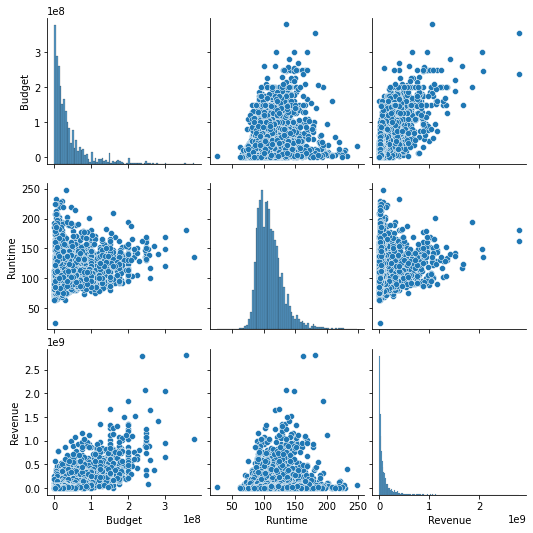

In [94]:
print('Pair Scatter plots of numeric-type variables')
sns.pairplot(moviedb[['Budget', 'Runtime', 'Revenue']])
plt.show()

None of the attributes is normally distributed, as we've already observed. It seems that Budget and Revenue have a linear correlation. Let's check the Pearson Correlation Coefficient.

In [95]:
def corr_coeff(feature, target):
    c, p = stats.pearsonr(moviedb[feature], moviedb[target])
    print('Pearson\'s correlation coefficient of {} and {}:{}.'.format(feature, target, c))
    # set the threshold at 0.7 to determine whether the variables are linearly correlated 
    if c >= 0.7:
        print('Variables show a positive linear relationship.')
    elif c <= -0.7:
        print('Variables show a negative linear relationship.')
    else:
        print('Variables don\'t show a linear tendency.')
              
    if p <= 0.001:
              print('Strong certainty in the calculated correlation coefficient.')
    elif p > 0.001 & p <= 0.05:
              print('Moderate certainty in the calculated correlation coefficient.')
    elif p > 0.05 & p <= 0.1:
              print('Weak certainty in the calculated correlation coefficient.')
    else:
              print('No certainty in the calculated correlation coefficient.')
              
corr_coeff('Budget', 'Revenue')

Pearson's correlation coefficient of Budget and Revenue:0.7245438708191911.
Variables show a positive linear relationship.
Strong certainty in the calculated correlation coefficient.


In [96]:
corr_coeff('Runtime', 'Revenue')

Pearson's correlation coefficient of Runtime and Revenue:0.2185895987868659.
Variables don't show a linear tendency.
Strong certainty in the calculated correlation coefficient.


Budget and Revenue have a positive linear relationship, although Runtime and Revenue don't show any linear tendency.  
I'll transform the target variable Revenue, using Box Cox Transformation, and check if the transformation helps "normalize" the target distribution, and strengthen the correlations between the variables.

In [97]:
revenue_bc, parameter_bc = boxcox(moviedb['Revenue'])
moviedb['Revenue_BC'] = revenue_bc
moviedb.head(1)

Title                    Genres  \
0  Dilwale Dulhania Le Jayenge  Comedy | Drama | Romance   

                                                Cast  \
0  Shah Rukh Khan | Kajol | Amrish Puri | Anupam ...   

                                                Crew Collection  \
0  Farah Khan | Yash Chopra | Aditya Chopra | Adi...      False   

  English_Language Languages_Spoken  Runtime Production_Companies  \
0            False           हिन्दी    190.0       Yash Raj Films   

  Country_of_Origin      Budget    Month  Quarter Weekday  Weekend  \
0             India  13200000.0  October        4  Friday        1   

       Revenue  Revenue_BC  
0  100000000.0  130.716151

In [98]:
# define a function for testing whether data distribution is normal
def norm_test(data):
    test_statistic, p_value = normaltest(data)
    if p_value <= 0.05:
        print('Data is not Normally distributed.')
    else:
        print('Data is Normally distributed.')
        
norm_test(revenue_bc)

Data is Normally distributed.


Revenue_BC distribution skewness: 0.003598832066076301
Variable distribution is approximately Normal


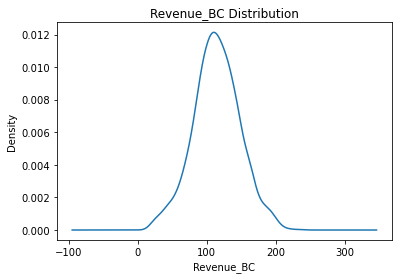

In [99]:
# density plot and skeweness
plot_distribution('Revenue_BC')
var_skew('Revenue_BC')

The Box Cox transformation was successful: Revenue distribution is now Normal, with a skew score close to zero. Let's check whether the Box Cox Transformation has strengthen the linear correlations of the variables.

In [100]:
# without transforming the feature Budget
corr_coeff('Budget', 'Revenue_BC')

Pearson's correlation coefficient of Budget and Revenue_BC:0.6575013963961369.
Variables don't show a linear tendency.
Strong certainty in the calculated correlation coefficient.


In [101]:
# transforming the feature Budget (Box Cox)
budget_bc, parameter_bc = boxcox(moviedb['Budget'])
moviedb['Budget_BC'] = budget_bc

corr_coeff('Budget_BC', 'Revenue_BC')

Pearson's correlation coefficient of Budget_BC and Revenue_BC:0.687512081825017.
Variables don't show a linear tendency.
Strong certainty in the calculated correlation coefficient.


In [102]:
# without transforming the feature Runtime
corr_coeff('Runtime', 'Revenue_BC')

Pearson's correlation coefficient of Runtime and Revenue_BC:0.2124776325947906.
Variables don't show a linear tendency.
Strong certainty in the calculated correlation coefficient.


In [103]:
# transforming the feature Runtime (Box Cox)
runtime_bc, parameter_bc = boxcox(moviedb['Runtime'])
moviedb['Runtime_BC'] = runtime_bc

corr_coeff('Runtime_BC', 'Revenue_BC')

Pearson's correlation coefficient of Runtime_BC and Revenue_BC:0.22298861378157742.
Variables don't show a linear tendency.
Strong certainty in the calculated correlation coefficient.


BoxCox transformation failed to strengthen any linear relationship between Runtime and Revenue, and the linear tendency between Budget and Revenue is actually less evident after the transformation.  
Considering this, and the fact that a Normal distribution of the target variable is not a strict requirement for Linear Regression models, I decide not to transform the target.

In [104]:
# drop the transformed variables
moviedb.drop(['Revenue_BC', 'Budget_BC', 'Runtime_BC'], axis=1, inplace=True)
moviedb.head(1)

Title                    Genres  \
0  Dilwale Dulhania Le Jayenge  Comedy | Drama | Romance   

                                                Cast  \
0  Shah Rukh Khan | Kajol | Amrish Puri | Anupam ...   

                                                Crew Collection  \
0  Farah Khan | Yash Chopra | Aditya Chopra | Adi...      False   

  English_Language Languages_Spoken  Runtime Production_Companies  \
0            False           हिन्दी    190.0       Yash Raj Films   

  Country_of_Origin      Budget    Month  Quarter Weekday  Weekend  \
0             India  13200000.0  October        4  Friday        1   

       Revenue  
0  100000000.0

___

We've observed that Runtime is not linearly correlated with the target. I want to see if an interaction between Budget and Runtime has a linear correlation with the Revenue.

Text(0, 0.5, 'Revenue')

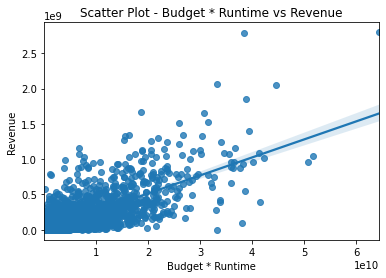

In [105]:
# Create the feature interaction
moviedb['Budget*Runtime'] = moviedb['Budget'] * moviedb['Runtime']
# Regression-scatter plot
sns.regplot(x=moviedb['Budget*Runtime'], y=moviedb['Revenue'])
plt.title('Scatter Plot - Budget * Runtime vs Revenue')
plt.xlabel('Budget * Runtime')
plt.ylabel('Revenue')

In [106]:
# check the correlation coefficient
corr_coeff('Budget*Runtime', 'Revenue')

Pearson's correlation coefficient of Budget*Runtime and Revenue:0.7415611855806474.
Variables show a positive linear relationship.
Strong certainty in the calculated correlation coefficient.


The feature interaction (Budget times Runtime) definitely shows a linear tendency with the target Revenue. This means that, although Runtime alone is not enough to explain the Revenue, when multiplied by the Budget, Runtime can have an explanatory value in regard to the revenue: in other words, a long movie, which also has a high budget, has more chances of being a box office success.  
___

Let's create another feature interaction: Budget / Runtime; the budget spent per minute of the movie.

Text(0, 0.5, 'Revenue')

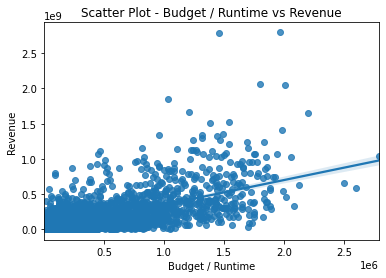

In [107]:
# Create the feature interaction
moviedb['Budget/Runtime'] = moviedb['Budget'] / moviedb['Runtime']
# Regression-scatter plot
sns.regplot(x=moviedb['Budget/Runtime'], y=moviedb['Revenue'])
plt.title('Scatter Plot - Budget / Runtime vs Revenue')
plt.xlabel('Budget / Runtime')
plt.ylabel('Revenue')

In [108]:
# check the correlation coefficient
corr_coeff('Budget/Runtime', 'Revenue')

Pearson's correlation coefficient of Budget/Runtime and Revenue:0.6705686029328686.
Variables don't show a linear tendency.
Strong certainty in the calculated correlation coefficient.


The Correlation coefficient is not great enough to state that there's a Linear Correlation with the target.

___

Considering the analysis so far, below are some first considerations about feature selection:
* "Budget * Runtime" is selected as feature to train a Linear Regression Model.
* Budget is not selected as feature to avoid multi-collinearity issue with the variable "Budget * Runtime" (the 2 features are, obviously, highly correlated, therefore they are not really independent variables).
* Runtime is not selected as feature to train a Linear Regression Model.
* "Budget/Runtime" is not selected as feature to train a Linear Regression Model.

___

Let's check for correlations between the target and some of the categorical features.

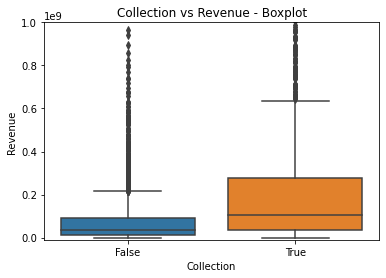

In [109]:
sns.boxplot(x='Collection', y='Revenue', data=moviedb)
plt.ylim(-10000000,1000000000)
plt.title('Collection vs Revenue - Boxplot')
plt.show()

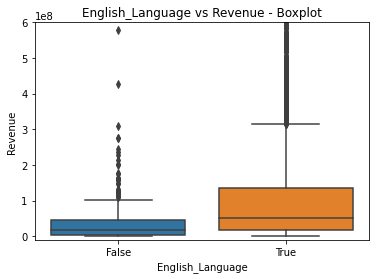

In [110]:
sns.boxplot(x='English_Language', y='Revenue', data=moviedb)
plt.ylim(-10000000,600000000)
plt.title('English_Language vs Revenue - Boxplot')
plt.show()

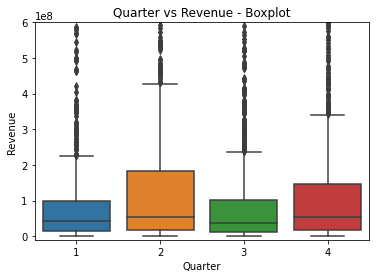

In [111]:
sns.boxplot(x='Quarter', y='Revenue', data=moviedb)
plt.ylim(-10000000,600000000)
plt.title('Quarter vs Revenue - Boxplot')
plt.show()

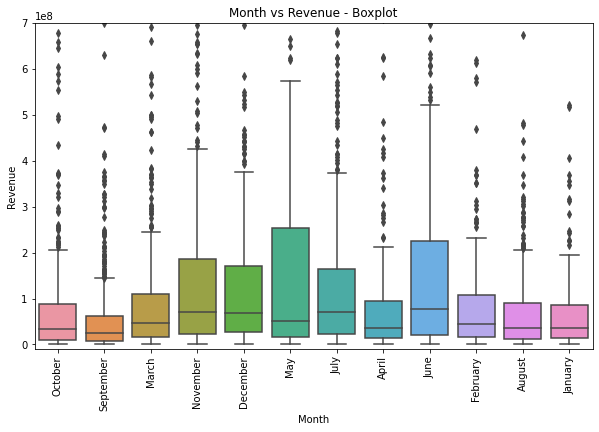

In [112]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Month', y='Revenue', data=moviedb)
plt.xticks(rotation=90)
plt.ylim(-10000000,700000000)
plt.title('Month vs Revenue - Boxplot')
plt.show()

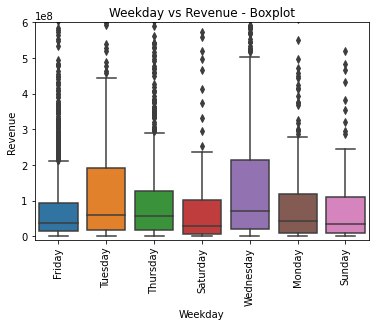

In [113]:
sns.boxplot(x='Weekday', y='Revenue', data=moviedb)
plt.xticks(rotation=90)
plt.ylim(-10000000,600000000)
plt.title('Weekday vs Revenue - Boxplot')
plt.show()

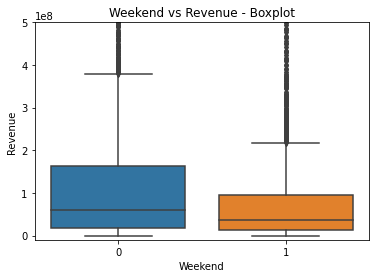

In [114]:
sns.boxplot(x='Weekend', y='Revenue', data=moviedb)
plt.ylim(-10000000,500000000)
plt.title('Weekend vs Revenue - Boxplot')
plt.show()

In [115]:
moviedb.columns

Index(['Title', 'Genres', 'Cast', 'Crew', 'Collection', 'English_Language',
       'Languages_Spoken', 'Runtime', 'Production_Companies',
       'Country_of_Origin', 'Budget', 'Month', 'Quarter', 'Weekday', 'Weekend',
       'Revenue', 'Budget*Runtime', 'Budget/Runtime'],
      dtype='object')

It seems that Collection (whether a movie is part of a collection or not) can be a good predictor for the revenue: a movie that is part of a collection has more chances of being a box-office success than movie which is not.  
Also the feature Weekend seems to be a suitable predictor: movies released not during the weekends have grossed better than movies released over weekends.  
The distance between the English_Language categories (True/False) doesn't seem to be very significant; Quarter, Month, and Weekday show some overlapping between categories: they may not be good explanatory variables for the target Revenue.  
Let's validate our insights performing the Analsys of Variance (ANOVA).

In [116]:
collection = moviedb.groupby(['Collection'])
f_score_coll, p_value_coll = stats.f_oneway(collection.get_group(False)['Revenue'], collection.get_group(True)['Revenue'])
f_score_coll, p_value_coll

(534.9807788403397, 2.1876288574668586e-112)

In [117]:
english = moviedb.groupby(['English_Language'])
f_score_en, p_value_en = stats.f_oneway(english.get_group(False)['Revenue'], english.get_group(True)['Revenue'])
f_score_en, p_value_en

(59.710929711215535, 1.3253965662011726e-14)

In [118]:
quarter = moviedb.groupby(['Quarter'])
f_score_quarter, p_value_quarter = stats.f_oneway(quarter.get_group(1)['Revenue'], quarter.get_group(2)['Revenue'],\
                                                 quarter.get_group(3)['Revenue'], quarter.get_group(4)['Revenue'])
f_score_quarter, p_value_quarter

(36.85812987940133, 1.5156505830465913e-23)

In [119]:
month = moviedb.groupby(['Month'])
f_score_month, p_value_month = stats.f_oneway(month.get_group('January')['Revenue'], month.get_group('February')['Revenue'],\
                                              month.get_group('March')['Revenue'], month.get_group('April')['Revenue'],\
                                              month.get_group('May')['Revenue'], month.get_group('June')['Revenue'],\
                                              month.get_group('July')['Revenue'], month.get_group('August')['Revenue'],\
                                              month.get_group('September')['Revenue'],month.get_group('October')['Revenue'],\
                                              month.get_group('November')['Revenue'],month.get_group('December')['Revenue'])
                                              
f_score_month, p_value_month

(20.887922223737462, 5.393110740725981e-42)

In [120]:
weekday = moviedb.groupby(['Weekday'])
f_score_weekday, p_value_weekday = stats.f_oneway(weekday.get_group('Monday')['Revenue'],\
                                                  weekday.get_group('Tuesday')['Revenue'],\
                                                  weekday.get_group('Wednesday')['Revenue'],\
                                                  weekday.get_group('Thursday')['Revenue'],\
                                                  weekday.get_group('Friday')['Revenue'],\
                                                  weekday.get_group('Saturday')['Revenue'],\
                                                  weekday.get_group('Sunday')['Revenue'])
                                                                                                
f_score_weekday, p_value_weekday

(33.389122394658976, 1.1077353445579325e-39)

In [121]:
weekend = moviedb.groupby(['Weekend'])
f_score_weekend, p_value_weekend = stats.f_oneway(weekend.get_group(0)['Revenue'], weekend.get_group(1)['Revenue'])
f_score_weekend, p_value_weekend

(130.61065415125591, 7.217773998195493e-30)

In [122]:
import operator

print('F_test scores by ANOVA:')
ftests = dict({'Collection':f_score_coll, 'English_Language':f_score_en, 'Quarter':f_score_quarter, 'Month':f_score_month,\
      'Weekday':f_score_weekday, 'Weekend':f_score_weekend})
dict(sorted(ftests.items(), key=operator.itemgetter(1), reverse=True)) # sort the dictionary

F_test scores by ANOVA:


{'Collection': 534.9807788403397,
 'Weekend': 130.61065415125591,
 'English_Language': 59.710929711215535,
 'Quarter': 36.85812987940133,
 'Weekday': 33.389122394658976,
 'Month': 20.887922223737462}

As observed, Collection and Weekend have the highest explanatory value over the target Revenue.

### 2.3. Feature Selection and Variable Transformation <a name="featureengineering"></a>

In [123]:
from tqdm import tqdm
from collections import Counter
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
print('Needed libraries imported.')

Needed libraries imported.


Let's analyze the columns that are JSON lists of ‘values’. We'll select the most frequent values for the following features, checking for correlations with the target, and, in case the feature is relevant, apply **one-hot encoding** transformation:
* Cast
* Crew
* Production Companies
* Genres
* Languages_spoken
* Country

##### Cast

In [124]:
# Define a funtion to output a list with all values, including duplicates, in the "JSON-lists" columns
def category_list(new_column, old_column):
    # Create a new column with only unique values without duplicates
    moviedb[new_column] = moviedb[old_column].apply(lambda x: " , ".join(set(x.split(" | "))))
    
    # Take the new column, split the categories using ' , ' as separator, and create a new dataframe
    new_df = moviedb[new_column].str.split(' , ', expand=True)
    
    # Get rid of ending and trailing spaces
    with tqdm(position=0, leave=True) as pbar:
        for col in tqdm(range(new_df.shape[1]), position=0, leave=True):
            new_df[col] = new_df[col].str.strip()
            
    # create a list with all values, including duplicates
    global total_list
    total_list = []
    with tqdm(position=0, leave=True) as pbar:
        for movie in tqdm(range(new_df.shape[0]), position=0, leave=True):
            for col in range(new_df.shape[1]):
                total_list.append(new_df.loc[movie][col])
                
    # check how many elements are in the list 
    print('Number of elements in the list, including duplicates:', len(total_list))

In [125]:
category_list('Unique_Cast', 'Cast')

100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 507.09it/s]
0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████| 4871/4871 [02:32<00:00, 31.94it/s]
0it [02:32, ?it/s]

Number of elements in the list, including duplicates: 1524623


In [126]:
# Define a function to create a dataframe with only unique values and their frequency
def value_frequency_df(list_name, column_name):
    # create a dictionary/counter object with the unique elements in the list and their frequency
    list_count = Counter(list_name)
    dict(list_count)
                    
    # sort the dictionary by values
    list_sorted = dict(sorted(list_count.items(), key=operator.itemgetter(1), reverse=True))
    
    # convert the dictionary into a dataframe
    df_sorted = pd.DataFrame.from_dict(list_sorted, orient='index')
    # reset the index
    df_sorted.reset_index(inplace=True)
    # change column names
    df_sorted.rename(columns={'index':column_name, 0:'Num_Movies'}, inplace=True)
    # drop the first row ('None' values)
    df_sorted.drop(0, axis=0, inplace=True)
    
    return df_sorted    

In [127]:
cast_list = total_list
cast_df = value_frequency_df(cast_list, 'Cast_Member')
cast_df.head(16)

Cast_Member  Num_Movies
1         Frank Welker          81
2    Samuel L. Jackson          78
3       Robert De Niro          64
4         Bruce Willis          62
5       Morgan Freeman          57
6           Matt Damon          55
7          Liam Neeson          54
8         Nicolas Cage          53
9        Steve Buscemi          50
10        J.K. Simmons          50
11         Johnny Depp          50
12        Willem Dafoe          47
13  Sylvester Stallone          47
14        John Goodman          46
15           Brad Pitt          45
16           Tom Hanks          43

I set a threshold at 45 movies: I'll keep only the actors or actresses who have starred in at least 45 movies, that is the first 15 cast members in the cast dataframe.  
I'll add now, in the moviedb dataset, a new column with the top 15 cast members only.

In [128]:
# define a funtion to add a column with the most frequent values only, based on the select criteria
def top_value_column(dataframe, threshold, new_column, column_1, column_2):
    # select the top values based on defined criteria
    top_values = dataframe[dataframe['Num_Movies'] >= threshold]
    
    # create a new column with only the top values per movie
    moviedb[new_column] = moviedb[column_1].apply(lambda x: ', '.join(set(x.split(' , ')) &\
                                                                          set(list(top_values[column_2]))))    

In [129]:
top_value_column(cast_df, threshold=45, new_column='Top_Cast', column_1='Unique_Cast', column_2='Cast_Member')
moviedb.head(5)

Title                    Genres  \
0  Dilwale Dulhania Le Jayenge  Comedy | Drama | Romance   
1     The Shawshank Redemption             Crime | Drama   
2                The Godfather             Crime | Drama   
3             Schindler's List     Drama | History | War   
4       The Godfather: Part II             Crime | Drama   

                                                Cast  \
0  Shah Rukh Khan | Kajol | Amrish Puri | Anupam ...   
1  Tim Robbins | Morgan Freeman | Bob Gunton | Cl...   
2  Marlon Brando | Al Pacino | James Caan | Richa...   
3  Liam Neeson | Ben Kingsley | Ralph Fiennes | C...   
4  Al Pacino | Robert Duvall | Diane Keaton | Rob...   

                                                Crew Collection  \
0  Farah Khan | Yash Chopra | Aditya Chopra | Adi...      False   
1  Thomas Newman | Thomas Newman | Roger Deakins ...      False   
2  Francis Ford Coppola | Francis Ford Coppola | ...       True   
3  John Williams | Steven Spielberg | Steven Spie...      False   
4  Walter Murch | Walter Murch | Francis Ford Cop...       True   

  English_Language                       Languages_Spoken  Runtime  \
0            False                                 हिन्दी    190.0   
1             True                                English    142.0   
2             True             English | Italiano | Latin    175.0   
3             True  Deutsch | Polski | עִבְרִית | English    195.0   
4             True   English | Italiano | Latin | Español    202.0   

                        Production_Companies         Country_of_Origin  \
0                             Yash Raj Films                     India   
1                  Castle Rock Entertainment  United States of America   
2             Paramount | Alfran Productions  United States of America   
3  Universal Pictures | Amblin Entertainment  United States of America   
4            Paramount | The Coppola Company  United States of America   

       Budget      Month  Quarter  Weekday  Weekend      Revenue  \
0  13200000.0    October        4   Friday        1  100000000.0   
1  25000000.0  September        3   Friday        1   28341469.0   
2   6000000.0      March        1  Tuesday        0  245066411.0   
3  22000000.0   November        4  Tuesday        0  321365567.0   
4  13000000.0   December        4   Friday        1  102600000.0   

   Budget*Runtime  Budget/Runtime  \
0    2.508000e+09    69473.684211   
1    3.550000e+09   176056.338028   
2    1.050000e+09    34285.714286   
3    4.290000e+09   112820.512821   
4    2.626000e+09    64356.435644   

                                         Unique_Cast        Top_Cast  
0  Govind Khatri , Arjun Sablok , Pooja Ruparel ,...                  
1  Robert Haley , Neil Summers , Tim Robbins , Al...  Morgan Freeman  
2  Sterling Hayden , Abe Vigoda , Talia Shire , R...                  
3  Thomas Morris , Wolfgang Seidenberg , Michael ...     Liam Neeson  
4  Maria Carta , Joe De Nicola , Talia Shire , Ga...  Robert De Niro

In [130]:
moviedb.tail()

Title  \
4866  The End of the Affair   
4867            Killing Zoe   
4868     Invaders from Mars   
4869      Jumping the Broom   
4870                Smashed   

                                                 Genres  \
4866                                              Drama   
4867                  Action | Crime | Drama | Thriller   
4868  Adventure | Horror | Mystery | Science Fiction...   
4869                                             Comedy   
4870                                     Comedy | Drama   

                                                   Cast  \
4866  Ralph Fiennes | Stephen Rea | Julianne Moore |...   
4867  Eric Stoltz | Julie Delpy | Jean-Hugues Anglad...   
4868  Hunter Carson | Karen Black | Timothy Bottoms ...   
4869  Paula Patton | Julie Bowen | Meagan Good | Mik...   
4870  Mary Elizabeth Winstead | Aaron Paul | Octavia...   

                                                   Crew Collection  \
4866  Roger Pratt | Susie Figgis | Stephen Woolley |...      False   
4867  Quentin Tarantino | David Wasco | Roger Avary ...      False   
4868  Dan O'Bannon | Leslie Dilley | Dana Lyman | Da...      False   
4869  Tracey Edmonds | Arlene Gibbs | Elizabeth Hunt...      False   
4870  Avy Kaufman | Kim Coleman | Andrea Sperling | ...      False   

     English_Language    Languages_Spoken  Runtime  \
4866             True             English    102.0   
4867             True  English | Français     96.0   
4868             True             English    100.0   
4869             True             English    112.0   
4870             True             English     85.0   

                                   Production_Companies  \
4866                                  Columbia Pictures   
4867                                 Live Entertainment   
4868            Cannon Group | Golan-Globus Productions   
4869  Sony Pictures | TriStar Pictures | Stage 6 Fil...   
4870                         Super Crispy Entertainment   

                              Country_of_Origin      Budget      Month  \
4866  United States of America | United Kingdom  23000000.0   December   
4867          France | United States of America   1500000.0    October   
4868                   United States of America  12000000.0    January   
4869                   United States of America   6600000.0        May   
4870                   United States of America    500000.0  September   

      Quarter    Weekday  Weekend     Revenue  Budget*Runtime  Budget/Runtime  \
4866        4     Friday        1  10827816.0    2.346000e+09   225490.196078   
4867        4     Friday        1    418961.0    1.440000e+08    15625.000000   
4868        1  Wednesday        0   4884663.0    1.200000e+09   120000.000000   
4869        2     Friday        1  37710610.0    7.392000e+08    58928.571429   
4870        3  Wednesday        0    376597.0    4.250000e+07     5882.352941   

                                            Unique_Cast Top_Cast  
4866  Julianne Moore , Cyril Shaps , Simon Turner , ...           
4867  Tai Thai , Eric Pascal Chaltiel , Jean-Hugues ...           
4868  Kenneth Kimmins , Mark Giardino , Debbie Lee C...           
4869  Tasha Smith , DeRay Davis , Mike Epps , Paula ...           
4870  Megan Mullally , Aaron Paul , Patti Allison , ...

I'll proceed now by performing one-hot encoding (a nominal kind of encoding) on the top (most frequent) cast members.

In [131]:
# One Hot Encoding
topcast_encoded = moviedb['Top_Cast'].str.get_dummies(sep=', ')
topcast_encoded.head()

Brad Pitt  Bruce Willis  Frank Welker  J.K. Simmons  John Goodman  \
0          0             0             0             0             0   
1          0             0             0             0             0   
2          0             0             0             0             0   
3          0             0             0             0             0   
4          0             0             0             0             0   

   Johnny Depp  Liam Neeson  Matt Damon  Morgan Freeman  Nicolas Cage  \
0            0            0           0               0             0   
1            0            0           0               1             0   
2            0            0           0               0             0   
3            0            1           0               0             0   
4            0            0           0               0             0   

   Robert De Niro  Samuel L. Jackson  Steve Buscemi  Sylvester Stallone  \
0               0                  0              0                   0   
1               0                  0              0                   0   
2               0                  0              0                   0   
3               0                  0              0                   0   
4               1                  0              0                   0   

   Willem Dafoe  
0             0  
1             0  
2             0  
3             0  
4             0

Let's check for correlations between the top 15 cast members and the revenue (I'll focus on the non-outlier region).

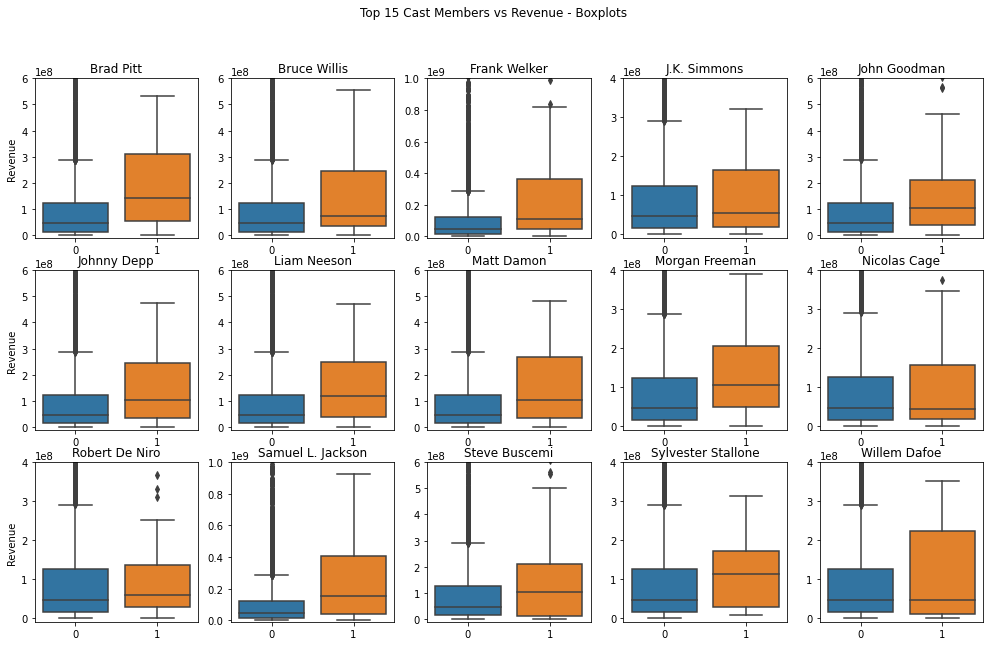

In [132]:
topcast_encoded['Revenue'] = moviedb['Revenue']

fig = plt.figure(figsize=(17,10))
bradpitt = fig.add_subplot(3,5,1)
brucewillis = fig.add_subplot(3,5,2)
frankwelker = fig.add_subplot(3,5,3)
jksimmons = fig.add_subplot(3,5,4)
johngoodman = fig.add_subplot(3,5,5)
johnnydepp = fig.add_subplot(3,5,6)
liamneeson = fig.add_subplot(3,5,7)
mattdamon = fig.add_subplot(3,5,8)
morganfreeman = fig.add_subplot(3,5,9)
nicolascage = fig.add_subplot(3,5,10)
robertdeniro = fig.add_subplot(3,5,11)
samuelljackson = fig.add_subplot(3,5,12)
stevebuscemi = fig.add_subplot(3,5,13)
sylvesterstallone = fig.add_subplot(3,5,14)
willemdafoe = fig.add_subplot(3,5,15)

sns.boxplot(x='Brad Pitt', y='Revenue', data=topcast_encoded, ax=bradpitt)
bradpitt.set_title('Brad Pitt')
bradpitt.set_xlabel('')
bradpitt.set_ylim(-10000000,600000000)

sns.boxplot(x='Bruce Willis', y='Revenue', data=topcast_encoded, ax=brucewillis)
brucewillis.set_title('Bruce Willis')
brucewillis.set_xlabel('')
brucewillis.set_ylabel('')
brucewillis.set_ylim(-10000000,600000000)

sns.boxplot(x='Frank Welker', y='Revenue', data=topcast_encoded, ax=frankwelker)
frankwelker.set_title('Frank Welker')
frankwelker.set_xlabel('')
frankwelker.set_ylabel('')
frankwelker.set_ylim(-10000000,1000000000)

sns.boxplot(x='J.K. Simmons', y='Revenue', data=topcast_encoded, ax=jksimmons)
jksimmons.set_title('J.K. Simmons')
jksimmons.set_xlabel('')
jksimmons.set_ylabel('')
jksimmons.set_ylim(-10000000,400000000)

sns.boxplot(x='John Goodman', y='Revenue', data=topcast_encoded, ax=johngoodman)
johngoodman.set_title('John Goodman')
johngoodman.set_xlabel('')
johngoodman.set_ylabel('')
johngoodman.set_ylim(-10000000,600000000)

sns.boxplot(x='Johnny Depp', y='Revenue', data=topcast_encoded, ax=johnnydepp)
johnnydepp.set_title('Johnny Depp')
johnnydepp.set_xlabel('')
johnnydepp.set_ylim(-10000000,600000000)

sns.boxplot(x='Liam Neeson', y='Revenue', data=topcast_encoded, ax=liamneeson)
liamneeson.set_title('Liam Neeson')
liamneeson.set_xlabel('')
liamneeson.set_ylabel('')
liamneeson.set_ylim(-10000000,600000000)

sns.boxplot(x='Matt Damon', y='Revenue', data=topcast_encoded, ax=mattdamon)
mattdamon.set_title('Matt Damon')
mattdamon.set_xlabel('')
mattdamon.set_ylabel('')
mattdamon.set_ylim(-10000000,600000000)

sns.boxplot(x='Morgan Freeman', y='Revenue', data=topcast_encoded, ax=morganfreeman)
morganfreeman.set_title('Morgan Freeman')
morganfreeman.set_xlabel('')
morganfreeman.set_ylabel('')
morganfreeman.set_ylim(-10000000,400000000)

sns.boxplot(x='Nicolas Cage', y='Revenue', data=topcast_encoded, ax=nicolascage)
nicolascage.set_title('Nicolas Cage')
nicolascage.set_xlabel('')
nicolascage.set_ylabel('')
nicolascage.set_ylim(-10000000,400000000)

sns.boxplot(x='Robert De Niro', y='Revenue', data=topcast_encoded, ax=robertdeniro)
robertdeniro.set_title('Robert De Niro')
robertdeniro.set_xlabel('')
robertdeniro.set_ylim(-10000000,400000000)

sns.boxplot(x='Samuel L. Jackson', y='Revenue', data=topcast_encoded, ax=samuelljackson)
samuelljackson.set_title('Samuel L. Jackson')
samuelljackson.set_xlabel('')
samuelljackson.set_ylabel('')
samuelljackson.set_ylim(-10000000,1000000000)

sns.boxplot(x='Steve Buscemi', y='Revenue', data=topcast_encoded, ax=stevebuscemi)
stevebuscemi.set_title('Steve Buscemi')
stevebuscemi.set_xlabel('')
stevebuscemi.set_ylabel('')
stevebuscemi.set_ylim(-10000000,600000000)

sns.boxplot(x='Sylvester Stallone', y='Revenue', data=topcast_encoded, ax=sylvesterstallone)
sylvesterstallone.set_title('Sylvester Stallone')
sylvesterstallone.set_xlabel('')
sylvesterstallone.set_ylabel('')
sylvesterstallone.set_ylim(-10000000,400000000)

sns.boxplot(x='Willem Dafoe', y='Revenue', data=topcast_encoded, ax=willemdafoe)
willemdafoe.set_title('Willem Dafoe')
willemdafoe.set_xlabel('')
willemdafoe.set_ylabel('')
willemdafoe.set_ylim(-10000000,400000000)

fig.suptitle('Top 15 Cast Members vs Revenue - Boxplots')
plt.show()

Some actors seem to be capable of making a difference when it comes the a movie's revenue: Samuel L. Jackson, Frank Welker, Brad Pitt... just to name a few.  
Some other actors, though, don't really play a role in deciding a movie's revenue: J.K. Simmons, Nicolas Cage, Robert De Niro, Sylvester Stallone, Willem Dafoe seem to have no, or little, explanataory value over the target. I'll drop the following actors:
* J.K. Simmons
* Nicolas Cage
* Robert De Niro
* Sylvester Stallone
* Willem Dafoe

In [133]:
topcast_encoded.drop(['J.K. Simmons', 'Nicolas Cage', 'Robert De Niro', 'Sylvester Stallone', 'Willem Dafoe', 'Revenue'],\
                     axis=1, inplace=True)
topcast_encoded.head()

Brad Pitt  Bruce Willis  Frank Welker  John Goodman  Johnny Depp  \
0          0             0             0             0            0   
1          0             0             0             0            0   
2          0             0             0             0            0   
3          0             0             0             0            0   
4          0             0             0             0            0   

   Liam Neeson  Matt Damon  Morgan Freeman  Samuel L. Jackson  Steve Buscemi  
0            0           0               0                  0              0  
1            0           0               1                  0              0  
2            0           0               0                  0              0  
3            1           0               0                  0              0  
4            0           0               0                  0              0

Top Cast members (10 actors) have been encoded and ready for modeling.  
I'll apply Polynomial Transformation on the encoded dataset to check for feature interactions.

In [134]:
# define a function
def poly_transform_dummies(order, encoded_df):
    # create a N degree polynomal object, with no bias
    pf = PolynomialFeatures(degree=order, include_bias=False)

    # fit and transform and create a new df
    encoded_df_polytransformed = pf.fit_transform(encoded_df)
    encoded_df_polytransformed = pd.DataFrame(encoded_df_polytransformed)
    
    # assign the column names to the correct attributes
    encoded_df_polytransformed.columns = pf.get_feature_names(input_features=encoded_df.columns)
    
    # eliminiate columns with all 0 values
    for col in encoded_df_polytransformed.columns:
        if encoded_df_polytransformed[col].sum() == 0:
            encoded_df_polytransformed.drop([col], axis=1, inplace=True)

    # transpose the dataset, remove duplicates (squared features and other duplicates), and transpose the dataset again 
    encoded_df_polytransformed = encoded_df_polytransformed.T
    encoded_df_polytransformed.drop_duplicates(inplace=True)
    encoded_df_polytransformed = encoded_df_polytransformed.T
    
    return encoded_df_polytransformed

In [135]:
topcast_encoded_2 = poly_transform_dummies(2, topcast_encoded)
topcast_encoded_2.shape

(4871, 35)

In [136]:
topcast_encoded_3 = poly_transform_dummies(3, topcast_encoded)
topcast_encoded_3.shape

(4871, 36)

In [137]:
topcast_encoded_3.head()

Brad Pitt  Bruce Willis  Frank Welker  John Goodman  Johnny Depp  \
0        0.0           0.0           0.0           0.0          0.0   
1        0.0           0.0           0.0           0.0          0.0   
2        0.0           0.0           0.0           0.0          0.0   
3        0.0           0.0           0.0           0.0          0.0   
4        0.0           0.0           0.0           0.0          0.0   

   Liam Neeson  Matt Damon  Morgan Freeman  Samuel L. Jackson  Steve Buscemi  \
0          0.0         0.0             0.0                0.0            0.0   
1          0.0         0.0             1.0                0.0            0.0   
2          0.0         0.0             0.0                0.0            0.0   
3          1.0         0.0             0.0                0.0            0.0   
4          0.0         0.0             0.0                0.0            0.0   

   ...  John Goodman Samuel L. Jackson  John Goodman Steve Buscemi  \
0  ...                             0.0                         0.0   
1  ...                             0.0                         0.0   
2  ...                             0.0                         0.0   
3  ...                             0.0                         0.0   
4  ...                             0.0                         0.0   

   Johnny Depp Morgan Freeman  Johnny Depp Steve Buscemi  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   Liam Neeson Morgan Freeman  Liam Neeson Samuel L. Jackson  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         0.0                            0.0   

   Liam Neeson Steve Buscemi  Matt Damon Morgan Freeman  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   Samuel L. Jackson Steve Buscemi  Frank Welker John Goodman Steve Buscemi  
0                              0.0                                      0.0  
1                              0.0                                      0.0  
2                              0.0                                      0.0  
3                              0.0                                      0.0  
4                              0.0                                      0.0  

[5 rows x 36 columns]

Now I have 3 encoded datasets, with the top cast members.  
1. First dataset -> unique features only (10 features).
2. Second dataset -> second degree feature interactions: couple of actors (35 features).
3. Third dataset -> third degree feature interactions: combination of 3 actors (36 features).

##### Crew

In [138]:
category_list('Unique_Crew', 'Crew')

100%|███████████████████████████████████████████████████████████████████████████████| 961/961 [00:01<00:00, 797.87it/s]
0it [00:01, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████| 4871/4871 [07:04<00:00, 11.47it/s]
0it [07:04, ?it/s]

Number of elements in the list, including duplicates: 4681031


In [139]:
crew_list = total_list
crew_df = value_frequency_df(crew_list, 'Crew_Member')
crew_df.head(16)

Crew_Member  Num_Movies
1      Harvey Weinstein         139
2         Bob Weinstein         135
3          Mary Vernieu         116
4         John T. Cucci         105
5         Dan O'Connell         100
6              Mo Henry          96
7          Gary Burritt          95
8           Hans Zimmer          94
9        Barbara Harris          93
10          Avy Kaufman          90
11     Francine Maisler          84
12       Deborah Aquila          83
13     Steven Spielberg          83
14          Hans Bjerno          81
15  James Newton Howard          79
16      Nerses Gezalyan          76

I select only the top 15 crew members, per number of movies.  
I'll add now, in the moviedb dataset, a new column with the top 15 crew members only.

In [140]:
top_value_column(crew_df, threshold=79, new_column='Top_Crew', column_1='Unique_Crew', column_2='Crew_Member')
moviedb.head(5)

Title                    Genres  \
0  Dilwale Dulhania Le Jayenge  Comedy | Drama | Romance   
1     The Shawshank Redemption             Crime | Drama   
2                The Godfather             Crime | Drama   
3             Schindler's List     Drama | History | War   
4       The Godfather: Part II             Crime | Drama   

                                                Cast  \
0  Shah Rukh Khan | Kajol | Amrish Puri | Anupam ...   
1  Tim Robbins | Morgan Freeman | Bob Gunton | Cl...   
2  Marlon Brando | Al Pacino | James Caan | Richa...   
3  Liam Neeson | Ben Kingsley | Ralph Fiennes | C...   
4  Al Pacino | Robert Duvall | Diane Keaton | Rob...   

                                                Crew Collection  \
0  Farah Khan | Yash Chopra | Aditya Chopra | Adi...      False   
1  Thomas Newman | Thomas Newman | Roger Deakins ...      False   
2  Francis Ford Coppola | Francis Ford Coppola | ...       True   
3  John Williams | Steven Spielberg | Steven Spie...      False   
4  Walter Murch | Walter Murch | Francis Ford Cop...       True   

  English_Language                       Languages_Spoken  Runtime  \
0            False                                 हिन्दी    190.0   
1             True                                English    142.0   
2             True             English | Italiano | Latin    175.0   
3             True  Deutsch | Polski | עִבְרִית | English    195.0   
4             True   English | Italiano | Latin | Español    202.0   

                        Production_Companies         Country_of_Origin  ...  \
0                             Yash Raj Films                     India  ...   
1                  Castle Rock Entertainment  United States of America  ...   
2             Paramount | Alfran Productions  United States of America  ...   
3  Universal Pictures | Amblin Entertainment  United States of America  ...   
4            Paramount | The Coppola Company  United States of America  ...   

   Quarter  Weekday  Weekend      Revenue  Budget*Runtime  Budget/Runtime  \
0        4   Friday        1  100000000.0    2.508000e+09    69473.684211   
1        3   Friday        1   28341469.0    3.550000e+09   176056.338028   
2        1  Tuesday        0  245066411.0    1.050000e+09    34285.714286   
3        4  Tuesday        0  321365567.0    4.290000e+09   112820.512821   
4        4   Friday        1  102600000.0    2.626000e+09    64356.435644   

                                         Unique_Cast        Top_Cast  \
0  Govind Khatri , Arjun Sablok , Pooja Ruparel ,...                   
1  Robert Haley , Neil Summers , Tim Robbins , Al...  Morgan Freeman   
2  Sterling Hayden , Abe Vigoda , Talia Shire , R...                   
3  Thomas Morris , Wolfgang Seidenberg , Michael ...     Liam Neeson   
4  Maria Carta , Joe De Nicola , Talia Shire , Ga...  Robert De Niro   

                                         Unique_Crew  \
0  Lalit Pandit , Jatin Pandit , Ajay Trivedi , K...   
1  Lori Martino , Brian Boggs , Blair Gibeau , Ro...   
2  Joe Lombardi , Valerio De Paolis , Robert Ward...   
3  Nada Pinter , Mauro Fiore , Fritz Fleischhacke...   
4  Burt Bluestein , Alan Hopkins , George R. Nels...   

                         Top_Crew  
0                                  
1  Barbara Harris, Deborah Aquila  
2                                  
3                Steven Spielberg  
4                                  

[5 rows x 22 columns]

In [141]:
moviedb.tail()

Title  \
4866  The End of the Affair   
4867            Killing Zoe   
4868     Invaders from Mars   
4869      Jumping the Broom   
4870                Smashed   

                                                 Genres  \
4866                                              Drama   
4867                  Action | Crime | Drama | Thriller   
4868  Adventure | Horror | Mystery | Science Fiction...   
4869                                             Comedy   
4870                                     Comedy | Drama   

                                                   Cast  \
4866  Ralph Fiennes | Stephen Rea | Julianne Moore |...   
4867  Eric Stoltz | Julie Delpy | Jean-Hugues Anglad...   
4868  Hunter Carson | Karen Black | Timothy Bottoms ...   
4869  Paula Patton | Julie Bowen | Meagan Good | Mik...   
4870  Mary Elizabeth Winstead | Aaron Paul | Octavia...   

                                                   Crew Collection  \
4866  Roger Pratt | Susie Figgis | Stephen Woolley |...      False   
4867  Quentin Tarantino | David Wasco | Roger Avary ...      False   
4868  Dan O'Bannon | Leslie Dilley | Dana Lyman | Da...      False   
4869  Tracey Edmonds | Arlene Gibbs | Elizabeth Hunt...      False   
4870  Avy Kaufman | Kim Coleman | Andrea Sperling | ...      False   

     English_Language    Languages_Spoken  Runtime  \
4866             True             English    102.0   
4867             True  English | Français     96.0   
4868             True             English    100.0   
4869             True             English    112.0   
4870             True             English     85.0   

                                   Production_Companies  \
4866                                  Columbia Pictures   
4867                                 Live Entertainment   
4868            Cannon Group | Golan-Globus Productions   
4869  Sony Pictures | TriStar Pictures | Stage 6 Fil...   
4870                         Super Crispy Entertainment   

                              Country_of_Origin  ...  Quarter    Weekday  \
4866  United States of America | United Kingdom  ...        4     Friday   
4867          France | United States of America  ...        4     Friday   
4868                   United States of America  ...        1  Wednesday   
4869                   United States of America  ...        2     Friday   
4870                   United States of America  ...        3  Wednesday   

      Weekend     Revenue  Budget*Runtime  Budget/Runtime  \
4866        1  10827816.0    2.346000e+09   225490.196078   
4867        1    418961.0    1.440000e+08    15625.000000   
4868        0   4884663.0    1.200000e+09   120000.000000   
4869        1  37710610.0    7.392000e+08    58928.571429   
4870        0    376597.0    4.250000e+07     5882.352941   

                                            Unique_Cast  Top_Cast  \
4866  Julianne Moore , Cyril Shaps , Simon Turner , ...             
4867  Tai Thai , Eric Pascal Chaltiel , Jean-Hugues ...             
4868  Kenneth Kimmins , Mark Giardino , Debbie Lee C...             
4869  Tasha Smith , DeRay Davis , Mike Epps , Paula ...             
4870  Megan Mullally , Aaron Paul , Patti Allison , ...             

                                            Unique_Crew     Top_Crew  
4866  Chris Seagers , Susie Figgis , Michael Nyman ,...               
4867  Roger Avary , Samuel Hadida , Tom Savini , Kat...               
4868  Iya Labunka , Ron Bartlett , Dan O'Bannon , Li...               
4869  Arlene Gibbs , T.D. Jakes , Tracey Edmonds , E...               
4870  Zygi Wilf , Andrea Sperling , Jonathan Schwart...  Avy Kaufman  

[5 rows x 22 columns]

I'll proceed now by performing one-hot encoding (a nominal kind of encoding) on the top (most frequent) crew members.

In [142]:
# One Hot Encoding
topcrew_encoded = moviedb['Top_Crew'].str.get_dummies(sep=', ')
topcrew_encoded.head()

Avy Kaufman  Barbara Harris  Bob Weinstein  Dan O'Connell  Deborah Aquila  \
0            0               0              0              0               0   
1            0               1              0              0               1   
2            0               0              0              0               0   
3            0               0              0              0               0   
4            0               0              0              0               0   

   Francine Maisler  Gary Burritt  Hans Bjerno  Hans Zimmer  Harvey Weinstein  \
0                 0             0            0            0                 0   
1                 0             0            0            0                 0   
2                 0             0            0            0                 0   
3                 0             0            0            0                 0   
4                 0             0            0            0                 0   

   James Newton Howard  John T. Cucci  Mary Vernieu  Mo Henry  \
0                    0              0             0         0   
1                    0              0             0         0   
2                    0              0             0         0   
3                    0              0             0         0   
4                    0              0             0         0   

   Steven Spielberg  
0                 0  
1                 0  
2                 0  
3                 1  
4                 0

Let's check for correlations between the top 15 crew members and the revenue (I'll focus on the non-outlier region).

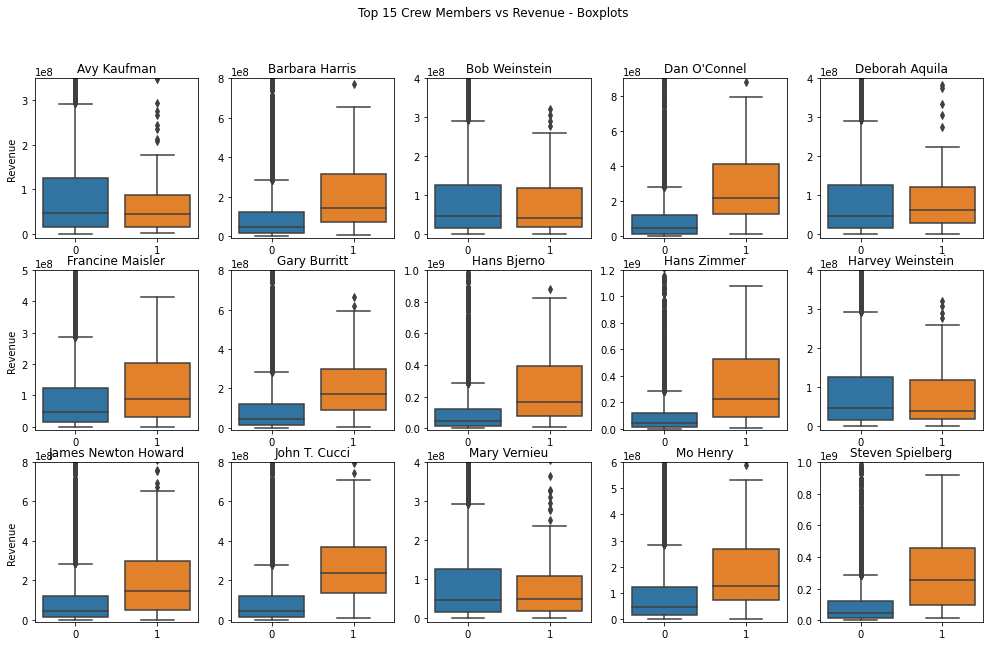

In [143]:
topcrew_encoded['Revenue'] = moviedb['Revenue']

fig = plt.figure(figsize=(17,10))
avykaufman = fig.add_subplot(3,5,1)
barbaraharris = fig.add_subplot(3,5,2)
bobweinstein = fig.add_subplot(3,5,3)
danoconnel = fig.add_subplot(3,5,4)
deborahaquila = fig.add_subplot(3,5,5)
francinemaisler = fig.add_subplot(3,5,6)
garyburritt = fig.add_subplot(3,5,7)
hansbjerno = fig.add_subplot(3,5,8)
hanszimmer = fig.add_subplot(3,5,9)
harveyweinstein = fig.add_subplot(3,5,10)
jamesnewtonhoward = fig.add_subplot(3,5,11)
johntcucci = fig.add_subplot(3,5,12)
maryvernieu = fig.add_subplot(3,5,13)
mohenry = fig.add_subplot(3,5,14)
stevenspielberg = fig.add_subplot(3,5,15)

sns.boxplot(x='Avy Kaufman', y='Revenue', data=topcrew_encoded, ax=avykaufman)
avykaufman.set_title('Avy Kaufman')
avykaufman.set_xlabel('')
avykaufman.set_ylim(-10000000,350000000)

sns.boxplot(x='Barbara Harris', y='Revenue', data=topcrew_encoded, ax=barbaraharris)
barbaraharris.set_title('Barbara Harris')
barbaraharris.set_xlabel('')
barbaraharris.set_ylabel('')
barbaraharris.set_ylim(-10000000,800000000)

sns.boxplot(x='Bob Weinstein', y='Revenue', data=topcrew_encoded, ax=bobweinstein)
bobweinstein.set_title('Bob Weinstein')
bobweinstein.set_xlabel('')
bobweinstein.set_ylabel('')
bobweinstein.set_ylim(-10000000,400000000)

sns.boxplot(x="Dan O'Connell", y='Revenue', data=topcrew_encoded, ax=danoconnel)
danoconnel.set_title('Dan O\'Connel')
danoconnel.set_xlabel('')
danoconnel.set_ylabel('')
danoconnel.set_ylim(-10000000,900000000)

sns.boxplot(x='Deborah Aquila', y='Revenue', data=topcrew_encoded, ax=deborahaquila)
deborahaquila.set_title('Deborah Aquila')
deborahaquila.set_xlabel('')
deborahaquila.set_ylabel('')
deborahaquila.set_ylim(-10000000,400000000)

sns.boxplot(x='Francine Maisler', y='Revenue', data=topcrew_encoded, ax=francinemaisler)
francinemaisler.set_title('Francine Maisler')
francinemaisler.set_xlabel('')
francinemaisler.set_ylim(-10000000,500000000)

sns.boxplot(x='Gary Burritt', y='Revenue', data=topcrew_encoded, ax=garyburritt)
garyburritt.set_title('Gary Burritt')
garyburritt.set_xlabel('')
garyburritt.set_ylabel('')
garyburritt.set_ylim(-10000000,800000000)

sns.boxplot(x='Hans Bjerno', y='Revenue', data=topcrew_encoded, ax=hansbjerno)
hansbjerno.set_title('Hans Bjerno')
hansbjerno.set_xlabel('')
hansbjerno.set_ylabel('')
hansbjerno.set_ylim(-10000000,1000000000)

sns.boxplot(x='Hans Zimmer', y='Revenue', data=topcrew_encoded, ax=hanszimmer)
hanszimmer.set_title('Hans Zimmer')
hanszimmer.set_xlabel('')
hanszimmer.set_ylabel('')
hanszimmer.set_ylim(-10000000,1200000000)

sns.boxplot(x='Harvey Weinstein', y='Revenue', data=topcrew_encoded, ax=harveyweinstein)
harveyweinstein.set_title('Harvey Weinstein')
harveyweinstein.set_xlabel('')
harveyweinstein.set_ylabel('')
harveyweinstein.set_ylim(-10000000,400000000)

sns.boxplot(x='James Newton Howard', y='Revenue', data=topcrew_encoded, ax=jamesnewtonhoward)
jamesnewtonhoward.set_title('James Newton Howard')
jamesnewtonhoward.set_xlabel('')
jamesnewtonhoward.set_ylim(-10000000,800000000)

sns.boxplot(x='John T. Cucci', y='Revenue', data=topcrew_encoded, ax=johntcucci)
johntcucci.set_title('John T. Cucci')
johntcucci.set_xlabel('')
johntcucci.set_ylabel('')
johntcucci.set_ylim(-10000000,800000000)

sns.boxplot(x='Mary Vernieu', y='Revenue', data=topcrew_encoded, ax=maryvernieu)
maryvernieu.set_title('Mary Vernieu')
maryvernieu.set_xlabel('')
maryvernieu.set_ylabel('')
maryvernieu.set_ylim(-10000000,400000000)

sns.boxplot(x='Mo Henry', y='Revenue', data=topcrew_encoded, ax=mohenry)
mohenry.set_title('Mo Henry')
mohenry.set_xlabel('')
mohenry.set_ylabel('')
mohenry.set_ylim(-10000000,600000000)

sns.boxplot(x='Steven Spielberg', y='Revenue', data=topcrew_encoded, ax=stevenspielberg)
stevenspielberg.set_title('Steven Spielberg')
stevenspielberg.set_xlabel('')
stevenspielberg.set_ylabel('')
stevenspielberg.set_ylim(-10000000,1000000000)

fig.suptitle('Top 15 Crew Members vs Revenue - Boxplots')
plt.show()

Some crew members (and directors) seem to be capable of making a difference when it comes to a movie's revenue: Steven Spielberg, Dan O' Connel, John T. Cucci... just to name a few.  
Some other crew members, though, don't really play a role in deciding a movie's revenue: Avy Kaufman, the Weinstein brothers, Deborah Aquila, and Mary Vernieu seem to have no, or little, explanataory value over the target. I'll drop the following crew members:
* Avy Kaufman
* Bob Weinstein
* Harvey Weinstein
* Deborah Aquila
* Mary Vernieu

In [144]:
topcrew_encoded.drop(['Avy Kaufman', 'Bob Weinstein', 'Harvey Weinstein', 'Deborah Aquila', 'Mary Vernieu', 'Revenue'],\
                     axis=1, inplace=True)
topcrew_encoded.head()

Barbara Harris  Dan O'Connell  Francine Maisler  Gary Burritt  Hans Bjerno  \
0               0              0                 0             0            0   
1               1              0                 0             0            0   
2               0              0                 0             0            0   
3               0              0                 0             0            0   
4               0              0                 0             0            0   

   Hans Zimmer  James Newton Howard  John T. Cucci  Mo Henry  Steven Spielberg  
0            0                    0              0         0                 0  
1            0                    0              0         0                 0  
2            0                    0              0         0                 0  
3            0                    0              0         0                 1  
4            0                    0              0         0                 0

Top Crew members (10 movie professionals) have been encoded and ready for modeling.  
I'll apply Polynomial Transformation on the encoded dataset to check for feature interactions.

In [145]:
topcrew_encoded_2 = poly_transform_dummies(2, topcrew_encoded)
topcrew_encoded_2.shape

(4871, 50)

In [146]:
topcrew_encoded_2.head()

Barbara Harris  Dan O'Connell  Francine Maisler  Gary Burritt  Hans Bjerno  \
0             0.0            0.0               0.0           0.0          0.0   
1             1.0            0.0               0.0           0.0          0.0   
2             0.0            0.0               0.0           0.0          0.0   
3             0.0            0.0               0.0           0.0          0.0   
4             0.0            0.0               0.0           0.0          0.0   

   Hans Zimmer  James Newton Howard  John T. Cucci  Mo Henry  \
0          0.0                  0.0            0.0       0.0   
1          0.0                  0.0            0.0       0.0   
2          0.0                  0.0            0.0       0.0   
3          0.0                  0.0            0.0       0.0   
4          0.0                  0.0            0.0       0.0   

   Steven Spielberg  ...  Hans Bjerno John T. Cucci  Hans Bjerno Mo Henry  \
0               0.0  ...                        0.0                   0.0   
1               0.0  ...                        0.0                   0.0   
2               0.0  ...                        0.0                   0.0   
3               1.0  ...                        0.0                   0.0   
4               0.0  ...                        0.0                   0.0   

   Hans Zimmer James Newton Howard  Hans Zimmer John T. Cucci  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              0.0                        0.0   
4                              0.0                        0.0   

   Hans Zimmer Mo Henry  Hans Zimmer Steven Spielberg  \
0                   0.0                           0.0   
1                   0.0                           0.0   
2                   0.0                           0.0   
3                   0.0                           0.0   
4                   0.0                           0.0   

   James Newton Howard John T. Cucci  James Newton Howard Mo Henry  \
0                                0.0                           0.0   
1                                0.0                           0.0   
2                                0.0                           0.0   
3                                0.0                           0.0   
4                                0.0                           0.0   

   John T. Cucci Mo Henry  Mo Henry Steven Spielberg  
0                     0.0                        0.0  
1                     0.0                        0.0  
2                     0.0                        0.0  
3                     0.0                        0.0  
4                     0.0                        0.0  

[5 rows x 50 columns]

In [147]:
topcrew_encoded_3 = poly_transform_dummies(3, topcrew_encoded)
topcrew_encoded_3.shape

(4871, 74)

In [148]:
topcrew_encoded_3.head()

Barbara Harris  Dan O'Connell  Francine Maisler  Gary Burritt  Hans Bjerno  \
0             0.0            0.0               0.0           0.0          0.0   
1             1.0            0.0               0.0           0.0          0.0   
2             0.0            0.0               0.0           0.0          0.0   
3             0.0            0.0               0.0           0.0          0.0   
4             0.0            0.0               0.0           0.0          0.0   

   Hans Zimmer  James Newton Howard  John T. Cucci  Mo Henry  \
0          0.0                  0.0            0.0       0.0   
1          0.0                  0.0            0.0       0.0   
2          0.0                  0.0            0.0       0.0   
3          0.0                  0.0            0.0       0.0   
4          0.0                  0.0            0.0       0.0   

   Steven Spielberg  ...  Dan O'Connell Hans Bjerno James Newton Howard  \
0               0.0  ...                                            0.0   
1               0.0  ...                                            0.0   
2               0.0  ...                                            0.0   
3               1.0  ...                                            0.0   
4               0.0  ...                                            0.0   

   Dan O'Connell James Newton Howard John T. Cucci  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   Francine Maisler Hans Bjerno Mo Henry  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Francine Maisler Hans Zimmer Mo Henry  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Francine Maisler James Newton Howard Mo Henry  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   Hans Bjerno Hans Zimmer James Newton Howard  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   Hans Bjerno Hans Zimmer Mo Henry  \
0                               0.0   
1                               0.0   
2                               0.0   
3                               0.0   
4                               0.0   

   Hans Bjerno James Newton Howard John T. Cucci  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   Hans Bjerno James Newton Howard Mo Henry  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Hans Zimmer John T. Cucci Mo Henry  
0                                 0.0  
1                                 0.0  
2                                 0.0  
3                                 0.0  
4                                 0.0  

[5 rows x 74 columns]

Now I have 3 encoded datasets, with the top crew members.  
1. First dataset -> unique features only (10 features)
2. Second dataset -> second degree feature interactions: combination of 2 crew members (50 features).
3. Third dataset -> third degree feature interactions: combination of 3 crew members (74 features).

##### Production_Companies

In [149]:
category_list('Unique_Production_Companies', 'Production_Companies')

100%|█████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 722.08it/s]
0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 4871/4871 [00:11<00:00, 422.20it/s]
0it [00:11, ?it/s]

Number of elements in the list, including duplicates: 126646


In [150]:
companies_list = total_list
companies_df = value_frequency_df(companies_list, 'Production_Companies')
companies_df.head(20)

Production_Companies  Num_Movies
1       Warner Bros. Pictures         442
2          Universal Pictures         426
3                   Paramount         342
4           Columbia Pictures         327
5            20th Century Fox         316
6             New Line Cinema         181
7        Walt Disney Pictures         164
8         Metro-Goldwyn-Mayer         142
9               Sony Pictures         128
10           Relativity Media         118
11        Touchstone Pictures         114
12                     Canal+         111
13        DreamWorks Pictures         105
14             United Artists          97
15                    Miramax          92
16  Village Roadshow Pictures          90
17                  Lionsgate          84
18        Regency Enterprises          79
19           TriStar Pictures          79
20                StudioCanal          76

I set a threshold at 90 movies: I'll keep only the Production Companies who have produced at least 90 movies, that is the first 16 production companies the dataframe.  
I'll add now, in the moviedb dataset, a new column with the top 16 Production Companies only.

In [151]:
top_value_column(companies_df, threshold=90, new_column='Top_Production_Companies', column_1='Unique_Production_Companies',\
                 column_2='Production_Companies')
moviedb.head(5)

Title                    Genres  \
0  Dilwale Dulhania Le Jayenge  Comedy | Drama | Romance   
1     The Shawshank Redemption             Crime | Drama   
2                The Godfather             Crime | Drama   
3             Schindler's List     Drama | History | War   
4       The Godfather: Part II             Crime | Drama   

                                                Cast  \
0  Shah Rukh Khan | Kajol | Amrish Puri | Anupam ...   
1  Tim Robbins | Morgan Freeman | Bob Gunton | Cl...   
2  Marlon Brando | Al Pacino | James Caan | Richa...   
3  Liam Neeson | Ben Kingsley | Ralph Fiennes | C...   
4  Al Pacino | Robert Duvall | Diane Keaton | Rob...   

                                                Crew Collection  \
0  Farah Khan | Yash Chopra | Aditya Chopra | Adi...      False   
1  Thomas Newman | Thomas Newman | Roger Deakins ...      False   
2  Francis Ford Coppola | Francis Ford Coppola | ...       True   
3  John Williams | Steven Spielberg | Steven Spie...      False   
4  Walter Murch | Walter Murch | Francis Ford Cop...       True   

  English_Language                       Languages_Spoken  Runtime  \
0            False                                 हिन्दी    190.0   
1             True                                English    142.0   
2             True             English | Italiano | Latin    175.0   
3             True  Deutsch | Polski | עִבְרִית | English    195.0   
4             True   English | Italiano | Latin | Español    202.0   

                        Production_Companies         Country_of_Origin  ...  \
0                             Yash Raj Films                     India  ...   
1                  Castle Rock Entertainment  United States of America  ...   
2             Paramount | Alfran Productions  United States of America  ...   
3  Universal Pictures | Amblin Entertainment  United States of America  ...   
4            Paramount | The Coppola Company  United States of America  ...   

   Weekend      Revenue  Budget*Runtime Budget/Runtime  \
0        1  100000000.0    2.508000e+09   69473.684211   
1        1   28341469.0    3.550000e+09  176056.338028   
2        0  245066411.0    1.050000e+09   34285.714286   
3        0  321365567.0    4.290000e+09  112820.512821   
4        1  102600000.0    2.626000e+09   64356.435644   

                                         Unique_Cast        Top_Cast  \
0  Govind Khatri , Arjun Sablok , Pooja Ruparel ,...                   
1  Robert Haley , Neil Summers , Tim Robbins , Al...  Morgan Freeman   
2  Sterling Hayden , Abe Vigoda , Talia Shire , R...                   
3  Thomas Morris , Wolfgang Seidenberg , Michael ...     Liam Neeson   
4  Maria Carta , Joe De Nicola , Talia Shire , Ga...  Robert De Niro   

                                         Unique_Crew  \
0  Lalit Pandit , Jatin Pandit , Ajay Trivedi , K...   
1  Lori Martino , Brian Boggs , Blair Gibeau , Ro...   
2  Joe Lombardi , Valerio De Paolis , Robert Ward...   
3  Nada Pinter , Mauro Fiore , Fritz Fleischhacke...   
4  Burt Bluestein , Alan Hopkins , George R. Nels...   

                         Top_Crew                Unique_Production_Companies  \
0                                                             Yash Raj Films   
1  Barbara Harris, Deborah Aquila                  Castle Rock Entertainment   
2                                             Paramount , Alfran Productions   
3                Steven Spielberg  Universal Pictures , Amblin Entertainment   
4                                            The Coppola Company , Paramount   

  Top_Production_Companies  
0                           
1                           
2                Paramount  
3       Universal Pictures  
4                Paramount  

[5 rows x 24 columns]

In [152]:
moviedb.tail()

Title  \
4866  The End of the Affair   
4867            Killing Zoe   
4868     Invaders from Mars   
4869      Jumping the Broom   
4870                Smashed   

                                                 Genres  \
4866                                              Drama   
4867                  Action | Crime | Drama | Thriller   
4868  Adventure | Horror | Mystery | Science Fiction...   
4869                                             Comedy   
4870                                     Comedy | Drama   

                                                   Cast  \
4866  Ralph Fiennes | Stephen Rea | Julianne Moore |...   
4867  Eric Stoltz | Julie Delpy | Jean-Hugues Anglad...   
4868  Hunter Carson | Karen Black | Timothy Bottoms ...   
4869  Paula Patton | Julie Bowen | Meagan Good | Mik...   
4870  Mary Elizabeth Winstead | Aaron Paul | Octavia...   

                                                   Crew Collection  \
4866  Roger Pratt | Susie Figgis | Stephen Woolley |...      False   
4867  Quentin Tarantino | David Wasco | Roger Avary ...      False   
4868  Dan O'Bannon | Leslie Dilley | Dana Lyman | Da...      False   
4869  Tracey Edmonds | Arlene Gibbs | Elizabeth Hunt...      False   
4870  Avy Kaufman | Kim Coleman | Andrea Sperling | ...      False   

     English_Language    Languages_Spoken  Runtime  \
4866             True             English    102.0   
4867             True  English | Français     96.0   
4868             True             English    100.0   
4869             True             English    112.0   
4870             True             English     85.0   

                                   Production_Companies  \
4866                                  Columbia Pictures   
4867                                 Live Entertainment   
4868            Cannon Group | Golan-Globus Productions   
4869  Sony Pictures | TriStar Pictures | Stage 6 Fil...   
4870                         Super Crispy Entertainment   

                              Country_of_Origin  ...  Weekend     Revenue  \
4866  United States of America | United Kingdom  ...        1  10827816.0   
4867          France | United States of America  ...        1    418961.0   
4868                   United States of America  ...        0   4884663.0   
4869                   United States of America  ...        1  37710610.0   
4870                   United States of America  ...        0    376597.0   

      Budget*Runtime Budget/Runtime  \
4866    2.346000e+09  225490.196078   
4867    1.440000e+08   15625.000000   
4868    1.200000e+09  120000.000000   
4869    7.392000e+08   58928.571429   
4870    4.250000e+07    5882.352941   

                                            Unique_Cast  Top_Cast  \
4866  Julianne Moore , Cyril Shaps , Simon Turner , ...             
4867  Tai Thai , Eric Pascal Chaltiel , Jean-Hugues ...             
4868  Kenneth Kimmins , Mark Giardino , Debbie Lee C...             
4869  Tasha Smith , DeRay Davis , Mike Epps , Paula ...             
4870  Megan Mullally , Aaron Paul , Patti Allison , ...             

                                            Unique_Crew     Top_Crew  \
4866  Chris Seagers , Susie Figgis , Michael Nyman ,...                
4867  Roger Avary , Samuel Hadida , Tom Savini , Kat...                
4868  Iya Labunka , Ron Bartlett , Dan O'Bannon , Li...                
4869  Arlene Gibbs , T.D. Jakes , Tracey Edmonds , E...                
4870  Zygi Wilf , Andrea Sperling , Jonathan Schwart...  Avy Kaufman   

                            Unique_Production_Companies  \
4866                                  Columbia Pictures   
4867                                 Live Entertainment   
4868            Golan-Globus Productions , Cannon Group   
4869  TriStar Pictures , Our Stories Films , Stage 6...   
4870                         Super Crispy Entertainment   

     Top_Production_Companies  
4866        Columbia Pictures  
4867                           
4868                       

I'll proceed now by performing one-hot encoding (a nominal kind of encoding) on the top (most frequent) production companies.

In [153]:
# One Hot Encoding
topproducers_encoded = moviedb['Top_Production_Companies'].str.get_dummies(sep=', ')
topproducers_encoded.head()

20th Century Fox  Canal+  Columbia Pictures  DreamWorks Pictures  \
0                 0       0                  0                    0   
1                 0       0                  0                    0   
2                 0       0                  0                    0   
3                 0       0                  0                    0   
4                 0       0                  0                    0   

   Metro-Goldwyn-Mayer  Miramax  New Line Cinema  Paramount  Relativity Media  \
0                    0        0                0          0                 0   
1                    0        0                0          0                 0   
2                    0        0                0          1                 0   
3                    0        0                0          0                 0   
4                    0        0                0          1                 0   

   Sony Pictures  Touchstone Pictures  United Artists  Universal Pictures  \
0              0                    0               0                   0   
1              0                    0               0                   0   
2              0                    0               0                   0   
3              0                    0               0                   1   
4              0                    0               0                   0   

   Village Roadshow Pictures  Walt Disney Pictures  Warner Bros. Pictures  
0                          0                     0                      0  
1                          0                     0                      0  
2                          0                     0                      0  
3                          0                     0                      0  
4                          0                     0                      0

Let's check for correlations between the top 16 Production Companies and the revenue (I'll focus on the non-outlier region).

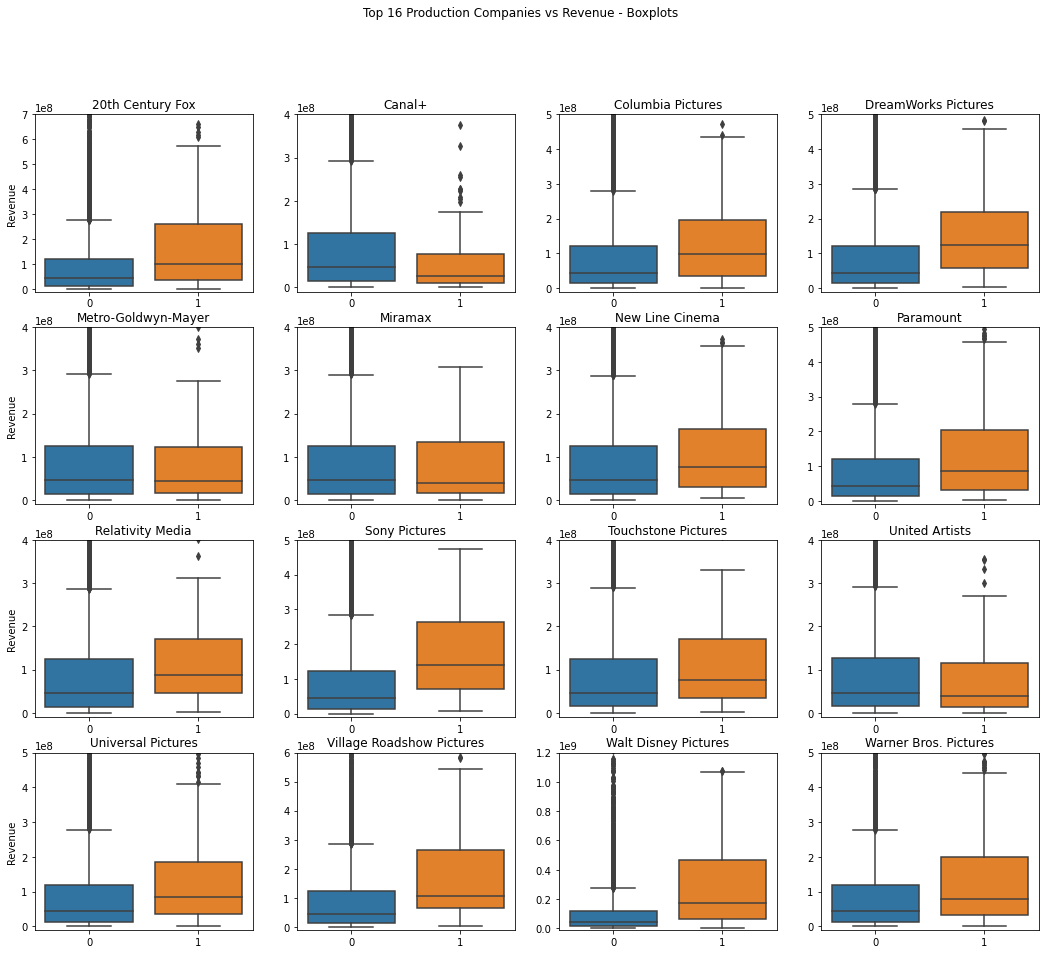

In [154]:
topproducers_encoded['Revenue'] = moviedb['Revenue']

fig = plt.figure(figsize=(18,15))
centuryfox = fig.add_subplot(4,4,1)
canalplus = fig.add_subplot(4,4,2)
columbia = fig.add_subplot(4,4,3)
dreamworks = fig.add_subplot(4,4,4)
metrogoldwynmayer = fig.add_subplot(4,4,5)
miramax = fig.add_subplot(4,4,6)
newlinecinema = fig.add_subplot(4,4,7)
paramount = fig.add_subplot(4,4,8)
relativitymedia = fig.add_subplot(4,4,9)
sony = fig.add_subplot(4,4,10)
touchstone = fig.add_subplot(4,4,11)
unitedartists = fig.add_subplot(4,4,12)
universal = fig.add_subplot(4,4,13)
villageroadshow = fig.add_subplot(4,4,14)
waltdisney = fig.add_subplot(4,4,15)
warnerbros = fig.add_subplot(4,4,16)

sns.boxplot(x='20th Century Fox', y='Revenue', data=topproducers_encoded, ax=centuryfox)
centuryfox.set_title('20th Century Fox')
centuryfox.set_xlabel('')
centuryfox.set_ylim(-10000000,700000000)

sns.boxplot(x='Canal+', y='Revenue', data=topproducers_encoded, ax=canalplus)
canalplus.set_title('Canal+')
canalplus.set_xlabel('')
canalplus.set_ylabel('')
canalplus.set_ylim(-10000000,400000000)

sns.boxplot(x='Columbia Pictures', y='Revenue', data=topproducers_encoded, ax=columbia)
columbia.set_title('Columbia Pictures')
columbia.set_xlabel('')
columbia.set_ylabel('')
columbia.set_ylim(-10000000,500000000)

sns.boxplot(x="DreamWorks Pictures", y='Revenue', data=topproducers_encoded, ax=dreamworks)
dreamworks.set_title('DreamWorks Pictures')
dreamworks.set_xlabel('')
dreamworks.set_ylabel('')
dreamworks.set_ylim(-10000000,500000000)

sns.boxplot(x='Metro-Goldwyn-Mayer', y='Revenue', data=topproducers_encoded, ax=metrogoldwynmayer)
metrogoldwynmayer.set_title('Metro-Goldwyn-Mayer')
metrogoldwynmayer.set_xlabel('')
metrogoldwynmayer.set_ylabel('Revenue')
metrogoldwynmayer.set_ylim(-10000000,400000000)

sns.boxplot(x='Miramax', y='Revenue', data=topproducers_encoded, ax=miramax)
miramax.set_title('Miramax')
miramax.set_xlabel('')
miramax.set_ylabel('')
miramax.set_ylim(-10000000,400000000)

sns.boxplot(x='New Line Cinema', y='Revenue', data=topproducers_encoded, ax=newlinecinema)
newlinecinema.set_title('New Line Cinema')
newlinecinema.set_xlabel('')
newlinecinema.set_ylabel('')
newlinecinema.set_ylim(-10000000,400000000)

sns.boxplot(x='Paramount', y='Revenue', data=topproducers_encoded, ax=paramount)
paramount.set_title('Paramount')
paramount.set_xlabel('')
paramount.set_ylabel('')
paramount.set_ylim(-10000000,500000000)

sns.boxplot(x='Relativity Media', y='Revenue', data=topproducers_encoded, ax=relativitymedia)
relativitymedia.set_title('Relativity Media')
relativitymedia.set_xlabel('')
relativitymedia.set_ylabel('Revenue')
relativitymedia.set_ylim(-10000000,400000000)

sns.boxplot(x='Sony Pictures', y='Revenue', data=topproducers_encoded, ax=sony)
sony.set_title('Sony Pictures')
sony.set_xlabel('')
sony.set_ylabel('')
sony.set_ylim(-10000000,500000000)

sns.boxplot(x='Touchstone Pictures', y='Revenue', data=topproducers_encoded, ax=touchstone)
touchstone.set_title('Touchstone Pictures')
touchstone.set_xlabel('')
touchstone.set_ylabel('')
touchstone.set_ylim(-10000000,400000000)

sns.boxplot(x='United Artists', y='Revenue', data=topproducers_encoded, ax=unitedartists)
unitedartists.set_title('United Artists')
unitedartists.set_xlabel('')
unitedartists.set_ylabel('')
unitedartists.set_ylim(-10000000,400000000)

sns.boxplot(x='Universal Pictures', y='Revenue', data=topproducers_encoded, ax=universal)
universal.set_title('Universal Pictures')
universal.set_xlabel('')
universal.set_ylabel('Revenue')
universal.set_ylim(-10000000,500000000)

sns.boxplot(x='Village Roadshow Pictures', y='Revenue', data=topproducers_encoded, ax=villageroadshow)
villageroadshow.set_title('Village Roadshow Pictures')
villageroadshow.set_xlabel('')
villageroadshow.set_ylabel('')
villageroadshow.set_ylim(-10000000,600000000)

sns.boxplot(x='Walt Disney Pictures', y='Revenue', data=topproducers_encoded, ax=waltdisney)
waltdisney.set_title('Walt Disney Pictures')
waltdisney.set_xlabel('')
waltdisney.set_ylabel('')
waltdisney.set_ylim(-10000000,1200000000)

sns.boxplot(x='Warner Bros. Pictures', y='Revenue', data=topproducers_encoded, ax=warnerbros)
warnerbros.set_title('Warner Bros. Pictures')
warnerbros.set_xlabel('')
warnerbros.set_ylabel('')
warnerbros.set_ylim(-10000000,500000000)

fig.suptitle('Top 16 Production Companies vs Revenue - Boxplots')
plt.show()

Again, some Production Companies seem to be better predictors for movie revenue: Walt Disney Pictures, 20th Century Fox, Village Roadshow Pictures... to name a few.  
Some other Production Companies, though, look like they can't really play a role in predicting a movie's revenue: Miramax, New Line Cinema, United Artists... seem to have no, or little, explanataory value over the target.  
I'll drop the following Production Companies:
* Metro-Goldwin-Mayer
* Miramax
* New Line Cinema
* Relativity Media
* Touchstone Pictures
* United Artists

In [155]:
topproducers_encoded.drop(['Metro-Goldwyn-Mayer', 'Miramax', 'New Line Cinema', 'Relativity Media', 'Touchstone Pictures',\
                           'United Artists', 'Revenue'], axis=1, inplace=True)
topproducers_encoded.head()

20th Century Fox  Canal+  Columbia Pictures  DreamWorks Pictures  \
0                 0       0                  0                    0   
1                 0       0                  0                    0   
2                 0       0                  0                    0   
3                 0       0                  0                    0   
4                 0       0                  0                    0   

   Paramount  Sony Pictures  Universal Pictures  Village Roadshow Pictures  \
0          0              0                   0                          0   
1          0              0                   0                          0   
2          1              0                   0                          0   
3          0              0                   1                          0   
4          1              0                   0                          0   

   Walt Disney Pictures  Warner Bros. Pictures  
0                     0                      0  
1                     0                      0  
2                     0                      0  
3                     0                      0  
4                     0                      0

Top Production Companies (10) have been encoded and ready for modeling.  
I'll apply Polynomial Transformation on the encoded dataset to check for feature interactions.

In [156]:
topproducers_encoded_2 = poly_transform_dummies(2, topproducers_encoded)
topproducers_encoded_2.shape

(4871, 38)

In [157]:
topproducers_encoded_2.head()

20th Century Fox  Canal+  Columbia Pictures  DreamWorks Pictures  \
0               0.0     0.0                0.0                  0.0   
1               0.0     0.0                0.0                  0.0   
2               0.0     0.0                0.0                  0.0   
3               0.0     0.0                0.0                  0.0   
4               0.0     0.0                0.0                  0.0   

   Paramount  Sony Pictures  Universal Pictures  Village Roadshow Pictures  \
0        0.0            0.0                 0.0                        0.0   
1        0.0            0.0                 0.0                        0.0   
2        1.0            0.0                 0.0                        0.0   
3        0.0            0.0                 1.0                        0.0   
4        1.0            0.0                 0.0                        0.0   

   Walt Disney Pictures  Warner Bros. Pictures  ...  Paramount Sony Pictures  \
0                   0.0                    0.0  ...                      0.0   
1                   0.0                    0.0  ...                      0.0   
2                   0.0                    0.0  ...                      0.0   
3                   0.0                    0.0  ...                      0.0   
4                   0.0                    0.0  ...                      0.0   

   Paramount Universal Pictures  Paramount Village Roadshow Pictures  \
0                           0.0                                  0.0   
1                           0.0                                  0.0   
2                           0.0                                  0.0   
3                           0.0                                  0.0   
4                           0.0                                  0.0   

   Paramount Warner Bros. Pictures  Sony Pictures Universal Pictures  \
0                              0.0                               0.0   
1                              0.0                               0.0   
2                              0.0                               0.0   
3                              0.0                               0.0   
4                              0.0                               0.0   

   Sony Pictures Village Roadshow Pictures  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Sony Pictures Warner Bros. Pictures  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

   Universal Pictures Village Roadshow Pictures  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Universal Pictures Warner Bros. Pictures  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Village Roadshow Pictures Warner Bros. Pictures  
0                                              0.0  
1                                              0.0  
2                                              0.0  
3                                              0.0  
4                                              0.0  

[5 rows x 38 columns]

In [158]:
topproducers_encoded_3 = poly_transform_dummies(3, topproducers_encoded)
topproducers_encoded_3.shape

(4871, 41)

In [159]:
topproducers_encoded_3.head()

20th Century Fox  Canal+  Columbia Pictures  DreamWorks Pictures  \
0               0.0     0.0                0.0                  0.0   
1               0.0     0.0                0.0                  0.0   
2               0.0     0.0                0.0                  0.0   
3               0.0     0.0                0.0                  0.0   
4               0.0     0.0                0.0                  0.0   

   Paramount  Sony Pictures  Universal Pictures  Village Roadshow Pictures  \
0        0.0            0.0                 0.0                        0.0   
1        0.0            0.0                 0.0                        0.0   
2        1.0            0.0                 0.0                        0.0   
3        0.0            0.0                 1.0                        0.0   
4        1.0            0.0                 0.0                        0.0   

   Walt Disney Pictures  Warner Bros. Pictures  ...  \
0                   0.0                    0.0  ...   
1                   0.0                    0.0  ...   
2                   0.0                    0.0  ...   
3                   0.0                    0.0  ...   
4                   0.0                    0.0  ...   

   Paramount Warner Bros. Pictures  Sony Pictures Universal Pictures  \
0                              0.0                               0.0   
1                              0.0                               0.0   
2                              0.0                               0.0   
3                              0.0                               0.0   
4                              0.0                               0.0   

   Sony Pictures Village Roadshow Pictures  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Sony Pictures Warner Bros. Pictures  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

   Universal Pictures Village Roadshow Pictures  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Universal Pictures Warner Bros. Pictures  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Village Roadshow Pictures Warner Bros. Pictures  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   Columbia Pictures DreamWorks Pictures Paramount  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   Columbia Pictures Sony Pictures Universal Pictures  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   DreamWorks Pictures Paramount Universal Pictures  
0                                               0.0  
1                                               0.0  
2                                               0.0  
3             

Now I have 3 encoded datasets, with the top (most frequent) Production Companies.  
1. First dataset -> unique features only (10 features)
2. Second dataset -> second degree feature interactions: combination of 2 Production Companies (38 features).
3. Third dataset -> third degree feature interactions: combination of 3 Production Companies (41 features).

##### Genres

In [160]:
category_list('Unique_Genres', 'Genres')

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 999.86it/s]
0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████| 4871/4871 [00:03<00:00, 1339.20it/s]
0it [00:03, ?it/s]

Number of elements in the list, including duplicates: 38968


In [161]:
genres_list = total_list
genres_df = value_frequency_df(genres_list, 'Genres')
genres_df

Genres  Num_Movies
1             Drama        2175
2            Comedy        1686
3          Thriller        1410
4            Action        1320
5         Adventure         957
6           Romance         823
7             Crime         781
8   Science Fiction         641
9            Horror         606
10          Fantasy         556
11           Family         555
12          Mystery         444
13        Animation         310
14          History         231
15              War         181
16            Music         150
17          Western          79
18      Documentary          30
19         TV Movie           2

I proceed now by performing one-hot encoding (a nominal kind of encoding). However, I'll drop *TV Movie* category, since it appears in only 2 movies.

In [162]:
# One Hot Encoding
genres_encoded = moviedb['Unique_Genres'].str.get_dummies(sep=' , ')
genres_encoded.drop(['TV Movie'], axis=1, inplace=True)
genres_encoded.head()

Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0       0          0          0       1      0            0      1       0   
1       0          0          0       0      1            0      1       0   
2       0          0          0       0      1            0      1       0   
3       0          0          0       0      0            0      1       0   
4       0          0          0       0      1            0      1       0   

   Fantasy  History  Horror  Music  Mystery  Romance  Science Fiction  \
0        0        0       0      0        0        1                0   
1        0        0       0      0        0        0                0   
2        0        0       0      0        0        0                0   
3        0        1       0      0        0        0                0   
4        0        0       0      0        0        0                0   

   Thriller  War  Western  
0         0    0        0  
1         0    0        0  
2         0    0        0  
3         0    1        0  
4         0    0        0

Let's check for correlations between the Genres and the revenue.

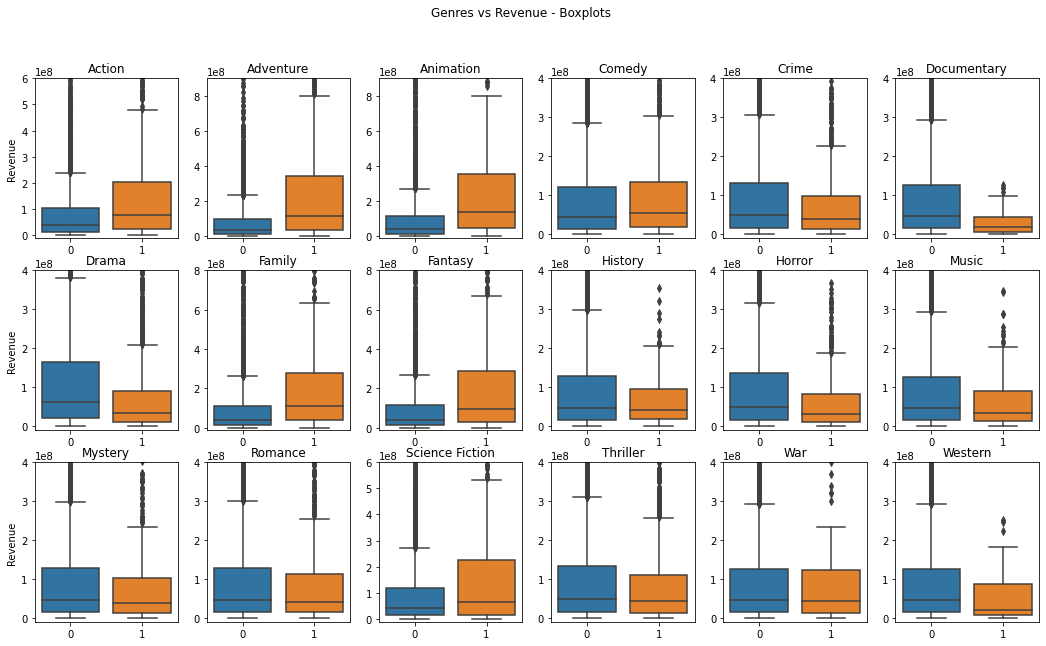

In [163]:
genres_encoded['Revenue'] = moviedb['Revenue']

fig = plt.figure(figsize=(18,10))
action = fig.add_subplot(3,6,1)
adventure = fig.add_subplot(3,6,2)
animation = fig.add_subplot(3,6,3)
comedy = fig.add_subplot(3,6,4)
crime = fig.add_subplot(3,6,5)
documentary = fig.add_subplot(3,6,6)
drama = fig.add_subplot(3,6,7)
family = fig.add_subplot(3,6,8)
fantasy = fig.add_subplot(3,6,9)
history = fig.add_subplot(3,6,10)
horror = fig.add_subplot(3,6,11)
music = fig.add_subplot(3,6,12)
mystery = fig.add_subplot(3,6,13)
romance = fig.add_subplot(3,6,14)
sciencefiction = fig.add_subplot(3,6,15)
thriller = fig.add_subplot(3,6,16)
war = fig.add_subplot(3,6,17)
western = fig.add_subplot(3,6,18)

sns.boxplot(x='Action', y='Revenue', data=genres_encoded, ax=action)
action.set_title('Action')
action.set_xlabel('')
action.set_ylim(-10000000,600000000)

sns.boxplot(x='Adventure', y='Revenue', data=genres_encoded, ax=adventure)
adventure.set_title('Adventure')
adventure.set_xlabel('')
adventure.set_ylabel('')
adventure.set_ylim(-10000000,900000000)

sns.boxplot(x='Animation', y='Revenue', data=genres_encoded, ax=animation)
animation.set_title('Animation')
animation.set_xlabel('')
animation.set_ylabel('')
animation.set_ylim(-10000000,900000000)

sns.boxplot(x="Comedy", y='Revenue', data=genres_encoded, ax=comedy)
comedy.set_title('Comedy')
comedy.set_xlabel('')
comedy.set_ylabel('')
comedy.set_ylim(-10000000,400000000)

sns.boxplot(x='Crime', y='Revenue', data=genres_encoded, ax=crime)
crime.set_title('Crime')
crime.set_xlabel('')
crime.set_ylabel('')
crime.set_ylim(-10000000,400000000)

sns.boxplot(x='Documentary', y='Revenue', data=genres_encoded, ax=documentary)
documentary.set_title('Documentary')
documentary.set_xlabel('')
documentary.set_ylabel('')
documentary.set_ylim(-10000000,400000000)

sns.boxplot(x='Drama', y='Revenue', data=genres_encoded, ax=drama)
drama.set_title('Drama')
drama.set_xlabel('')
drama.set_ylabel('Revenue')
drama.set_ylim(-10000000,400000000)

sns.boxplot(x='Family', y='Revenue', data=genres_encoded, ax=family)
family.set_title('Family')
family.set_xlabel('')
family.set_ylabel('')
family.set_ylim(-10000000,800000000)

sns.boxplot(x='Fantasy', y='Revenue', data=genres_encoded, ax=fantasy)
fantasy.set_title('Fantasy')
fantasy.set_xlabel('')
fantasy.set_ylabel('')
fantasy.set_ylim(-10000000,800000000)

sns.boxplot(x='History', y='Revenue', data=genres_encoded, ax=history)
history.set_title('History')
history.set_xlabel('')
history.set_ylabel('')
history.set_ylim(-10000000,400000000)

sns.boxplot(x='Horror', y='Revenue', data=genres_encoded, ax=horror)
horror.set_title('Horror')
horror.set_xlabel('')
horror.set_ylabel('')
horror.set_ylim(-10000000,400000000)

sns.boxplot(x='Music', y='Revenue', data=genres_encoded, ax=music)
music.set_title('Music')
music.set_xlabel('')
music.set_ylabel('')
music.set_ylim(-10000000,400000000)

sns.boxplot(x='Mystery', y='Revenue', data=genres_encoded, ax=mystery)
mystery.set_title('Mystery')
mystery.set_xlabel('')
mystery.set_ylabel('Revenue')
mystery.set_ylim(-10000000,400000000)

sns.boxplot(x='Science Fiction', y='Revenue', data=genres_encoded, ax=sciencefiction)
sciencefiction.set_title('Science Fiction')
sciencefiction.set_xlabel('')
sciencefiction.set_ylabel('')
sciencefiction.set_ylim(-10000000,600000000)

sns.boxplot(x='Romance', y='Revenue', data=genres_encoded, ax=romance)
romance.set_title('Romance')
romance.set_xlabel('')
romance.set_ylabel('')
romance.set_ylim(-10000000,400000000)

sns.boxplot(x='Thriller', y='Revenue', data=genres_encoded, ax=thriller)
thriller.set_title('Thriller')
thriller.set_xlabel('')
thriller.set_ylabel('')
thriller.set_ylim(-10000000,400000000)

sns.boxplot(x='War', y='Revenue', data=genres_encoded, ax=war)
war.set_title('War')
war.set_xlabel('')
war.set_ylabel('')
war.set_ylim(-10000000,400000000)

sns.boxplot(x='Western', y='Revenue', data=genres_encoded, ax=western)
western.set_title('Western')
western.set_xlabel('')
western.set_ylabel('')
western.set_ylim(-10000000,400000000)

plt.suptitle('Genres vs Revenue - Boxplots')
plt.show()

The most correlated Genres (either positively or negatively), when it comes to movie's revenues, are: Action, Adventure, Animation, Documentary, Drama, Family, Fantasy, Horror, Science Fiction, and Western.  
I drop the following features, which seem to have no, or little, explanataory value over the target:
* Comedy
* Crime
* History
* Music
* Mystery
* Romance
* Thriller
* War

In [164]:
genres_encoded.drop(['Comedy', 'Crime', 'History', 'Music', 'Mystery', 'Romance', 'Thriller', 'War', 'Revenue'], axis=1,\
                    inplace=True)
genres_encoded.head()

Action  Adventure  Animation  Documentary  Drama  Family  Fantasy  Horror  \
0       0          0          0            0      1       0        0       0   
1       0          0          0            0      1       0        0       0   
2       0          0          0            0      1       0        0       0   
3       0          0          0            0      1       0        0       0   
4       0          0          0            0      1       0        0       0   

   Science Fiction  Western  
0                0        0  
1                0        0  
2                0        0  
3                0        0  
4                0        0

Most significant Genres (10) have been encoded and ready for modeling.  
I'll apply Polynomial Transformation to check for feature interactions.

In [165]:
genres_encoded_2 = poly_transform_dummies(2, genres_encoded)
genres_encoded_2.shape

(4871, 47)

In [166]:
genres_encoded_2.head()

Action  Adventure  Animation  Documentary  Drama  Family  Fantasy  Horror  \
0     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   
1     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   
2     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   
3     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   
4     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   

   Science Fiction  Western  ...  Drama Science Fiction  Drama Western  \
0              0.0      0.0  ...                    0.0            0.0   
1              0.0      0.0  ...                    0.0            0.0   
2              0.0      0.0  ...                    0.0            0.0   
3              0.0      0.0  ...                    0.0            0.0   
4              0.0      0.0  ...                    0.0            0.0   

   Family Fantasy  Family Horror  Family Science Fiction  Fantasy Horror  \
0             0.0            0.0                     0.0             0.0   
1             0.0            0.0                     0.0             0.0   
2             0.0            0.0                     0.0             0.0   
3             0.0            0.0                     0.0             0.0   
4             0.0            0.0                     0.0             0.0   

   Fantasy Science Fiction  Fantasy Western  Horror Science Fiction  \
0                      0.0              0.0                     0.0   
1                      0.0              0.0                     0.0   
2                      0.0              0.0                     0.0   
3                      0.0              0.0                     0.0   
4                      0.0              0.0                     0.0   

   Science Fiction Western  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  

[5 rows x 47 columns]

In [167]:
genres_encoded_3 = poly_transform_dummies(3, genres_encoded)
genres_encoded_3.shape

(4871, 102)

In [168]:
genres_encoded_3.head()

Action  Adventure  Animation  Documentary  Drama  Family  Fantasy  Horror  \
0     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   
1     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   
2     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   
3     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   
4     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   

   Science Fiction  Western  ...  Drama Family Fantasy  \
0              0.0      0.0  ...                   0.0   
1              0.0      0.0  ...                   0.0   
2              0.0      0.0  ...                   0.0   
3              0.0      0.0  ...                   0.0   
4              0.0      0.0  ...                   0.0   

   Drama Family Science Fiction  Drama Fantasy Horror  \
0                           0.0                   0.0   
1                           0.0                   0.0   
2                           0.0                   0.0   
3                           0.0                   0.0   
4                           0.0                   0.0   

   Drama Fantasy Science Fiction  Drama Fantasy Western  \
0                            0.0                    0.0   
1                            0.0                    0.0   
2                            0.0                    0.0   
3                            0.0                    0.0   
4                            0.0                    0.0   

   Drama Horror Science Fiction  Family Fantasy Horror  \
0                           0.0                    0.0   
1                           0.0                    0.0   
2                           0.0                    0.0   
3                           0.0                    0.0   
4                           0.0                    0.0   

   Family Fantasy Science Fiction  Family Horror Science Fiction  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   

   Fantasy Horror Science Fiction  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  

[5 rows x 102 columns]

In [169]:
genres_encoded_4 = poly_transform_dummies(4, genres_encoded)
genres_encoded_4.shape

(4871, 136)

In [170]:
genres_encoded_4.head()

Action  Adventure  Animation  Documentary  Drama  Family  Fantasy  Horror  \
0     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   
1     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   
2     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   
3     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   
4     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   

   Science Fiction  Western  ...  Adventure Animation Fantasy Science Fiction  \
0              0.0      0.0  ...                                          0.0   
1              0.0      0.0  ...                                          0.0   
2              0.0      0.0  ...                                          0.0   
3              0.0      0.0  ...                                          0.0   
4              0.0      0.0  ...                                          0.0   

   Adventure Drama Family Fantasy  Adventure Drama Family Science Fiction  \
0                             0.0                                     0.0   
1                             0.0                                     0.0   
2                             0.0                                     0.0   
3                             0.0                                     0.0   
4                             0.0                                     0.0   

   Adventure Family Fantasy Horror  Adventure Family Fantasy Science Fiction  \
0                              0.0                                       0.0   
1                              0.0                                       0.0   
2                              0.0                                       0.0   
3                              0.0                                       0.0   
4                              0.0                                       0.0   

   Adventure Fantasy Horror Science Fiction  Animation Drama Family Fantasy  \
0                                       0.0                             0.0   
1                                       0.0                             0.0   
2                                       0.0                             0.0   
3                                       0.0                             0.0   
4                                       0.0                             0.0   

   Animation Family Fantasy Science Fiction  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Drama Family Fantasy Science Fiction  Drama Fantasy Horror Science Fiction  
0                                   0.0                                   0.0  
1                                   0.0                                   0.0  
2                                   0.0                                   0.0  
3                                   0.0                                   0.0  
4                                   0.0                                   0.0  

[5 rows x 136 columns]

In [171]:
genres_encoded_5 = poly_transform_dummies(5, genres_encoded)
genres_encoded_5.shape

(4871, 141)

In [172]:
genres_encoded_5.head()

Action  Adventure  Animation  Documentary  Drama  Family  Fantasy  Horror  \
0     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   
1     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   
2     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   
3     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   
4     0.0        0.0        0.0          0.0    1.0     0.0      0.0     0.0   

   Science Fiction  Western  ...  Adventure Fantasy Horror Science Fiction  \
0              0.0      0.0  ...                                       0.0   
1              0.0      0.0  ...                                       0.0   
2              0.0      0.0  ...                                       0.0   
3              0.0      0.0  ...                                       0.0   
4              0.0      0.0  ...                                       0.0   

   Animation Drama Family Fantasy  Animation Family Fantasy Science Fiction  \
0                             0.0                                       0.0   
1                             0.0                                       0.0   
2                             0.0                                       0.0   
3                             0.0                                       0.0   
4                             0.0                                       0.0   

   Drama Family Fantasy Science Fiction  Drama Fantasy Horror Science Fiction  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   0.0                                   0.0   

   Action Adventure Animation Family Fantasy  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   Action Adventure Animation Family Science Fiction  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   Action Adventure Fantasy Horror Science Fiction  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   Action Animation Family Fantasy Science Fiction  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   Adventure Animation Family Fantasy Science Fiction  
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

[5 rows x 141 columns]

Now I have 5 encoded datasets, with the most significant Genres.  
1. First dataset -> unique features only (10 features)
2. Second dataset -> second degree feature interactions: combination of 2 Genres (47 features).
3. Third dataset -> third degree feature interactions: combination of 3 genres (102 features).
4. Fourth dataset -> fourth degree feature interactions: combination of 4 genres (136 features).
4. Fifth dataset -> fifth degree feature interactions: combination of 5 genres (141 features).

##### Languages_Spoken

In [173]:
category_list('Unique_Languages', 'Languages_Spoken')

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 416.60it/s]
0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████| 4871/4871 [00:04<00:00, 1084.35it/s]
0it [00:04, ?it/s]

Number of elements in the list, including duplicates: 48710


In [174]:
languages_list = total_list
languages_df = value_frequency_df(languages_list, 'Languages_Spoken')
languages_df.head(20)

Languages_Spoken  Num_Movies
1           English        4595
2          Français         470
3           Español         465
4           Deutsch         272
5          Italiano         229
6           Pусский         208
7               日本語         140
8               普通话         112
9           العربية          86
10                           70
11            Latin          67
12        Português          64
13           हिन्दी          62
14        广州话 / 廣州話          52
15          한국어/조선말          48
16           Polski          41
17            Český          36
18          svenska          33
19         עִבְרִית          30
20          ภาษาไทย          28

In [175]:
print('Percentage of movies with English as a Spoken Language: {}%'.format(round(4595/moviedb.shape[0]*100,2)))

Percentage of movies with English as a Spoken Language: 94.33%


Not surprisingly, almost 95% of movies have English as a Spoken Languages. For further category selection, I set a threshold at 200 movies: I'll keep only the Languages spoken in at least 200 movies, that is the first 6 languages in the dataframe.  
I'll add now, in the moviedb dataset, a new column with the top 6 Languages Spoken only.

In [176]:
top_value_column(languages_df, threshold=200, new_column='Top_Spoken_Languages', column_1='Unique_Languages',\
                 column_2='Languages_Spoken')
moviedb.head(5)

Title                    Genres  \
0  Dilwale Dulhania Le Jayenge  Comedy | Drama | Romance   
1     The Shawshank Redemption             Crime | Drama   
2                The Godfather             Crime | Drama   
3             Schindler's List     Drama | History | War   
4       The Godfather: Part II             Crime | Drama   

                                                Cast  \
0  Shah Rukh Khan | Kajol | Amrish Puri | Anupam ...   
1  Tim Robbins | Morgan Freeman | Bob Gunton | Cl...   
2  Marlon Brando | Al Pacino | James Caan | Richa...   
3  Liam Neeson | Ben Kingsley | Ralph Fiennes | C...   
4  Al Pacino | Robert Duvall | Diane Keaton | Rob...   

                                                Crew Collection  \
0  Farah Khan | Yash Chopra | Aditya Chopra | Adi...      False   
1  Thomas Newman | Thomas Newman | Roger Deakins ...      False   
2  Francis Ford Coppola | Francis Ford Coppola | ...       True   
3  John Williams | Steven Spielberg | Steven Spie...      False   
4  Walter Murch | Walter Murch | Francis Ford Cop...       True   

  English_Language                       Languages_Spoken  Runtime  \
0            False                                 हिन्दी    190.0   
1             True                                English    142.0   
2             True             English | Italiano | Latin    175.0   
3             True  Deutsch | Polski | עִבְרִית | English    195.0   
4             True   English | Italiano | Latin | Español    202.0   

                        Production_Companies         Country_of_Origin  ...  \
0                             Yash Raj Films                     India  ...   
1                  Castle Rock Entertainment  United States of America  ...   
2             Paramount | Alfran Productions  United States of America  ...   
3  Universal Pictures | Amblin Entertainment  United States of America  ...   
4            Paramount | The Coppola Company  United States of America  ...   

   Budget/Runtime                                        Unique_Cast  \
0    69473.684211  Govind Khatri , Arjun Sablok , Pooja Ruparel ,...   
1   176056.338028  Robert Haley , Neil Summers , Tim Robbins , Al...   
2    34285.714286  Sterling Hayden , Abe Vigoda , Talia Shire , R...   
3   112820.512821  Thomas Morris , Wolfgang Seidenberg , Michael ...   
4    64356.435644  Maria Carta , Joe De Nicola , Talia Shire , Ga...   

         Top_Cast                                        Unique_Crew  \
0                  Lalit Pandit , Jatin Pandit , Ajay Trivedi , K...   
1  Morgan Freeman  Lori Martino , Brian Boggs , Blair Gibeau , Ro...   
2                  Joe Lombardi , Valerio De Paolis , Robert Ward...   
3     Liam Neeson  Nada Pinter , Mauro Fiore , Fritz Fleischhacke...   
4  Robert De Niro  Burt Bluestein , Alan Hopkins , George R. Nels...   

                         Top_Crew                Unique_Production_Companies  \
0                                                             Yash Raj Films   
1  Barbara Harris, Deborah Aquila                  Castle Rock Entertainment   
2                                             Paramount , Alfran Productions   
3                Steven Spielberg  Universal Pictures , Amblin Entertainment   
4                                            The Coppola Company , Paramount   

   Top_Production_Companies             Unique_Genres  \
0                            Drama , Romance , Comedy   
1                                       Drama , Crime   
2                 Paramount             Drama , Crime   
3        Universal Pictures     History , Drama , War   
4                 Paramount             Drama , Crime   

                        Unique_Languages        Top_Spoken_Languages  
0                                 हिन्दी                              
1                                English                     English  
2             Italiano , English , Latin           Italiano, English  
3  English , Polski , Deutsch , עִבְרִית            En

In [177]:
moviedb.tail()

Title  \
4866  The End of the Affair   
4867            Killing Zoe   
4868     Invaders from Mars   
4869      Jumping the Broom   
4870                Smashed   

                                                 Genres  \
4866                                              Drama   
4867                  Action | Crime | Drama | Thriller   
4868  Adventure | Horror | Mystery | Science Fiction...   
4869                                             Comedy   
4870                                     Comedy | Drama   

                                                   Cast  \
4866  Ralph Fiennes | Stephen Rea | Julianne Moore |...   
4867  Eric Stoltz | Julie Delpy | Jean-Hugues Anglad...   
4868  Hunter Carson | Karen Black | Timothy Bottoms ...   
4869  Paula Patton | Julie Bowen | Meagan Good | Mik...   
4870  Mary Elizabeth Winstead | Aaron Paul | Octavia...   

                                                   Crew Collection  \
4866  Roger Pratt | Susie Figgis | Stephen Woolley |...      False   
4867  Quentin Tarantino | David Wasco | Roger Avary ...      False   
4868  Dan O'Bannon | Leslie Dilley | Dana Lyman | Da...      False   
4869  Tracey Edmonds | Arlene Gibbs | Elizabeth Hunt...      False   
4870  Avy Kaufman | Kim Coleman | Andrea Sperling | ...      False   

     English_Language    Languages_Spoken  Runtime  \
4866             True             English    102.0   
4867             True  English | Français     96.0   
4868             True             English    100.0   
4869             True             English    112.0   
4870             True             English     85.0   

                                   Production_Companies  \
4866                                  Columbia Pictures   
4867                                 Live Entertainment   
4868            Cannon Group | Golan-Globus Productions   
4869  Sony Pictures | TriStar Pictures | Stage 6 Fil...   
4870                         Super Crispy Entertainment   

                              Country_of_Origin  ...  Budget/Runtime  \
4866  United States of America | United Kingdom  ...   225490.196078   
4867          France | United States of America  ...    15625.000000   
4868                   United States of America  ...   120000.000000   
4869                   United States of America  ...    58928.571429   
4870                   United States of America  ...     5882.352941   

                                            Unique_Cast  Top_Cast  \
4866  Julianne Moore , Cyril Shaps , Simon Turner , ...             
4867  Tai Thai , Eric Pascal Chaltiel , Jean-Hugues ...             
4868  Kenneth Kimmins , Mark Giardino , Debbie Lee C...             
4869  Tasha Smith , DeRay Davis , Mike Epps , Paula ...             
4870  Megan Mullally , Aaron Paul , Patti Allison , ...             

                                            Unique_Crew     Top_Crew  \
4866  Chris Seagers , Susie Figgis , Michael Nyman ,...                
4867  Roger Avary , Samuel Hadida , Tom Savini , Kat...                
4868  Iya Labunka , Ron Bartlett , Dan O'Bannon , Li...                
4869  Arlene Gibbs , T.D. Jakes , Tracey Edmonds , E...                
4870  Zygi Wilf , Andrea Sperling , Jonathan Schwart...  Avy Kaufman   

                            Unique_Production_Companies  \
4866                                  Columbia Pictures   
4867                                 Live Entertainment   
4868            Golan-Globus Productions , Cannon Group   
4869  TriStar Pictures , Our Stories Films , Stage 6...   
4870                         Super Crispy Entertainment   

      Top_Production_Companies  \
4866         Columbia Pictures   
4867                             
4868                             
4869             Sony Pictures   
4870                             

                                          Unique_Genres    Unique_Languages  \
4866                                              Drama             English   
4867                  Dra

I proceed now by performing one-hot encoding (a nominal kind of encoding).

In [178]:
# One Hot Encoding
languages_encoded = moviedb['Top_Spoken_Languages'].str.get_dummies(sep=', ')
languages_encoded.head()

Deutsch  English  Español  Français  Italiano  Pусский
0        0        0        0         0         0        0
1        0        1        0         0         0        0
2        0        1        0         0         1        0
3        1        1        0         0         0        0
4        0        1        1         0         1        0

Let's check for correlations between the most frequent Spoken Languages and the revenue.

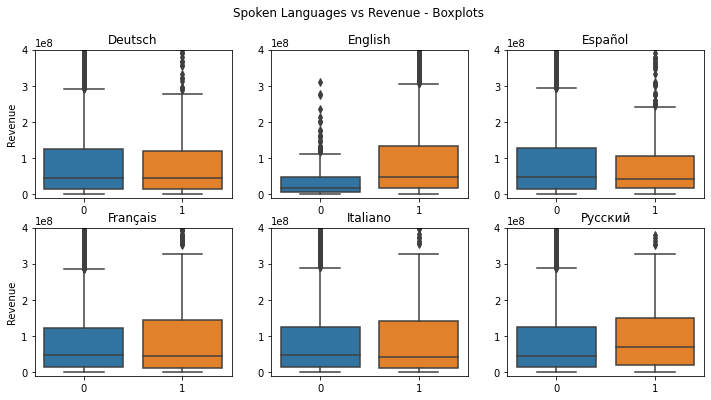

In [179]:
languages_encoded['Revenue'] = moviedb['Revenue']

fig = plt.figure(figsize=(12,6))
deutsch = fig.add_subplot(2,3,1)
english = fig.add_subplot(2,3,2)
espanol = fig.add_subplot(2,3,3)
francais = fig.add_subplot(2,3,4)
italiano = fig.add_subplot(2,3,5)
pусский = fig.add_subplot(2,3,6)

sns.boxplot(x='Deutsch', y='Revenue', data=languages_encoded, ax=deutsch)
deutsch.set_title('Deutsch')
deutsch.set_xlabel('')
deutsch.set_ylim(-10000000,400000000)

sns.boxplot(x='English', y='Revenue', data=languages_encoded, ax=english)
english.set_title('English')
english.set_xlabel('')
english.set_ylabel('')
english.set_ylim(-10000000,400000000)

sns.boxplot(x='Español', y='Revenue', data=languages_encoded, ax=espanol)
espanol.set_title('Español')
espanol.set_xlabel('')
espanol.set_ylabel('')
espanol.set_ylim(-10000000,400000000)

sns.boxplot(x="Français", y='Revenue', data=languages_encoded, ax=francais)
francais.set_title('Français')
francais.set_xlabel('')
francais.set_ylabel('Revenue')
francais.set_ylim(-10000000,400000000)

sns.boxplot(x='Italiano', y='Revenue', data=languages_encoded, ax=italiano)
italiano.set_title('Italiano')
italiano.set_xlabel('')
italiano.set_ylabel('')
italiano.set_ylim(-10000000,400000000)

sns.boxplot(x='Pусский', y='Revenue', data=languages_encoded, ax=pусский)
pусский.set_title('Pусский')
pусский.set_xlabel('')
pусский.set_ylabel('')
pусский.set_ylim(-10000000,400000000)

plt.suptitle('Spoken Languages vs Revenue - Boxplots')
plt.show()

English seem to be the Language with the strongest correlation to the movie's revenues. Other languages seem to have no, or little, explanatory value over the target.

In [180]:
english_encoded = languages_encoded['English']
english_encoded.head()

0    0
1    1
2    1
3    1
4    1
Name: English, dtype: int64

##### Country_of_Origin

In [181]:
category_list('Unique_Countries', 'Country_of_Origin')

100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 767.93it/s]
0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 4871/4871 [00:05<00:00, 849.25it/s]
0it [00:05, ?it/s]

Number of elements in the list, including duplicates: 58452


In [182]:
country_list = total_list
country_df = value_frequency_df(country_list, 'Country')
country_df.head(15)

Country  Num_Movies
1   United States of America        4212
2             United Kingdom         678
3                     France         372
4                    Germany         321
5                     Canada         246
6                  Australia         110
7                      Italy         104
8                      Spain          91
9                      Japan          86
10                     China          77
11                     India          73
12                 Hong Kong          47
13                   Belgium          45
14                   Ireland          40
15                    Sweden          33

In [183]:
print('Percentage of movies produced in the US: {}%'.format(round(4212/moviedb.shape[0]*100,2)))

Percentage of movies produced in the US: 86.47%


Again not surprisingly, the vast majority of movies (86%) were made in the United States.  
For further category selection, I set a threshold at 90 movies: I'll keep only the countries where at least 90 movies were made, that is the top 8 countries.  
I'll add now, in the moviedb dataset, a new column with the top 8 Countries only.

In [184]:
top_value_column(country_df, threshold=90, new_column='Top_Country', column_1='Unique_Countries', column_2='Country')
moviedb.head(5)

Title                    Genres  \
0  Dilwale Dulhania Le Jayenge  Comedy | Drama | Romance   
1     The Shawshank Redemption             Crime | Drama   
2                The Godfather             Crime | Drama   
3             Schindler's List     Drama | History | War   
4       The Godfather: Part II             Crime | Drama   

                                                Cast  \
0  Shah Rukh Khan | Kajol | Amrish Puri | Anupam ...   
1  Tim Robbins | Morgan Freeman | Bob Gunton | Cl...   
2  Marlon Brando | Al Pacino | James Caan | Richa...   
3  Liam Neeson | Ben Kingsley | Ralph Fiennes | C...   
4  Al Pacino | Robert Duvall | Diane Keaton | Rob...   

                                                Crew Collection  \
0  Farah Khan | Yash Chopra | Aditya Chopra | Adi...      False   
1  Thomas Newman | Thomas Newman | Roger Deakins ...      False   
2  Francis Ford Coppola | Francis Ford Coppola | ...       True   
3  John Williams | Steven Spielberg | Steven Spie...      False   
4  Walter Murch | Walter Murch | Francis Ford Cop...       True   

  English_Language                       Languages_Spoken  Runtime  \
0            False                                 हिन्दी    190.0   
1             True                                English    142.0   
2             True             English | Italiano | Latin    175.0   
3             True  Deutsch | Polski | עִבְרִית | English    195.0   
4             True   English | Italiano | Latin | Español    202.0   

                        Production_Companies         Country_of_Origin  ...  \
0                             Yash Raj Films                     India  ...   
1                  Castle Rock Entertainment  United States of America  ...   
2             Paramount | Alfran Productions  United States of America  ...   
3  Universal Pictures | Amblin Entertainment  United States of America  ...   
4            Paramount | The Coppola Company  United States of America  ...   

         Top_Cast                                        Unique_Crew  \
0                  Lalit Pandit , Jatin Pandit , Ajay Trivedi , K...   
1  Morgan Freeman  Lori Martino , Brian Boggs , Blair Gibeau , Ro...   
2                  Joe Lombardi , Valerio De Paolis , Robert Ward...   
3     Liam Neeson  Nada Pinter , Mauro Fiore , Fritz Fleischhacke...   
4  Robert De Niro  Burt Bluestein , Alan Hopkins , George R. Nels...   

                         Top_Crew                Unique_Production_Companies  \
0                                                             Yash Raj Films   
1  Barbara Harris, Deborah Aquila                  Castle Rock Entertainment   
2                                             Paramount , Alfran Productions   
3                Steven Spielberg  Universal Pictures , Amblin Entertainment   
4                                            The Coppola Company , Paramount   

   Top_Production_Companies             Unique_Genres  \
0                            Drama , Romance , Comedy   
1                                       Drama , Crime   
2                 Paramount             Drama , Crime   
3        Universal Pictures     History , Drama , War   
4                 Paramount             Drama , Crime   

                        Unique_Languages        Top_Spoken_Languages  \
0                                 हिन्दी                               
1                                English                     English   
2             Italiano , English , Latin           Italiano, English   
3  English , Polski , Deutsch , עִבְרִית            English, Deutsch   
4   Italiano , English , Latin , Español  Italiano, English, Español   

           Unique_Countries               Top_Country  
0                     India                            
1  United States of America  United States of America  
2  United States of America  United States of America  
3  United States of America  United States of America  
4  United States of America  United States of America  

[

In [185]:
moviedb.tail()

Title  \
4866  The End of the Affair   
4867            Killing Zoe   
4868     Invaders from Mars   
4869      Jumping the Broom   
4870                Smashed   

                                                 Genres  \
4866                                              Drama   
4867                  Action | Crime | Drama | Thriller   
4868  Adventure | Horror | Mystery | Science Fiction...   
4869                                             Comedy   
4870                                     Comedy | Drama   

                                                   Cast  \
4866  Ralph Fiennes | Stephen Rea | Julianne Moore |...   
4867  Eric Stoltz | Julie Delpy | Jean-Hugues Anglad...   
4868  Hunter Carson | Karen Black | Timothy Bottoms ...   
4869  Paula Patton | Julie Bowen | Meagan Good | Mik...   
4870  Mary Elizabeth Winstead | Aaron Paul | Octavia...   

                                                   Crew Collection  \
4866  Roger Pratt | Susie Figgis | Stephen Woolley |...      False   
4867  Quentin Tarantino | David Wasco | Roger Avary ...      False   
4868  Dan O'Bannon | Leslie Dilley | Dana Lyman | Da...      False   
4869  Tracey Edmonds | Arlene Gibbs | Elizabeth Hunt...      False   
4870  Avy Kaufman | Kim Coleman | Andrea Sperling | ...      False   

     English_Language    Languages_Spoken  Runtime  \
4866             True             English    102.0   
4867             True  English | Français     96.0   
4868             True             English    100.0   
4869             True             English    112.0   
4870             True             English     85.0   

                                   Production_Companies  \
4866                                  Columbia Pictures   
4867                                 Live Entertainment   
4868            Cannon Group | Golan-Globus Productions   
4869  Sony Pictures | TriStar Pictures | Stage 6 Fil...   
4870                         Super Crispy Entertainment   

                              Country_of_Origin  ...  Top_Cast  \
4866  United States of America | United Kingdom  ...             
4867          France | United States of America  ...             
4868                   United States of America  ...             
4869                   United States of America  ...             
4870                   United States of America  ...             

                                            Unique_Crew     Top_Crew  \
4866  Chris Seagers , Susie Figgis , Michael Nyman ,...                
4867  Roger Avary , Samuel Hadida , Tom Savini , Kat...                
4868  Iya Labunka , Ron Bartlett , Dan O'Bannon , Li...                
4869  Arlene Gibbs , T.D. Jakes , Tracey Edmonds , E...                
4870  Zygi Wilf , Andrea Sperling , Jonathan Schwart...  Avy Kaufman   

                            Unique_Production_Companies  \
4866                                  Columbia Pictures   
4867                                 Live Entertainment   
4868            Golan-Globus Productions , Cannon Group   
4869  TriStar Pictures , Our Stories Films , Stage 6...   
4870                         Super Crispy Entertainment   

      Top_Production_Companies  \
4866         Columbia Pictures   
4867                             
4868                             
4869             Sony Pictures   
4870                             

                                          Unique_Genres    Unique_Languages  \
4866                                              Drama             English   
4867                  Drama , Action , Thriller , Crime  English , Français   
4868  Science Fiction , Adventure , Family , Horror ...             English   
4869                                             Comedy             English   
4870                                     Drama , Comedy             English   

      Top_Spoken_Languages                           Unique_Countries  \
4866               English  United States of America , United Kingdom   
4867     Engl

I proceed now by performing one-hot encoding.

In [186]:
# One Hot Encoding
country_encoded = moviedb['Top_Country'].str.get_dummies(sep=', ')
country_encoded.head()

Australia  Canada  France  Germany  Italy  Spain  United Kingdom  \
0          0       0       0        0      0      0               0   
1          0       0       0        0      0      0               0   
2          0       0       0        0      0      0               0   
3          0       0       0        0      0      0               0   
4          0       0       0        0      0      0               0   

   United States of America  
0                         0  
1                         1  
2                         1  
3                         1  
4                         1

Let's check for correlations between the top countries and the revenue.

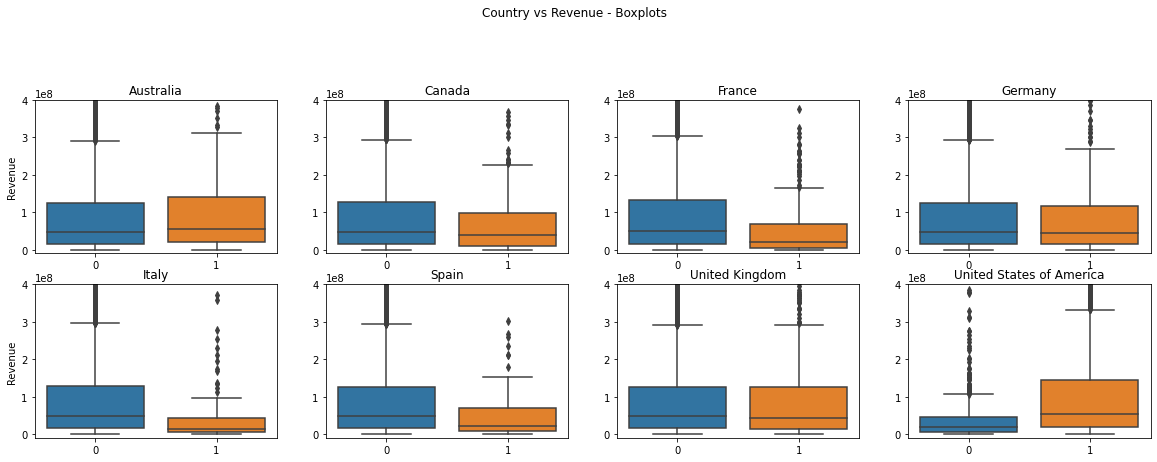

In [187]:
country_encoded['Revenue'] = moviedb['Revenue']

fig = plt.figure(figsize=(20,13))
australia = fig.add_subplot(4,4,1)
canada = fig.add_subplot(4,4,2)
france = fig.add_subplot(4,4,3)
germany = fig.add_subplot(4,4,4)
italy = fig.add_subplot(4,4,5)
spain = fig.add_subplot(4,4,6)
uk = fig.add_subplot(4,4,7)
usa = fig.add_subplot(4,4,8)

sns.boxplot(x='Australia', y='Revenue', data=country_encoded, ax=australia)
australia.set_title('Australia')
australia.set_xlabel('')
australia.set_ylim(-10000000,400000000)

sns.boxplot(x='Canada', y='Revenue', data=country_encoded, ax=canada)
canada.set_title('Canada')
canada.set_xlabel('')
canada.set_ylabel('')
canada.set_ylim(-10000000,400000000)

sns.boxplot(x='France', y='Revenue', data=country_encoded, ax=france)
france.set_title('France')
france.set_xlabel('')
france.set_ylabel('')
france.set_ylim(-10000000,400000000)

sns.boxplot(x="Germany", y='Revenue', data=country_encoded, ax=germany)
germany.set_title('Germany')
germany.set_xlabel('')
germany.set_ylabel('')
germany.set_ylim(-10000000,400000000)

sns.boxplot(x='Italy', y='Revenue', data=country_encoded, ax=italy)
italy.set_title('Italy')
italy.set_xlabel('')
italy.set_ylabel('Revenue')
italy.set_ylim(-10000000,400000000)

sns.boxplot(x='Spain', y='Revenue', data=country_encoded, ax=spain)
spain.set_title('Spain')
spain.set_xlabel('')
spain.set_ylabel('')
spain.set_ylim(-10000000,400000000)

sns.boxplot(x='United Kingdom', y='Revenue', data=country_encoded, ax=uk)
uk.set_title('United Kingdom')
uk.set_xlabel('')
uk.set_ylabel('')
uk.set_ylim(-10000000,400000000)

sns.boxplot(x='United States of America', y='Revenue', data=country_encoded, ax=usa)
usa.set_title('United States of America')
usa.set_xlabel('')
usa.set_ylabel('')
usa.set_ylim(-10000000,400000000)

plt.suptitle('Country vs Revenue - Boxplots')
plt.show()

France, Italy, Spain, and the United states of America seem to be the countries with the strongest correlation (either positive or negative) to the movie's revenues. Other countries seem to have no, or little, explanatory value over the target.

In [188]:
country_encoded = country_encoded.drop(['Australia', 'Canada', 'Germany', 'United Kingdom', 'Revenue'], axis=1)
country_encoded.head()

France  Italy  Spain  United States of America
0       0      0      0                         0
1       0      0      0                         1
2       0      0      0                         1
3       0      0      0                         1
4       0      0      0                         1

The Most correlated countries (4) have been encoded and are ready for modeling.  
I'll apply Polynomial Transformation to check for feature interactions.

In [189]:
country_encoded_2 = poly_transform_dummies(2, country_encoded)
country_encoded_2.shape

(4871, 10)

In [190]:
country_encoded_2.head()

France  Italy  Spain  United States of America  France Italy  France Spain  \
0     0.0    0.0    0.0                       0.0           0.0           0.0   
1     0.0    0.0    0.0                       1.0           0.0           0.0   
2     0.0    0.0    0.0                       1.0           0.0           0.0   
3     0.0    0.0    0.0                       1.0           0.0           0.0   
4     0.0    0.0    0.0                       1.0           0.0           0.0   

   France United States of America  Italy Spain  \
0                              0.0          0.0   
1                              0.0          0.0   
2                              0.0          0.0   
3                              0.0          0.0   
4                              0.0          0.0   

   Italy United States of America  Spain United States of America  
0                             0.0                             0.0  
1                             0.0                             0.0  
2                             0.0                             0.0  
3                             0.0                             0.0  
4                             0.0                             0.0

In [191]:
country_encoded_3 = poly_transform_dummies(3, country_encoded)
country_encoded_3.shape

(4871, 14)

In [192]:
country_encoded_3.head()

France  Italy  Spain  United States of America  France Italy  France Spain  \
0     0.0    0.0    0.0                       0.0           0.0           0.0   
1     0.0    0.0    0.0                       1.0           0.0           0.0   
2     0.0    0.0    0.0                       1.0           0.0           0.0   
3     0.0    0.0    0.0                       1.0           0.0           0.0   
4     0.0    0.0    0.0                       1.0           0.0           0.0   

   France United States of America  Italy Spain  \
0                              0.0          0.0   
1                              0.0          0.0   
2                              0.0          0.0   
3                              0.0          0.0   
4                              0.0          0.0   

   Italy United States of America  Spain United States of America  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   France Italy Spain  France Italy United States of America  \
0                 0.0                                    0.0   
1                 0.0                                    0.0   
2                 0.0                                    0.0   
3                 0.0                                    0.0   
4                 0.0                                    0.0   

   France Spain United States of America  Italy Spain United States of America  
0                                    0.0                                   0.0  
1                                    0.0                                   0.0  
2                                    0.0                                   0.0  
3                                    0.0                                   0.0  
4                                    0.0                                   0.0

In [193]:
country_encoded_4 = poly_transform_dummies(4, country_encoded)
country_encoded_4.shape

(4871, 15)

In [194]:
country_encoded_4.head()

France  Italy  Spain  United States of America  France Italy  France Spain  \
0     0.0    0.0    0.0                       0.0           0.0           0.0   
1     0.0    0.0    0.0                       1.0           0.0           0.0   
2     0.0    0.0    0.0                       1.0           0.0           0.0   
3     0.0    0.0    0.0                       1.0           0.0           0.0   
4     0.0    0.0    0.0                       1.0           0.0           0.0   

   France United States of America  Italy Spain  \
0                              0.0          0.0   
1                              0.0          0.0   
2                              0.0          0.0   
3                              0.0          0.0   
4                              0.0          0.0   

   Italy United States of America  Spain United States of America  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   France Italy Spain  France Italy United States of America  \
0                 0.0                                    0.0   
1                 0.0                                    0.0   
2                 0.0                                    0.0   
3                 0.0                                    0.0   
4                 0.0                                    0.0   

   France Spain United States of America  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Italy Spain United States of America  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   France Italy Spain United States of America  
0                                          0.0  
1                                          0.0  
2                                          0.0  
3                                          0.0  
4                                          0.0

Now I have 4 encoded datasets, with the most significant Countries.  
1. First dataset -> unique features only (4 features)
2. Second dataset -> second degree feature interactions: combination of 2 countries (10 features).
3. Third dataset -> third degree feature interactions: combination of 3 countries (14 features).
4. Fourth dataset -> fourth degree feature interactions: combination of 4 countries (15 features).

___

Following features have been selected for model development:
* Budget * Runtime
* Collection
* Weekend
* Cast - 10 features: Brad Pitt, Bruce Willis, Frank Welker, John Goodman, Johnny Depp, Liam Neeson, Matt Damon, Morgan Freeman, Samuel L. Jackson, Steve Buscemi.
* Crew - 10 features: Barbara Harris, Dan O'Connell, Francine Maisler, Gary Burritt, Hans Bjerno, Hans Zimmer, James Newton Howard, John T. Cucci, Mo Henry, Steven Spielberg.
* Production Companies - 10 features: 20th Century Fox, Canal+, Columbia Pictures, DreamWorks Pictures, Paramount, Sony Pictures, Universal Pictures, Village Roadshow Pictures, Walt Disney Pictures, Warner Bros. Pictures.
* Genres - 10 features: Action, Adventure, Animation, Documentary, Drama, Family, Fantasy, Horror, Science Fiction, Western.
* Spoken Languages - 1 feature: English.
* Countries of production - 4 features: France, Italy, Spain, United States of America.

Let's one-hot encode Collection and Weekend categories. We'll drop the first category to avoid multicollinearity issues.

In [195]:
collection_encoded = pd.get_dummies(moviedb['Collection'], drop_first=True)
collection_encoded.rename(columns={True:'Collection'}, inplace=True)
collection_encoded.head()

Collection
0           0
1           0
2           1
3           0
4           1

In [196]:
weekend_encoded = pd.get_dummies(moviedb['Weekend'], drop_first=True)
weekend_encoded.rename(columns={1:'Weekend'}, inplace=True)
weekend_encoded.head()

Weekend
0        1
1        1
2        0
3        0
4        1

Let's create the feature set.

In [197]:
# let's start selecting some variables
variables = ['Budget*Runtime', 'Revenue']
movie_variables = moviedb[variables]

# concatenate the encoded datasets
movie_variables = pd.concat([movie_variables, collection_encoded, weekend_encoded, topcast_encoded, topcrew_encoded,\
                             topproducers_encoded, genres_encoded, english_encoded, country_encoded], axis=1)
movie_variables.head()

Budget*Runtime      Revenue  Collection  Weekend  Brad Pitt  Bruce Willis  \
0    2.508000e+09  100000000.0           0        1          0             0   
1    3.550000e+09   28341469.0           0        1          0             0   
2    1.050000e+09  245066411.0           1        0          0             0   
3    4.290000e+09  321365567.0           0        0          0             0   
4    2.626000e+09  102600000.0           1        1          0             0   

   Frank Welker  John Goodman  Johnny Depp  Liam Neeson  ...  Family  Fantasy  \
0             0             0            0            0  ...       0        0   
1             0             0            0            0  ...       0        0   
2             0             0            0            0  ...       0        0   
3             0             0            0            1  ...       0        0   
4             0             0            0            0  ...       0        0   

   Horror  Science Fiction  Western  English  France  Italy  Spain  \
0       0                0        0        0       0      0      0   
1       0                0        0        1       0      0      0   
2       0                0        0        1       0      0      0   
3       0                0        0        1       0      0      0   
4       0                0        0        1       0      0      0   

   United States of America  
0                         0  
1                         1  
2                         1  
3                         1  
4                         1  

[5 rows x 49 columns]

Let's create the Feature-set, the target, and split into train and test sets.

In [198]:
# create the feature set and separate the target variable
feature_set = movie_variables.drop(['Revenue'], axis=1)
target = movie_variables['Revenue']

print('Feature set dimensions:', feature_set.shape)
print('Target dimensions:', target.shape)

Feature set dimensions: (4871, 48)
Target dimensions: (4871,)


In [199]:
x_train, x_test, y_train, y_test = train_test_split(feature_set, target, test_size=0.25, random_state=6789)
print('Features - Train Set:', x_train.shape)
print('Target - Train Set:', y_train.shape)
print('Feature - Test Set:', x_test.shape)
print('Target - Test Set:', y_test.shape)

Features - Train Set: (3653, 48)
Target - Train Set: (3653,)
Feature - Test Set: (1218, 48)
Target - Test Set: (1218,)


We are now ready for modelling!

## 3. Model Development <a name="modeldevelopment"></a>

In [200]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Lasso
print('Needed libraries imported.')

Needed libraries imported.


### 3.1. Linear Regression Model <a name='linearregression'></a> 

Since the focus of the project is Interpretation (rather than prediction), I'll use only 1 error metric: the Coefficient of Determination (or R^2). Since, for a plain Linear Linear regression model, features don't need to be on the same scale, I don't scale the features for now.

Let's train and calculate the error of a Linear Regression model.

In [201]:
lr = LinearRegression()
# train the model
lr = lr.fit(x_train, y_train)
# calculate the R^2
predictions = lr.predict(x_test)
print('Linear Regression - Coefficient of Determination:', r2_score(y_test, predictions))
print('Linear Regression - Mean Squared Error:', mean_squared_error(y_test, predictions))

Linear Regression - Coefficient of Determination: 0.6521310876040192
Linear Regression - Mean Squared Error: 1.6134753505186438e+16


Not bad. The Coefficient of determination is 0.65, which means that 65% of the target variation is explained by our model.  
Let's compare the In-Sample error with the Out-of-Sample error, performing cross-validation.

In [202]:
# Train the model on the whole data set and check the in-sample error
lr = LinearRegression()
lr_insample = lr.fit(feature_set, target)
predictions_insample = lr_insample.predict(feature_set)
r2_linear = r2_score(target, predictions_insample)
mse_linear = mean_squared_error(target, predictions_insample)
print('Linear Regression - In-Sample Coefficient of Determination:', r2_linear)
print('Linear Regression - In-Sample Mean Squared Error:', mse_linear)
print('')

kf = KFold(shuffle=True, random_state=6789, n_splits=4)
cross_preds = cross_val_predict(lr, feature_set, target, cv=kf)
cross_r2_linear = r2_score(target, cross_preds)
cross_mse_linear = mean_squared_error(target, cross_preds)
print('Linear Regression with Cross Validation - Out-of-Sample Coefficient of Determination:', cross_r2_linear)
print('Linear Regression with Cross Validation - Out-of-Sample Mean Squared Error:', cross_mse_linear)

Linear Regression - In-Sample Coefficient of Determination: 0.6155838049478006
Linear Regression - In-Sample Mean Squared Error: 1.427590048831951e+16

Linear Regression with Cross Validation - Out-of-Sample Coefficient of Determination: 0.5972917186347961
Linear Regression with Cross Validation - Out-of-Sample Mean Squared Error: 1.4955205905961304e+16


Both error metrics indicate that the model is performing better when fitted on the whole dataset, but the difference is actually very small: it seems the model is under-fitting the data.  
Let's plot the Predicted values VS Actual Values and the Residual distribution.

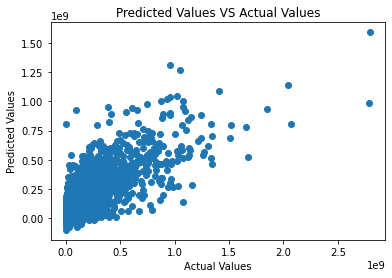

In [203]:
plt.plot(target, cross_preds, 'o')
plt.title('Predicted Values VS Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

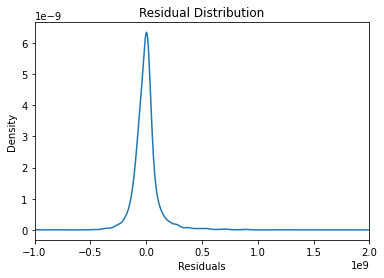

In [204]:
residuals = target - cross_preds
residuals.plot(kind='density')
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.xlim(-1000000000, 2000000000)
plt.show()

Residuals follow a normal distribution curve (although right-skewed), (almost) centered around 0.  
Furthermore, predictions seem to have a linear correlations with the actuals.  
The out-of-sample Coefficient of Determination is around 0.6, that is 60% of the target variation is explained by our model: it seems a linear model works just fine, but there's still room for improvement.  
Let's try adding Polynomial effects and check if we manage to solve the under-fitting problem. and decrease the model error.

### 3.2. Polynomial Transformation <a name='polynomialtransformation'></a>

I want to train the model with different Polynomial Transformation orders, on numerical features, as well as several orders for categorical feature interactions, and compare the different error metrics.

In [205]:
feature_set.columns

Index(['Budget*Runtime', 'Collection', 'Weekend', 'Brad Pitt', 'Bruce Willis',
       'Frank Welker', 'John Goodman', 'Johnny Depp', 'Liam Neeson',
       'Matt Damon', 'Morgan Freeman', 'Samuel L. Jackson', 'Steve Buscemi',
       'Barbara Harris', 'Dan O'Connell', 'Francine Maisler', 'Gary Burritt',
       'Hans Bjerno', 'Hans Zimmer', 'James Newton Howard', 'John T. Cucci',
       'Mo Henry', 'Steven Spielberg', '20th Century Fox', 'Canal+',
       'Columbia Pictures', 'DreamWorks Pictures', 'Paramount',
       'Sony Pictures', 'Universal Pictures', 'Village Roadshow Pictures',
       'Walt Disney Pictures', 'Warner Bros. Pictures', 'Action', 'Adventure',
       'Animation', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror',
       'Science Fiction', 'Western', 'English', 'France', 'Italy', 'Spain',
       'United States of America'],
      dtype='object')

In [206]:
# Create a new feature set with order 2 poly transform and feature interactions
feature_set_2 = feature_set[['Budget*Runtime']]
pf = PolynomialFeatures(degree=2)
feature_set_2 = pd.DataFrame(pf.fit_transform(feature_set_2))
feature_set_2 = pd.concat([feature_set_2, collection_encoded, weekend_encoded, english_encoded, topcast_encoded_2,\
                           topcrew_encoded_2, topproducers_encoded_2, genres_encoded_2, country_encoded_2], axis=1)

# Train the moodel on the whole dataset and calculate the in-sample error
lr = lr.fit(feature_set_2, target)
preds_2 = lr.predict(feature_set_2)
r2_poly_2 = r2_score(target, preds_2)
mse_poly_2 = mean_squared_error(target, preds_2)
print('Polynomial Transformation (Order 2) - In-Sample Coefficient of Determination:', r2_poly_2)
print('Polynomial Transformation (Order 2)- In-Sample Mean Squared Error:', mse_poly_2)
print('')

# Fit the moodel with cross validation and calculate the out-of-sample error
cross_preds_2 = cross_val_predict(lr, feature_set_2, target, cv=kf)
cross_r2_poly_2 = r2_score(target, cross_preds_2)
cross_mse_poly_2 = mean_squared_error(target, cross_preds_2)

print('Polynomial Transformation (Order 2) - Coefficient of Determination (cross-validated):', cross_r2_poly_2)
print('Polynomial Transformation (Order 2)- Mean Squared Error (cross-validated):', cross_mse_poly_2)

Polynomial Transformation (Order 2) - In-Sample Coefficient of Determination: 0.5582106171955473
Polynomial Transformation (Order 2)- In-Sample Mean Squared Error: 1.6406544122981216e+16

Polynomial Transformation (Order 2) - Coefficient of Determination (cross-validated): 0.5511867438176572
Polynomial Transformation (Order 2)- Mean Squared Error (cross-validated): 1.6667386716701026e+16


In [207]:
# Create a new feature set with order 3 poly transform and feature interactions
feature_set_3 = feature_set[['Budget*Runtime']]
pf = PolynomialFeatures(degree=3)
feature_set_3 = pd.DataFrame(pf.fit_transform(feature_set_3))
feature_set_3 = pd.concat([feature_set_3, collection_encoded, weekend_encoded, english_encoded, topcast_encoded_3,\
                           topcrew_encoded_3, topproducers_encoded_3, genres_encoded_3, country_encoded_3], axis=1)

# Train the moodel on the whole dataset and calculate the in-sample error
lr = lr.fit(feature_set_3, target)
preds_3 = lr.predict(feature_set_3)
r2_poly_3 = r2_score(target, preds_3)
mse_poly_3 = mean_squared_error(target, preds_3)
print('Polynomial Transformation (Order 3) - In-Sample Coefficient of Determination:', r2_poly_3)
print('Polynomial Transformation (Order 3)- In-Sample Mean Squared Error:', mse_poly_3)
print('')

# Fit the moodel with cross validation and calculate the out-of-sample error
cross_preds_3 = cross_val_predict(lr, feature_set_3, target, cv=kf)
cross_r2_poly_3 = r2_score(target, cross_preds_3)
cross_mse_poly_3 = mean_squared_error(target, cross_preds_3)

print('Polynomial Transformation (Order 3) - Coefficient of Determination (cross-validated):', cross_r2_poly_3)
print('Polynomial Transformation (Order 3)- Mean Squared Error (cross-validated):', cross_mse_poly_3)

Polynomial Transformation (Order 3) - In-Sample Coefficient of Determination: 0.5300345617263564
Polynomial Transformation (Order 3)- In-Sample Mean Squared Error: 1.7452906292964508e+16

Polynomial Transformation (Order 3) - Coefficient of Determination (cross-validated): 0.4683815678369252
Polynomial Transformation (Order 3)- Mean Squared Error (cross-validated): 1.9742487265100652e+16


In [208]:
# Create a new feature set with order 4 poly transform and feature interactions
feature_set_4 = feature_set[['Budget*Runtime']]
pf = PolynomialFeatures(degree=4)
feature_set_4 = pd.DataFrame(pf.fit_transform(feature_set_4))
feature_set_4 = pd.concat([feature_set_4, collection_encoded, weekend_encoded, english_encoded, topcast_encoded_3,\
                           topcrew_encoded_3, topproducers_encoded_3, genres_encoded_4, country_encoded_4], axis=1)

# Train the moodel on the whole dataset and calculate the in-sample error
lr = lr.fit(feature_set_4, target)
preds_4 = lr.predict(feature_set_4)
r2_poly_4 = r2_score(target, preds_4)
mse_poly_4 = mean_squared_error(target, preds_4)
print('Polynomial Transformation (Order 4) - In-Sample Coefficient of Determination:', r2_poly_4)
print('Polynomial Transformation (Order 4)- In-Sample Mean Squared Error:', mse_poly_4)
print('')

# Fit the moodel with cross validation and calculate the out-of-sample error
cross_preds_4 = cross_val_predict(lr, feature_set_4, target, cv=kf)
cross_r2_poly_4 = r2_score(target, cross_preds_4)
cross_mse_poly_4 = mean_squared_error(target, cross_preds_4)

print('Polynomial Transformation (Order 4) - Coefficient of Determination (cross-validated):', cross_r2_poly_4)
print('Polynomial Transformation (Order 4)- Mean Squared Error (cross-validated):', cross_mse_poly_4)

Polynomial Transformation (Order 4) - In-Sample Coefficient of Determination: 0.43418096227319936
Polynomial Transformation (Order 4)- In-Sample Mean Squared Error: 2.101258058570521e+16

Polynomial Transformation (Order 4) - Coefficient of Determination (cross-validated): -0.06089200369402148
Polynomial Transformation (Order 4)- Mean Squared Error (cross-validated): 3.93978944397314e+16


In [209]:
# Create a new feature set with order 5 poly transform and feature interactions
feature_set_5 = feature_set[['Budget*Runtime']]
pf = PolynomialFeatures(degree=5)
feature_set_5 = pd.DataFrame(pf.fit_transform(feature_set_5))
feature_set_5 = pd.concat([feature_set_5, collection_encoded, weekend_encoded, english_encoded, topcast_encoded_3,\
                           topcrew_encoded_3, topproducers_encoded_3, genres_encoded_5, country_encoded_4], axis=1)

# Train the moodel on the whole dataset and calculate the in-sample error
lr = lr.fit(feature_set_5, target)
preds_5 = lr.predict(feature_set_5)
r2_poly_5 = r2_score(target, preds_5)
mse_poly_5 = mean_squared_error(target, preds_5)
print('Polynomial Transformation (Order 5) - In-Sample Coefficient of Determination:', r2_poly_5)
print('Polynomial Transformation (Order 5)- In-Sample Mean Squared Error:', mse_poly_5)
print('')

# Fit the moodel with cross validation and calculate the out-of-sample error
cross_preds_5 = cross_val_predict(lr, feature_set_5, target, cv=kf)
cross_r2_poly_5 = r2_score(target, cross_preds_5)
cross_mse_poly_5 = mean_squared_error(target, cross_preds_5)

print('Polynomial Transformation (Order 5) - Coefficient of Determination (cross-validated):', cross_r2_poly_5)
print('Polynomial Transformation (Order 5)- Mean Squared Error (cross-validated):', cross_mse_poly_5)

Polynomial Transformation (Order 5) - In-Sample Coefficient of Determination: 0.3324174848724454
Polynomial Transformation (Order 5)- In-Sample Mean Squared Error: 2.47917274983925e+16

Polynomial Transformation (Order 5) - Coefficient of Determination (cross-validated): -0.7516454162776758
Polynomial Transformation (Order 5)- Mean Squared Error (cross-validated): 6.505010968699051e+16


Let's plot error metrics to compare the results.

<ipython-input-210-5d050bdfecdf>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  r_squared.set_xticklabels(regressor, rotation=45)
<ipython-input-210-5d050bdfecdf>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  mserror.set_xticklabels(regressor, rotation=45)


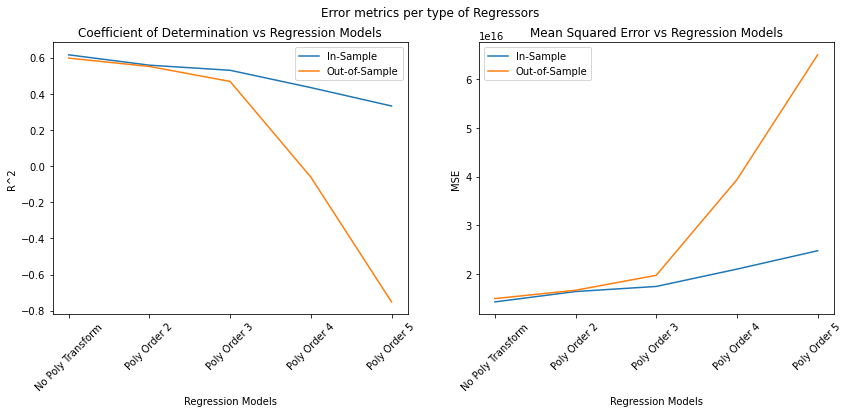

In [210]:
regressor = ['No Poly Transform', 'Poly Order 2', 'Poly Order 3', 'Poly Order 4', 'Poly Order 5']
r_2 = [r2_linear, r2_poly_2, r2_poly_3, r2_poly_4, r2_poly_5]
r2_cross = [cross_r2_linear, cross_r2_poly_2, cross_r2_poly_3, cross_r2_poly_4, cross_r2_poly_5]
mse = [mse_linear, mse_poly_2, mse_poly_3, mse_poly_4, mse_poly_5]
mse_cross = [cross_mse_linear, cross_mse_poly_2, cross_mse_poly_3, cross_mse_poly_4, cross_mse_poly_5]

fig = plt.figure(figsize=(14,5))
r_squared = fig.add_subplot(1,2,1)
mserror = fig.add_subplot(1,2,2)

r_squared.plot(regressor, r_2, label='In-Sample')
r_squared.plot(regressor, r2_cross, label='Out-of-Sample')
r_squared.set_title('Coefficient of Determination vs Regression Models')
r_squared.set_xlabel('Regression Models')
r_squared.set_xticklabels(regressor, rotation=45)
r_squared.set_ylabel('R^2')
r_squared.legend()

mserror.plot(regressor, mse, label='In-Sample')
mserror.plot(regressor, mse_cross, label='Out-of-Sample')
mserror.set_title('Mean Squared Error vs Regression Models')
mserror.set_xlabel('Regression Models')
mserror.set_ylabel('MSE')
mserror.set_xticklabels(regressor, rotation=45)
mserror.legend()

plt.suptitle('Error metrics per type of Regressors')
plt.show()

Applying Polynomial Transformation didn't bring any improvements in the model accuracy.

___

I'll try with different orders for categorical feature interactions, without poly transform the numerical features.

In [211]:
# Create a new feature set with feature interactions of order 2 
feature_set_2 = feature_set[['Budget*Runtime', 'Collection', 'Weekend', 'English']]
feature_set_2 = pd.concat([feature_set_2, topcast_encoded_2, topcrew_encoded_2, topproducers_encoded_2, genres_encoded_2,\
                           country_encoded_2], axis=1)

# Train the moodel on the whole dataset and calculate the in-sample error
lr = lr.fit(feature_set_2, target)
preds_2 = lr.predict(feature_set_2)
r2_poly_2 = r2_score(target, preds_2)
mse_poly_2 = mean_squared_error(target, preds_2)
print('Feature Interactions (Order 2) - In-Sample Coefficient of Determination:', r2_poly_2)
print('Feature Interactions (Order 2) - In-Sample Mean Squared Error:', mse_poly_2)
print('')

# Fit the moodel with cross validation and calculate the out-of-sample error
cross_preds_2 = cross_val_predict(lr, feature_set_2, target, cv=kf)
cross_r2_poly_2 = r2_score(target, cross_preds_2)
cross_mse_poly_2 = mean_squared_error(target, cross_preds_2)

print('Feature Interactions (Order 2) - Cross-Validated Coefficient of Determination :', cross_r2_poly_2)
print('Feature Interactions (Order 2) - Cross-Validated Mean Squared Error:', cross_mse_poly_2)

Feature Interactions (Order 2) - In-Sample Coefficient of Determination: 0.6400343517571213
Feature Interactions (Order 2) - In-Sample Mean Squared Error: 1.3367890946506472e+16

Feature Interactions (Order 2) - Cross-Validated Coefficient of Determination : 0.5731209633096523
Feature Interactions (Order 2) - Cross-Validated Mean Squared Error: 1.585282495060748e+16


In [212]:
# Create a new feature set with feature interactions of order 3 
feature_set_3 = feature_set[['Budget*Runtime', 'Collection', 'Weekend', 'English']]
feature_set_3 = pd.concat([feature_set_3, topcast_encoded_3, topcrew_encoded_3, topproducers_encoded_3, genres_encoded_3,\
                           country_encoded_3], axis=1)

# Train the moodel on the whole dataset and calculate the in-sample error
lr = lr.fit(feature_set_3, target)
preds_3 = lr.predict(feature_set_3)
r2_poly_3 = r2_score(target, preds_3)
mse_poly_3 = mean_squared_error(target, preds_3)
print('Feature Interactions (Order 3) - In-Sample Coefficient of Determination:', r2_poly_3)
print('Feature Interactions (Order 3) - In-Sample Mean Squared Error:', mse_poly_3)
print('')

# Fit the moodel with cross validation and calculate the out-of-sample error
cross_preds_3 = cross_val_predict(lr, feature_set_3, target, cv=kf)
cross_r2_poly_3 = r2_score(target, cross_preds_3)
cross_mse_poly_3 = mean_squared_error(target, cross_preds_3)

print('Feature Interactions (Order 3) - Cross-Validated Coefficient of Determination :', cross_r2_poly_3)
print('Feature Interactions (Order 3) - Cross-Validated Mean Squared Error:', cross_mse_poly_3)

Feature Interactions (Order 3) - In-Sample Coefficient of Determination: 0.652558942044116
Feature Interactions (Order 3) - In-Sample Mean Squared Error: 1.290277057203882e+16

Feature Interactions (Order 3) - Cross-Validated Coefficient of Determination : 0.5554406905640008
Feature Interactions (Order 3) - Cross-Validated Mean Squared Error: 1.6509409708408842e+16


In [213]:
# Create a new feature set with feature interactions of order 4 
feature_set_4 = feature_set[['Budget*Runtime', 'Collection', 'Weekend', 'English']]
feature_set_4 = pd.concat([feature_set_4, topcast_encoded_3, topcrew_encoded_3, topproducers_encoded_3, genres_encoded_4,\
                           country_encoded_4], axis=1)

# Train the moodel on the whole dataset and calculate the in-sample error
lr = lr.fit(feature_set_4, target)
preds_4 = lr.predict(feature_set_4)
r2_poly_4 = r2_score(target, preds_4)
mse_poly_4 = mean_squared_error(target, preds_4)
print('Feature Interactions (Order 4) - In-Sample Coefficient of Determination:', r2_poly_4)
print('Feature Interactions (Order 4) - In-Sample Mean Squared Error:', mse_poly_4)
print('')

# Fit the moodel with cross validation and calculate the out-of-sample error
cross_preds_4 = cross_val_predict(lr, feature_set_4, target, cv=kf)
cross_r2_poly_4 = r2_score(target, cross_preds_4)
cross_mse_poly_4 = mean_squared_error(target, cross_preds_4)

print('Feature Interactions (Order 4) - Cross-Validated Coefficient of Determination :', cross_r2_poly_4)
print('Feature Interactions (Order 4) - Cross-Validated Mean Squared Error:', cross_mse_poly_4)

Feature Interactions (Order 4) - In-Sample Coefficient of Determination: 0.6547122198609108
Feature Interactions (Order 4) - In-Sample Mean Squared Error: 1.2822805210974638e+16

Feature Interactions (Order 4) - Cross-Validated Coefficient of Determination : 0.546266638070005
Feature Interactions (Order 4) - Cross-Validated Mean Squared Error: 1.6850102588065274e+16


In [214]:
# Create a new feature set with feature interactions of order 5 
feature_set_5 = feature_set[['Budget*Runtime', 'Collection', 'Weekend', 'English']]
feature_set_5 = pd.concat([feature_set_5, topcast_encoded_3, topcrew_encoded_3, topproducers_encoded_3, genres_encoded_5,\
                           country_encoded_4], axis=1)

# Train the moodel on the whole dataset and calculate the in-sample error
lr = lr.fit(feature_set_5, target)
preds_5 = lr.predict(feature_set_5)
r2_poly_5 = r2_score(target, preds_5)
mse_poly_5 = mean_squared_error(target, preds_5)
print('Feature Interactions (Order 5) - In-Sample Coefficient of Determination:', r2_poly_5)
print('Feature Interactions (Order 5) - In-Sample Mean Squared Error:', mse_poly_5)
print('')

# Fit the moodel with cross validation and calculate the out-of-sample error
cross_preds_5 = cross_val_predict(lr, feature_set_5, target, cv=kf)
cross_r2_poly_5 = r2_score(target, cross_preds_5)
cross_mse_poly_5 = mean_squared_error(target, cross_preds_5)

print('Feature Interactions (Order 5) - Cross-Validated Coefficient of Determination :', cross_r2_poly_5)
print('Feature Interactions (Order 5) - Cross-Validated Mean Squared Error:', cross_mse_poly_5)

Feature Interactions (Order 5) - In-Sample Coefficient of Determination: 0.6548990209153562
Feature Interactions (Order 5) - In-Sample Mean Squared Error: 1.281586805978616e+16

Feature Interactions (Order 5) - Cross-Validated Coefficient of Determination : 0.5491155451168763
Feature Interactions (Order 5) - Cross-Validated Mean Squared Error: 1.6744303940596518e+16


<ipython-input-215-4b0236110bd9>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  r_squared.set_xticklabels(regressor, rotation=45)
<ipython-input-215-4b0236110bd9>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  mserror.set_xticklabels(regressor, rotation=45)


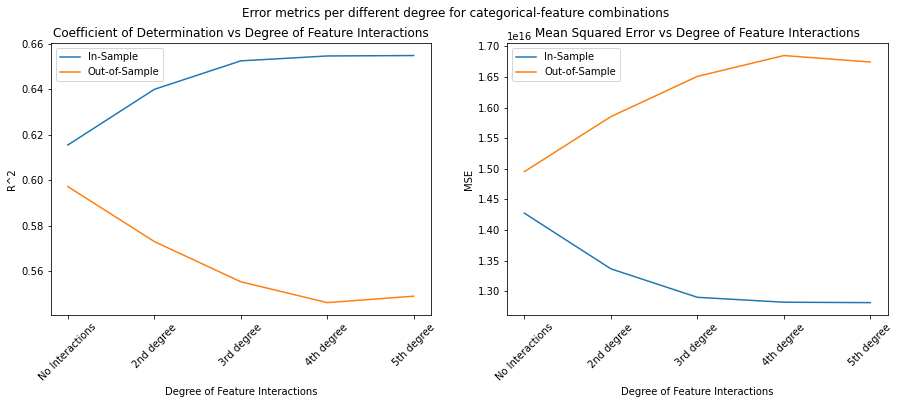

In [215]:
regressor = ['No Interactions', '2nd degree', '3rd degree', '4th degree', '5th degree']
r_2 = [r2_linear, r2_poly_2, r2_poly_3, r2_poly_4, r2_poly_5]
r2_cross = [cross_r2_linear, cross_r2_poly_2, cross_r2_poly_3, cross_r2_poly_4, cross_r2_poly_5]
mse = [mse_linear, mse_poly_2, mse_poly_3, mse_poly_4, mse_poly_5]
mse_cross = [cross_mse_linear, cross_mse_poly_2, cross_mse_poly_3, cross_mse_poly_4, cross_mse_poly_5]

fig = plt.figure(figsize=(15,5))
r_squared = fig.add_subplot(1,2,1)
mserror = fig.add_subplot(1,2,2)

r_squared.plot(regressor, r_2, label='In-Sample')
r_squared.plot(regressor, r2_cross, label='Out-of-Sample')
r_squared.set_title('Coefficient of Determination vs Degree of Feature Interactions')
r_squared.set_xlabel('Degree of Feature Interactions')
r_squared.set_xticklabels(regressor, rotation=45)
r_squared.set_ylabel('R^2')
r_squared.legend()

mserror.plot(regressor, mse, label='In-Sample')
mserror.plot(regressor, mse_cross, label='Out-of-Sample')
mserror.set_title('Mean Squared Error vs Degree of Feature Interactions')
mserror.set_xlabel('Degree of Feature Interactions')
mserror.set_ylabel('MSE')
mserror.set_xticklabels(regressor, rotation=45)
mserror.legend()

plt.suptitle('Error metrics per different degree for categorical-feature combinations')
plt.show()

The insample error actually decreased, whilst the out-of-sample error increased. This means that categorical-feature interactions improved the fitting of the model (in terms of under-fitting), but now the model generalizes worse: predictions on unseen data are actually less accurate. Adding categorical feature interactions decreased the under-fitting problem but increased the chance of over-fitting the data.

___

I try, now, by creating and adding feature interactions between Cast and Crew categories.

In [216]:
# Cast * Crew
cast_crew = pd.concat([topcast_encoded, topcrew_encoded], axis=1)
features = feature_set['Budget*Runtime']
features = pd.concat([features, collection_encoded, weekend_encoded, topproducers_encoded_3, genres_encoded_5, english_encoded,\
                      country_encoded_4], axis=1)

cast_crew_p = poly_transform_dummies(3, cast_crew)
predictors = pd.concat([features, cast_crew_p], axis=1)

# Train the moodel on the whole dataset and calculate the in-sample error
lr = lr.fit(predictors, target)
preds = lr.predict(predictors)
r2 = r2_score(target, preds)
mse = mean_squared_error(target, preds)
print('Cast&Crew Interactions (Order 3) - In-Sample Coefficient of Determination :', r2)
print('Cast&Crew Interactions (Order 3) - In-sample Mean Squared Error:', mse)
print('')

# Fit the moodel with cross validation and calculate the out-of-sample error
cross_preds = cross_val_predict(lr, predictors, target, cv=kf)
r2_cross = r2_score(target, cross_preds)
mse_cross = mean_squared_error(target, cross_preds)
print('Cast&Crew Interactions (Order 3) - Cross-Validated Coefficient of Determination :', r2_cross)
print('Cast&Crew Interactions (Order 3) - Cross-Validated Mean Squared Error:', mse_cross)

Cast&Crew Interactions (Order 3) - In-Sample Coefficient of Determination : 0.6795577666568725
Cast&Crew Interactions (Order 3) - In-sample Mean Squared Error: 1.1900126722913352e+16

Cast&Crew Interactions (Order 3) - Cross-Validated Coefficient of Determination : 0.5397407078225276
Cast&Crew Interactions (Order 3) - Cross-Validated Mean Squared Error: 1.7092453279856632e+16


In [217]:
if r2 > r2_poly_5 and mse < mse_poly_5:
    print('3rd-order interactions between different variables (Cast and Crew) decreased the in-sample error.')
    print('The fit of the model has improved.')
else:
    print('3rd-order interactions between different variables (Cast and Crew) increased the in-sample error.')
    print('The model is still underfitting the data.')

3rd-order interactions between different variables (Cast and Crew) decreased the in-sample error.
The fit of the model has improved.


In [218]:
if r2_cross > cross_r2_poly_5 and mse_cross < cross_mse_poly_5:
    print('3rd-order interactions between different variables (Cast and Crew) decreased the out-of-sample error.')
    print('The model is not overfitting.')
else:
    print('3rd-order interactions between different variables (Cast and Crew) increased the out-of-sample error.')
    print('The model is over-fitting the data.')

3rd-order interactions between different variables (Cast and Crew) increased the out-of-sample error.
The model is over-fitting the data.


In [219]:
print('Number of features after creating feature-interactions:', predictors.shape[1])

Number of features after creating feature-interactions: 410


I'll use Regularized Regressions to help the linear model generalize better and avoid over-fitting.

### 3.3. Linear Regression with Regularization <a name='regularization'></a>

Let's try with some Regression regularization techniques, and check whether we are able to decrease the out-of-sample error of our model.  
Regularization algorithms add a "penalty" in the Cost Function based on the learned model parameters; since the parameters, obviously, depend on the selected features, it's important that all features are on the same scale; furthermore, if we are going to compare the parameters to "interpret" each feature importance for the model, features **must be** on the same value scale.  
I am going, therefore, to scale the features using Standard Scaler (reducing the mean to 0, and scaling to unit variance), and compare the results from different Regularization approaches.

#### 3.3.1. LASSO (Least Absolute Shrinkage and Selection Operator) Regression - L1 penalty

In [220]:
h_param = [0.005, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 10000, 50000, 100000, 250000, 500000, 1000000]
pipe_las = Pipeline([('scaler', StandardScaler()), ('lasso_estimator', LassoCV(alphas = h_param, cv=kf, max_iter=1000000))])
pipe_las.fit(predictors, target)
las_preds = pipe_las.predict(predictors)
lasso_r2 = r2_score(target, las_preds)
lasso_mse = mean_squared_error(target, las_preds)
print('LASSO Regression - Coefficient of Determination (Cross-Validated):', lasso_r2)
print('LASSO Regression - Mean Squared Error (Cross-Validated):', lasso_mse)

LASSO Regression - Coefficient of Determination (Cross-Validated): 0.6656741789026847
LASSO Regression - Mean Squared Error (Cross-Validated): 1.2415715607436606e+16


In [221]:
print('LASSO Regression - Best hyperparameter (cross validation):', pipe_las.named_steps['lasso_estimator'].alpha_)

LASSO Regression - Best hyperparameter (cross validation): 1000000.0


In [222]:
las_model_param = pipe_las.named_steps['lasso_estimator'].coef_
print('LASSO Regression - Model Parameters (cross validation):')
las_model_param[0:50]

LASSO Regression - Model Parameters (cross validation):


array([ 1.25980768e+08,  3.20325843e+07, -7.74451248e+06,  5.33374374e+06,
        6.91452606e+05, -1.49367122e+06, -1.60012630e+06,  3.60614172e+05,
        5.81704252e+04,  2.58213064e+06, -9.24079174e+05,  6.11049709e+06,
       -1.51122448e+05,  2.49154442e+06, -1.26126261e+06,  4.18284459e+06,
       -2.42563223e+06, -1.01116450e+04, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -8.53008406e+05, -0.00000000e+00,
        1.00836727e+06, -3.30893670e+06, -0.00000000e+00, -1.24501410e+06,
        0.00000000e+00, -5.40651645e+05, -2.62250712e+06, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -3.00604274e+06,  0.00000000e+00,
       -0.00000000e+00,  2.05943684e+05, -0.00000000e+00,  1.66690988e+06,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -8.52251699e+06,  0.00000000e+00,  2.21420651e+06,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00])

In [223]:
print('Number of coefficients equal to zero:',sum(las_model_param == 0.0))

Number of coefficients equal to zero: 232


#### 3.3.2. Ridge Regression - L2 penalty

In [224]:
pipe_ridge = Pipeline([('scaler', StandardScaler()), ('ridge_estimator', RidgeCV(alphas = h_param, cv=kf))])
pipe_ridge.fit(predictors, target)
ridge_preds = pipe_ridge.predict(predictors)
ridge_r2 = r2_score(target, ridge_preds)
ridge_mse = mean_squared_error(target, ridge_preds)
print('Ridge Regression - Coefficient of Determination (Cross-Validated):', ridge_r2)
print('Ridge Regression - Mean Squared Error (Cross-Validated):', ridge_mse)

Ridge Regression - Coefficient of Determination (Cross-Validated): 0.6783412801071025
Ridge Regression - Mean Squared Error (Cross-Validated): 1.194530286573308e+16


In [225]:
print('Ridge Regression - Best hyperparameter (cross validation):', pipe_ridge.named_steps['ridge_estimator'].alpha_)

Ridge Regression - Best hyperparameter (cross validation): 100.0


In [226]:
ridge_model_param = pipe_ridge.named_steps['ridge_estimator'].coef_
print('Ridge Regression - Model Parameters (cross validation):')
ridge_model_param[0:50]

Ridge Regression - Model Parameters (cross validation):


array([ 1.21722208e+08,  3.12342058e+07, -8.99947150e+06,  6.22046595e+06,
        2.61954191e+06, -2.20763649e+06, -1.82847387e+06,  1.78207719e+06,
        2.62518708e+05,  4.07435219e+06, -4.41605387e+06,  8.29528174e+06,
       -5.67227710e+05,  3.42536557e+06, -1.84955851e+06,  5.40566977e+06,
       -3.71038187e+06, -1.11305622e+06, -2.53156750e+05, -1.90088989e+05,
       -1.03898738e+06,  4.39538745e+05, -1.92560608e+06, -3.55107779e+04,
        2.68187989e+06, -4.41785780e+06,  2.45117470e+05, -2.19363207e+06,
       -1.04774295e+06, -1.53487682e+06, -2.99600980e+06, -4.29411501e+05,
       -1.74101656e+06, -4.12160034e+05, -3.60276664e+06,  1.02838947e+06,
       -4.48029576e+05,  1.92783605e+06, -3.28511537e+05,  8.86730992e+05,
        4.35371556e+06,  3.03963420e+05, -7.50045912e+05,  1.77418702e+06,
       -1.01611554e+07, -3.03596441e+06,  4.68780947e+06,  3.23684721e+05,
        6.63830025e+05, -3.69117843e+06])

In [227]:
print('Number of coefficients equal to zero:',sum(ridge_model_param == 0.0))

Number of coefficients equal to zero: 0


#### 3.3.3. Elastic Net - L1 + L2 penalties

In [228]:
penalty_ratio = np.linspace(0.1, 0.9, 9)
el_net = ElasticNetCV(alphas = h_param, l1_ratio = penalty_ratio, cv=kf, max_iter=100000)
pipe_net = Pipeline([('scaler', StandardScaler()), ('net_estimator', el_net)])
pipe_net.fit(predictors, target)
net_preds = pipe_net.predict(predictors)
net_r2 = r2_score(target, net_preds)
net_mse = mean_squared_error(target, net_preds)
print('Elastic Net - Coefficient of Determination (Cross-Validated):', net_r2)
print('Elastic Net - Mean Squared Error (Cross-Validated):', net_mse)

Elastic Net - Coefficient of Determination (Cross-Validated): 0.6720789177360258
Elastic Net - Mean Squared Error (Cross-Validated): 1.2177865549568886e+16


In [229]:
print('Elastic Net - Best hyperparameter (cross validation):', pipe_net.named_steps['net_estimator'].alpha_)

Elastic Net - Best hyperparameter (cross validation): 0.1


In [230]:
print('Elastic Net - Best L1/L2 ratio (cross validated):', pipe_net.named_steps['net_estimator'].l1_ratio_)

Elastic Net - Best L1/L2 ratio (cross validated): 0.2


In [231]:
net_model_param = pipe_net.named_steps['net_estimator'].coef_
print('Elastic Net - Model Parameters (cross validation):')
net_model_param[0:50]

Elastic Net - Model Parameters (cross validation):


array([ 1.09612242e+08,  2.96116438e+07, -9.53748147e+06,  6.24575783e+06,
        2.01884844e+06, -1.32059841e+06, -1.50688780e+06,  2.27619713e+06,
        8.14414651e+05,  4.52506672e+06, -2.24147946e+06,  8.93026364e+06,
        6.85037830e+05,  3.17568318e+06, -1.54673847e+06,  5.87799025e+06,
       -3.16352479e+06, -1.04997808e+06, -3.09030616e+05, -2.06198337e+05,
       -9.88232354e+05,  2.94155177e+05, -1.66360284e+06,  1.36960137e+05,
        2.44747904e+06, -3.84713090e+06, -1.71456785e+05, -1.73091009e+06,
       -4.93092025e+05, -1.33328083e+06, -2.93813206e+06, -6.44997776e+05,
       -1.61052747e+06, -5.46777742e+05, -3.13010576e+06,  8.06250699e+05,
       -6.90605451e+05,  1.32622587e+06, -5.88798909e+05,  1.53310445e+06,
        2.37819461e+06,  1.18455896e+05, -7.84664653e+05,  1.62964152e+06,
       -7.48101499e+06,  1.27116711e+06,  5.06671692e+06,  9.93541488e+04,
        9.47730156e+05, -9.46849997e+05])

In [232]:
print('Number of coefficients equal to zero:',sum(net_model_param == 0.0))

Number of coefficients equal to zero: 0


## 4. Results <a name='results'></a>

In [233]:
print('Cross-validated out-of-sample error - Coefficient of determination:')
r2 = dict({'Linear Regression': cross_r2_linear, 'Feature Interactions': r2_cross, 'LASSO Regression':lasso_r2,\
           'Ridge Regression':ridge_r2, 'Elastic Net':net_r2})
dict(sorted(r2.items(), key=operator.itemgetter(1), reverse=True)) # sort the dictionary

Cross-validated out-of-sample error - Coefficient of determination:


{'Ridge Regression': 0.6783412801071025,
 'Elastic Net': 0.6720789177360258,
 'LASSO Regression': 0.6656741789026847,
 'Linear Regression': 0.5972917186347961,
 'Feature Interactions': 0.5397407078225276}

In [234]:
print('Cross-validated out-of-sample error - Mean Squared Error:')
mse = dict({'Linear Regression': cross_mse_linear, 'Feature Interactions': mse_cross, 'LASSO Regression':lasso_mse,\
           'Ridge Regression':ridge_mse, 'Elastic Net':net_mse})
dict(sorted(mse.items(), key=operator.itemgetter(1), reverse=False)) # sort the dictionary

Cross-validated out-of-sample error - Mean Squared Error:


{'Ridge Regression': 1.194530286573308e+16,
 'Elastic Net': 1.2177865549568886e+16,
 'LASSO Regression': 1.2415715607436606e+16,
 'Linear Regression': 1.4955205905961304e+16,
 'Feature Interactions': 1.7092453279856632e+16}

As already observed, adding Feature Interactions, through Polynomial Transformation, decreased the model Bias (lower in-sample error), but increased the model Variance, and consequently, the chance of over-fitting (higher out-of-sample error).  
We managed to decrease the model Variance by using regularization techniques, and to obtain a smaller out-of sample error.  
Ridge Regression is the Regularization technique with the greatest Coefficient of Determination, and smallest Mean Squared Error, although the difference between different regularizers' performance is not big.  
1. Ridge Regression - Best Hyperparameters (cross validated):  
  Alpha = 100
2. Elastic Net - Best Hyperparameters (cross validated):  
  Alpha =  0.1  
  Emphasis of L1 versus L2 penalties: 0.2 (stronger emphasis on L2 over L1)  
3. LASSO Regression - Best Hyperparameters (cross validated):  
  Alpha = 1,000,000

LASSO Regression best hyperparameter is way higher than the other 2: this means that LASSO model has a way higher bias (and a way lower variance) than the other 2 regularized models. LASSO regression model is, in fact, way less complex than the others: **232 features have been zeroed out using LASSO regression.**  
LASSO's error, considering both the coefficient of determination and the mean squared error, is the greatest amongst the 3 Regularized Regressions, although the difference is not big: LASSO managed to greatly reduce the complexity of the model, without increasing the model error significantly.  
Considering that the main focus of the project is on **model interpretation**, and that the 3 regularization error metrics are not very different, I select **LASSO Regression model as the model that best suits the project purpose.**

Let's plot Predicted VS Actual, and Residual Distribution, before and after LASSO regularization.

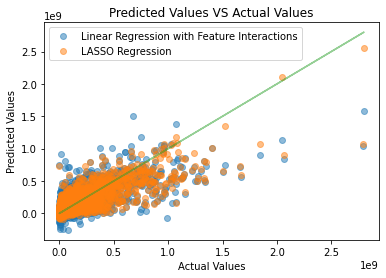

In [235]:
plt.plot(target, cross_preds, 'o', alpha=0.5, label='Linear Regression with Feature Interactions')
plt.plot(target, las_preds, 'o', alpha=0.5, label='LASSO Regression')
plt.plot(target, target, alpha=0.5)
plt.title('Predicted Values VS Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(loc='best')
plt.show()

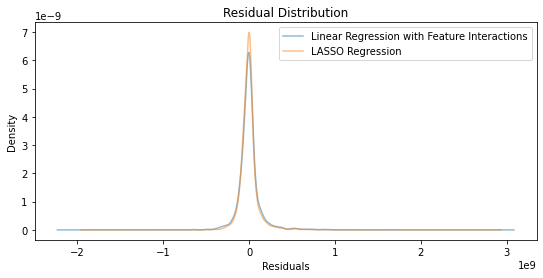

In [236]:
plt.figure(figsize=(9,4))
residuals_1 = target - cross_preds
residuals_2 = target - las_preds
residuals_1.plot(kind='density', label='Linear Regression with Feature Interactions', alpha=0.5)
residuals_2.plot(kind='density', label='LASSO Regression', alpha=0.5)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend(loc='best')
plt.show()

Adding Feature Interactions and reducing complexity with regularization improved the model precision. The main benefit of using LASSO regularization, vs Ridge or Elastic Net, is that we have now a much simpler model, that performs better than before regularization, and it's much easier to interpret.  
Let's analyze the model components and draw some conclusions.

In [237]:
print('LASSO Regression - Model Parameters (cross validation):')
las_model_param[0:50]

LASSO Regression - Model Parameters (cross validation):


array([ 1.25980768e+08,  3.20325843e+07, -7.74451248e+06,  5.33374374e+06,
        6.91452606e+05, -1.49367122e+06, -1.60012630e+06,  3.60614172e+05,
        5.81704252e+04,  2.58213064e+06, -9.24079174e+05,  6.11049709e+06,
       -1.51122448e+05,  2.49154442e+06, -1.26126261e+06,  4.18284459e+06,
       -2.42563223e+06, -1.01116450e+04, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -8.53008406e+05, -0.00000000e+00,
        1.00836727e+06, -3.30893670e+06, -0.00000000e+00, -1.24501410e+06,
        0.00000000e+00, -5.40651645e+05, -2.62250712e+06, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -3.00604274e+06,  0.00000000e+00,
       -0.00000000e+00,  2.05943684e+05, -0.00000000e+00,  1.66690988e+06,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -8.52251699e+06,  0.00000000e+00,  2.21420651e+06,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00])

In [238]:
print('Number of coefficients equal to zero:',sum(las_model_param == 0.0))

Number of coefficients equal to zero: 232


In [239]:
# check the coefficients equal to 0
zerod_coef = np.where(las_model_param == 0)
print('List of no significant features:')
predictors.columns[zerod_coef]

List of no significant features:


Index(['20th Century Fox Warner Bros. Pictures', 'Canal+ Columbia Pictures',
       'Canal+ Walt Disney Pictures', 'Canal+ Warner Bros. Pictures',
       'Columbia Pictures Paramount',
       'Columbia Pictures Village Roadshow Pictures',
       'DreamWorks Pictures Paramount', 'Paramount Sony Pictures',
       'Paramount Universal Pictures', 'Paramount Village Roadshow Pictures',
       ...
       'Morgan Freeman John T. Cucci Mo Henry',
       'Barbara Harris Dan O'Connell Hans Bjerno',
       'Barbara Harris Gary Burritt Hans Bjerno',
       'Barbara Harris Gary Burritt John T. Cucci',
       'Barbara Harris Mo Henry Steven Spielberg',
       'Dan O'Connell Gary Burritt Hans Zimmer',
       'Dan O'Connell Hans Bjerno James Newton Howard',
       'Dan O'Connell James Newton Howard John T. Cucci',
       'Francine Maisler James Newton Howard Mo Henry',
       'Hans Zimmer John T. Cucci Mo Henry'],
      dtype='object', length=232)

Let's check now the positively correlated features.

In [240]:
# check the positively correlataed features
pos_corr_feat = []

for coef in np.sort(las_model_param)[::-1]:
    if coef > 0:
        index = np.where(las_model_param == coef)
        pos_corr_feat.append(predictors.columns[index])

print('Features with a positive relation with the Revenue, sorted by relevance:')        
pos_corr_feat

Features with a positive relation with the Revenue, sorted by relevance:


[Index(['Budget*Runtime'], dtype='object'),
 Index(['Collection'], dtype='object'),
 Index(['Samuel L. Jackson Dan O'Connell'], dtype='object'),
 Index(['Animation Family'], dtype='object'),
 Index(['Steven Spielberg'], dtype='object'),
 Index(['Adventure Fantasy'], dtype='object'),
 Index(['Samuel L. Jackson Hans Bjerno'], dtype='object'),
 Index(['Frank Welker Barbara Harris Hans Zimmer'], dtype='object'),
 Index(['Action Adventure Science Fiction'], dtype='object'),
 Index(['Bruce Willis James Newton Howard Mo Henry'], dtype='object'),
 Index(['Samuel L. Jackson Steven Spielberg'], dtype='object'),
 Index(['Walt Disney Pictures'], dtype='object'),
 Index(['Hans Zimmer Mo Henry'], dtype='object'),
 Index(['Gary Burritt'], dtype='object'),
 Index(['20th Century Fox'], dtype='object'),
 Index(['Samuel L. Jackson'], dtype='object'),
 Index(['Liam Neeson Samuel L. Jackson'], dtype='object'),
 Index(['Barbara Harris Hans Bjerno Hans Zimmer'], dtype='object'),
 Index(['Brad Pitt Matt Damon

In [241]:
print('Number of positively related features:', len(pos_corr_feat))

Number of positively related features: 78


In [242]:
print('10 most positively correlated Features:')
pos_corr_feat[0:10]

10 most positively correlated Features:


[Index(['Budget*Runtime'], dtype='object'),
 Index(['Collection'], dtype='object'),
 Index(['Samuel L. Jackson Dan O'Connell'], dtype='object'),
 Index(['Animation Family'], dtype='object'),
 Index(['Steven Spielberg'], dtype='object'),
 Index(['Adventure Fantasy'], dtype='object'),
 Index(['Samuel L. Jackson Hans Bjerno'], dtype='object'),
 Index(['Frank Welker Barbara Harris Hans Zimmer'], dtype='object'),
 Index(['Action Adventure Science Fiction'], dtype='object'),
 Index(['Bruce Willis James Newton Howard Mo Henry'], dtype='object')]

Let's check now for the negatively correlated features.

In [243]:
# check the negatively correlataed features
neg_corr_feat = []

for coef in np.sort(las_model_param):
    if coef < 0:
        index = np.where(las_model_param == coef)
        neg_corr_feat.append(predictors.columns[index])
    
print('Features with a negative relation with the Revenue, sorted by relevance:')        
neg_corr_feat

Features with a negative relation with the Revenue, sorted by relevance:


[Index(['Samuel L. Jackson John T. Cucci'], dtype='object'),
 Index(['Adventure Family Fantasy'], dtype='object'),
 Index(['Action'], dtype='object'),
 Index(['Weekend'], dtype='object'),
 Index(['Johnny Depp Hans Zimmer'], dtype='object'),
 Index(['Samuel L. Jackson Hans Bjerno James Newton Howard'], dtype='object'),
 Index(['Science Fiction'], dtype='object'),
 Index(['Gary Burritt John T. Cucci'], dtype='object'),
 Index(['Barbara Harris Hans Bjerno'], dtype='object'),
 Index(['Francine Maisler Hans Zimmer'], dtype='object'),
 Index(['Adventure Drama'], dtype='object'),
 Index(['France'], dtype='object'),
 Index(['Action Adventure Western'], dtype='object'),
 Index(['Samuel L. Jackson Mo Henry'], dtype='object'),
 Index(['Columbia Pictures Universal Pictures'], dtype='object'),
 Index(['Dan O'Connell Steven Spielberg'], dtype='object'),
 Index(['Hans Bjerno'], dtype='object'),
 Index(['Action Adventure Drama Fantasy'], dtype='object'),
 Index(['Liam Neeson'], dtype='object'),
 Index

In [244]:
print('Number of negatively related features:', len(neg_corr_feat))

Number of negatively related features: 100


In [245]:
print('10 most negatively correlated Features:')
neg_corr_feat[0:10]

10 most negatively correlated Features:


[Index(['Samuel L. Jackson John T. Cucci'], dtype='object'),
 Index(['Adventure Family Fantasy'], dtype='object'),
 Index(['Action'], dtype='object'),
 Index(['Weekend'], dtype='object'),
 Index(['Johnny Depp Hans Zimmer'], dtype='object'),
 Index(['Samuel L. Jackson Hans Bjerno James Newton Howard'], dtype='object'),
 Index(['Science Fiction'], dtype='object'),
 Index(['Gary Burritt John T. Cucci'], dtype='object'),
 Index(['Barbara Harris Hans Bjerno'], dtype='object'),
 Index(['Francine Maisler Hans Zimmer'], dtype='object')]

Let's check now for the 10 most correlated features, either positive or negative.

In [246]:
# look for the 10 most correlated features, either positive or negative
corr_feat = []

for coef in np.sort(abs(las_model_param))[::-1][0:10]:
        index = np.where(abs(las_model_param) == coef)
        corr_feat.append(predictors.columns[index])
    
print('Features with the strongest correlation, eiter postive or negative, with the Revenue, sorted by relevance:')        
corr_feat

Features with the strongest correlation, eiter postive or negative, with the Revenue, sorted by relevance:


[Index(['Budget*Runtime'], dtype='object'),
 Index(['Collection'], dtype='object'),
 Index(['Samuel L. Jackson Dan O'Connell'], dtype='object'),
 Index(['Animation Family'], dtype='object'),
 Index(['Steven Spielberg'], dtype='object'),
 Index(['Samuel L. Jackson John T. Cucci'], dtype='object'),
 Index(['Adventure Fantasy'], dtype='object'),
 Index(['Samuel L. Jackson Hans Bjerno'], dtype='object'),
 Index(['Adventure Family Fantasy'], dtype='object'),
 Index(['Frank Welker Barbara Harris Hans Zimmer'], dtype='object')]

In [247]:
# Create a dataframe
corr_feat = pd.DataFrame(corr_feat)
corr_feat.rename(columns={0:'Feature'}, inplace=True)

# create an empty list and append the 10 highest coefficients absolute values, with their sign (+ or -)
coefs = []
for c in np.sort(abs(las_model_param))[::-1][0:10]:
    index = np.where(abs(las_model_param) == c)
    c = las_model_param[index]
    coefs.append(c)

# let's create a coefficients column in the dataframe
corr_feat['Coeff'] = coefs

# create a column "Type of correlation" with the correct values
correlation = []
for c in corr_feat['Coeff']:
    if c > 0:
        correlation.append("Positive")
    else:
        correlation.append("Negative")
corr_feat['Type of Correlation'] = correlation

corr_feat = corr_feat.drop(['Coeff'], axis=1)

print('Top 10 most relevant features:')
corr_feat

Top 10 most relevant features:


Feature Type of Correlation
0                           Budget*Runtime            Positive
1                               Collection            Positive
2          Samuel L. Jackson Dan O'Connell            Positive
3                         Animation Family            Positive
4                         Steven Spielberg            Positive
5          Samuel L. Jackson John T. Cucci            Negative
6                        Adventure Fantasy            Positive
7            Samuel L. Jackson Hans Bjerno            Positive
8                 Adventure Family Fantasy            Negative
9  Frank Welker Barbara Harris Hans Zimmer            Positive

## 5. Discussion <a name='discussion'></a>

Let's check which ones, amongst the original features (before interactions), is not significant to movies' revenue.

In [248]:
feature_set.columns

Index(['Budget*Runtime', 'Collection', 'Weekend', 'Brad Pitt', 'Bruce Willis',
       'Frank Welker', 'John Goodman', 'Johnny Depp', 'Liam Neeson',
       'Matt Damon', 'Morgan Freeman', 'Samuel L. Jackson', 'Steve Buscemi',
       'Barbara Harris', 'Dan O'Connell', 'Francine Maisler', 'Gary Burritt',
       'Hans Bjerno', 'Hans Zimmer', 'James Newton Howard', 'John T. Cucci',
       'Mo Henry', 'Steven Spielberg', '20th Century Fox', 'Canal+',
       'Columbia Pictures', 'DreamWorks Pictures', 'Paramount',
       'Sony Pictures', 'Universal Pictures', 'Village Roadshow Pictures',
       'Walt Disney Pictures', 'Warner Bros. Pictures', 'Action', 'Adventure',
       'Animation', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror',
       'Science Fiction', 'Western', 'English', 'France', 'Italy', 'Spain',
       'United States of America'],
      dtype='object')

In [256]:
# Create a list with the original features
attributes = feature_set.columns.tolist()
# create an empty list for the realated coefficient
coeff_orig_features = []

# loop for each original feature in the list, get the coefficient, and append it in the empty list
for attribute in attributes:
    index = predictors.columns.get_loc(attribute)
    coeff = las_model_param[index]
    coeff_orig_features.append(coeff)

# Create an empty list for the indexes of the zeroed out coefficient
index_zeroed_coeff = []

# Loop for each coefficient (original features) and append the index if the coefficient = 0
for i in range(len(coeff_orig_features)):
    if coeff_orig_features[i] == 0:
        index_zeroed_coeff.append(i)
        
# Get the correct names for the columns
feature_set.columns[index_zeroed_coeff]

Index(['Brad Pitt', 'Johnny Depp', 'Steve Buscemi', 'Barbara Harris',
       'Francine Maisler', 'James Newton Howard', 'John T. Cucci', 'Adventure',
       'Documentary', 'Drama', 'Family', 'Fantasy',
       'United States of America'],
      dtype='object')

After adding several Feature Interactions (using Polynomial Transformation) and using LASSO regularization, I managed to increase the model performance, measured on out-of-sample sets with cross validation techniques (to avoid dependency on a particular train/test split), from 0.597 to 0.665 (R^2). **The model is now able to explain 66.5% of the target variable variation.**
Furthermore, I am able now to assess the relative importance of the model features, that is I can draw some considerations on what features are more impactful on movies’ revenue, and in what way.
* “Budget*Runtime” is the feature with the greatest (positive) impact on the revenue: a long high-budget movie has lots of chances to become a box-office success.
* “Collection” is the second most important features, which affects the revenue in a positive way: movies that belong to a franchise (Marvel super-heroes, Star Wars, Harry Potter, Lord of the Rings…) have more chances to be high-gross rating films.
* Regarding cast and crew, Samuel L. Jackson seems to have a knack for making successful movies, although in combination with some crew members: the combinations Samuel L. Jackson – Dan O’Connel (a foley artist) and Samuel L. Jackson – Hans Bjerno (a director of photography) seem to work very well for making a movie a commercial success.
* Steven Spielberg, a big name in Hollywood, is definitely a main driver for high-grossing movie.
* The combination Frank Welker (actor), Barbara Harris (casting director), and Hans Zimmer (a film score composer) seems to be quite successful as well.
* Samuel L. Jackson and John T. Cucci (a foley artist), together, are actually negatively correlated with the movie’s revenue. This seems a little bit weird to me, but there may be an underlying reason for this.
* When it comes to genres, movie-goers seem to love Animation/Family and Adventure/Fantasy movies, whilst they seem not to appreciate much Family/Adventure/Fantasy films.
* 232 features have been zeroed out by LASSO. Amongst those ones, I found Brad Pitt, Johnny Depp, and Steve Buscemi as the actors who seem not to affect the commercial outcome of a movie, either in a positive or negative way.
* Crew members who don’t have an impact on movie’s revenue, either positive or negative, are: Barbara Harris (casting director), Francine Maisler (casting director), James Newton Howard (film score composer), and John T. Cucci (foley artist).
* Genres which don’t affect the revenue outcome, either in a positive or negative way, are: Adventure, Documentary, Drama, Family, Fantasy. As we already observed, combination of different genres may have a more impactful role on the movies’ revenue. Quite interestingly, Documentaries, which I would have expected being negatively correlated with the target, don’t actually affect the revenue in a negative way.
* Not surprisingly, movies made in France, Italy, and Spain have fewer chances of being high-grossing movies, than movies made in the US.
* No Production Companies are in the 10 most impactful features, although they can still be relevant.
* Amongst positively correlated features, I found: Action/Adventure/Science Fiction, and the combination of following actor/crew members: Bruce Willis (actor), James Newton Howard (film score composer), and Mo Henry (film editor).
* Amongst negatively correlated features, I found: Action, and Science Fiction movies, Weekend (movies released not from Friday to Sunday have more chances to be commercially successful), and the combination of Johnny Depp (actor) and Hans Zimmer (film score composer).


## 6. Conclusion <a name='conclusion'></a>

In this project I built a Linear Regression model to predict movie’s revenue. The main focus was on **interpretation**, therefore my main purpose was to **build a predictive model able to give insights on what the main drivers that generate movie’s revenue are.** I've adopted a machine-learning-driven approach, to uncover relationships between the variables, and find insights on the revenue-generating features.

Quality of data was not great: I found lots of duplicates, missing values, outliers (identified as mistakes), that required some data cleaning actions: **from a dataset of 17,101 observations, I kept 4,871 data points only.**  

I defined a new function *poly_transform_dummies(degree, encoded_dataset)*, as already described, to create feature interactions between categorical features, using Polynomial Features, and deleting the unnecessary, not relevant features.  Feature Interactions increased the complexity of the model, decreased the Bias, and helped the model better fit the data.
I, then, used Regularization Regressions to decrease the model Variance, and help the model to generalize better, and reduce over-fitting. LASSO Regression was the selected regularization algorithm because of LASSO capability of greatly reducing the model complexity by zeroing out several coefficients, and allow a better understanding of the model’s driver and the revenue-generating features.  

**The model was able to explain 66.5% of the Revenue variation (R^2 = 0.665)**. Therefore, the model accuracy can be still improved. For this purpose, **additional data is needed to train the model on a larger dataset, and capture the still-not-seen underlying relationships between variables.**  

Furthermore, model’s performance can improve by increasing the number of features; for attributes like Cast, Crew, and Production Companies I had to select only a limited number of categories, due to the limitation of my laptop’s hardware. I selected only the most frequent categories (and then further reduced the categories’ number by selecting the most relevant ones, through a boxplot analysis). This approach managed to bring interesting results and insights, but other relevant features (actors/actresses, production companies, directors…) had been probably left out in the process. It would be very interesting see the model’s results with a larger feature selection.  

A point to note on the Model’s results: LASSO Regression selected, as relevant features, some feature interactions between actors and technical crew members (foley artists, casting directors, score-producers…) who are, most likely, unknown to the public. It sounds odd that this kind of interactions were considered relevant by the LASSO algorithm, but there may be an underlying reason for this: some actors and crew members, for instance, may have a special alchemy, when working together, who is reflected into the movie quality, and gets rewarded at the box-office (or the opposite). However, **for more accurate results, specifications on crew members role would have been helpful, in order to select only the most prominent ones, like directors or producers, and compare the results from the 2 different models.**  

Last point to note: the feature classification performed by LASSO model is related to the movie’s Revenue, and it doesn’t have any kind of relevancy in regard to the movie’s artistic value, or the quality of work of the movie professionals mentioned in this analysis.